In [12]:
import numpy as np
import matplotlib.pyplot as plt

from pyquil.paulis import PauliSum
from pyquil.api import WavefunctionSimulator
from pyquil.unitary_tools import lifted_pauli

from entropica_qaoa.qaoa.parameters import StandardParams
from entropica_qaoa.qaoa.cost_function import QAOACostFunctionOnWFSim

from scipy.optimize import minimize
import pickle

Qallse will create a pickle file with the QUBO. The first step is to unpickle the file into a single dictionary saved to a text file. The keys of this dictionary will be a a collection of two triplets which resemble the form: *('44892_83794_90698', '44892_83794_90698')* and their associated values are the coupling strengths.  We treat the triplets within the QUBO as equally likely by setting the bias weights to a constant (zero, specifically).

In [13]:
''' Load information from pickled file into a dictionary '''
pickle_off = open("qubo.pickle", "rb")
emp = pickle.load(pickle_off)

''' Save unpickled dictionary to a txt file '''
file = open("qubo.txt", "w") 
file.write(str(emp)) 
file.close() 

Create a dictionary "qubo" based on the information stored in the pickle file. (This part needs to be made more efficient.)

In [14]:
qubo = {('44892_83794_90698', '44892_83794_90698'): 0.2568901505777216, ('75849_89808_95867', '75849_89808_95867'): 0.04388179631557615, ('21778_29789_43136', '21778_29789_43136'): 0.00439986793405045, ('41531_79949_86164', '41531_79949_86164'): 0.013016777034941196, ('43919_75849_89808', '43919_75849_89808'): 0.1357680784080999, ('75849_83048_89808', '75849_83048_89808'): 0.010815700408408346, ('30702_45105_76927', '30702_45105_76927'): 0.04596476227196955, ('45032_76876_83918', '45032_76876_83918'): 0.16145292508458564, ('43635_81943_88527', '43635_81943_88527'): 0.13267718923334476, ('45105_76927_91035', '45105_76927_91035'): 0.08237977867871421, ('30709_38074_44670', '30709_38074_44670'): 0.06156230284353248, ('41531_73150_86164', '41531_73150_86164'): 0.004683539954956573, ('75995_89902_96199', '75995_89902_96199'): 0.18595177839312654, ('30702_38567_76927', '30702_38567_76927'): 0.056060425314450935, ('22937_31253_37871', '22937_31253_37871'): 0.01028941337821937, ('45105_76927_84222', '45105_76927_84222'): 0.03694241958469524, ('30702_38567_45105', '30702_38567_45105'): 0.06336073418235855, ('75995_83150_89902', '75995_83150_89902'): 0.23253991882850916, ('30709_38074_76572', '30709_38074_76572'): 0.04372184140715546, ('43919_75849_83048', '43919_75849_83048'): 0.1666346273243351, ('41740_73813_80482', '41740_73813_80482'): 0.24104915462604137, ('76333_83794_90698', '76333_83794_90698'): 0.37126967473967865, ('41740_73813_86586', '41740_73813_86586'): 0.18472580616653655, ('44498_83506_90201', '44498_83506_90201'): 0.12229789192105722, ('30709_44670_76572', '30709_44670_76572'): 0.01635919544022918, ('21778_29789_36744', '21778_29789_36744'): 0.010467586709400456, ('22937_37871_44524', '22937_37871_44524'): 0.014788898801636419, ('43919_83048_89808', '43919_83048_89808'): 0.09126064352936186, ('45196_77003_84036', '45196_77003_84036'): 0.1105334562799477, ('41740_80482_86586', '41740_80482_86586'): 0.08621923357237293, ('45105_84222_91035', '45105_84222_91035'): 0.21103625273343968, ('22995_30467_37914', '22995_30467_37914'): 0.046481429837191945, ('76430_83131_90221', '76430_83131_90221'): 0.27502113194918787, ('21778_36744_43136', '21778_36744_43136'): 0.006816173687872906, ('41752_73388_80125', '41752_73388_80125'): 0.002814575922107765, ('45196_77003_91101', '45196_77003_91101'): 0.08742738629466529, ('30887_45196_77003', '30887_45196_77003'): 0.050506689062237986, ('76430_83131_96201', '76430_83131_96201'): 0.19166848465571018, ('22995_37914_44556', '22995_37914_44556'): 0.03256403356388132, ('76333_90698_96850', '76333_90698_96850'): 0.4238325954362206, ('41752_80125_86317', '41752_80125_86317'): 0.12870119475242803, ('22995_30467_44556', '22995_30467_44556'): 0.04160395569256753, ('45196_84036_91101', '45196_84036_91101'): 0.05182637811930074, ('41752_73388_86317', '41752_73388_86317'): 0.057626757503271064, ('76430_90221_96201', '76430_90221_96201'): 0.009729416808034852, ('30887_38659_77003', '30887_38659_77003'): 0.05112683372659915, ('41814_73903_87327', '41814_73903_87327'): 0.17842552073958007, ('30887_38659_45196', '30887_38659_45196'): 0.05155270087552016, ('41969_74064_87434', '41969_74064_87434'): 0.05287297874716773, ('76572_83620_90825', '76572_83620_90825'): 0.1728068065832014, ('44370_75785_90100', '44370_75785_90100'): 0.11437236649721344, ('41969_80657_87434', '41969_80657_87434'): 0.11455962556448851, ('44370_83003_90100', '44370_83003_90100'): 0.08803949986914139, ('42084_80752_87160', '42084_80752_87160'): 0.11874204028810076, ('76572_90825_96952', '76572_90825_96952'): 0.35831156677260156, ('44370_75785_83003', '44370_75785_83003'): 0.13418369231184019, ('23122_30489_43559', '23122_30489_43559'): 0.011263388708348643, ('41969_74064_80657', '41969_74064_80657'): 0.004730809424080884, ('44524_76430_83131', '44524_76430_83131'): 0.28765213270077983, ('76702_83750_90657', '76702_83750_90657'): 0.22281315204708968, ('23206_31916_45688', '23206_31916_45688'): 0.04462763340858372, ('31099_38316_44892', '31099_38316_44892'): 0.05150011677551081, ('42084_73648_87160', '42084_73648_87160'): 0.07168104550995241, ('76927_84222_91035', '76927_84222_91035'): 0.3552772042472321, ('30992_38250_44827', '30992_38250_44827'): 0.06614830237741809, ('45444_77207_84228', '45444_77207_84228'): 0.2557548180529966, ('76702_90657_97024', '76702_90657_97024'): 0.4247900088250299, ('30992_44827_76702', '30992_44827_76702'): 0.06884048662356052, ('23122_30489_37254', '23122_30489_37254'): 0.019833644569959175, ('42084_73648_80752', '42084_73648_80752'): 0.19095088984232128, ('77207_84228_91034', '77207_84228_91034'): 0.2621584285195078, ('31099_38316_76333', '31099_38316_76333'): 0.034833457802855794, ('23122_37254_43559', '23122_37254_43559'): 0.004802708983410453, ('30992_38250_76702', '30992_38250_76702'): 0.06726738029100038, ('77003_84036_91101', '77003_84036_91101'): 0.018595178294659065, ('45444_84228_91034', '45444_84228_91034'): 0.2588677544885787, ('23206_31916_38904', '23206_31916_38904'): 0.05525563958100854, ('44524_76430_90221', '44524_76430_90221'): 0.20602074876998, ('31209_37828_44498', '31209_37828_44498'): 0.01296595574042253, ('44524_83131_90221', '44524_83131_90221'): 0.030479539235433784, ('42375_74426_80518', '42375_74426_80518'): 0.058692019685241126, ('31099_44892_76333', '31099_44892_76333'): 0.009261934309792608, ('42375_74426_87311', '42375_74426_87311'): 0.08195102217189171, ('44556_83150_89902', '44556_83150_89902'): 0.05166914500629455, ('23206_38904_45688', '23206_38904_45688'): 0.024120408129920723, ('79503_85828_91456', '79503_85828_91456'): 0.38607240811815546, ('31253_37871_44524', '31253_37871_44524'): 0.02471785133731902, ('44556_75995_89902', '44556_75995_89902'): 0.07716420247769085, ('44556_75995_83150', '44556_75995_83150'): 0.1585370094251195, ('42375_80518_87311', '42375_80518_87311'): 0.11074052124135936, ('31253_37871_76430', '31253_37871_76430'): 0.019770396228354636, ('23265_31371_45032', '23265_31371_45032'): 0.025899582956336376, ('21109_29371_36474', '21109_29371_36474'): 0.048929063212919566, ('45688_77164_84677', '45688_77164_84677'): 0.11714807047681014, ('79659_85947_91558', '79659_85947_91558'): 0.49982520943313546, ('42456_73956_81031', '42456_73956_81031'): 0.1815860304272755, ('44827_83750_90657', '44827_83750_90657'): 0.09392163435368128, ('79949_86164_91922', '79949_86164_91922'): 0.3453478226497137, ('21109_36474_42900', '21109_36474_42900'): 0.008795313130798288, ('42518_74598_81580', '42518_74598_81580'): 0.1450204211544942, ('44670_76572_83620', '44670_76572_83620'): 0.11105085905678669, ('31425_38961_45444', '31425_38961_45444'): 0.10965942590129835, ('44892_76333_90698', '44892_76333_90698'): 0.16204082885795223, ('79887_86401_92132', '79887_86401_92132'): 0.22052564674741293, ('31425_45444_77207', '31425_45444_77207'): 0.007712155316989822, ('44670_76572_90825', '44670_76572_90825'): 0.051792812830860624, ('42518_81580_88225', '42518_81580_88225'): 0.3659400836657718, ('31371_45032_76876', '31371_45032_76876'): 0.0874967916607367, ('42614_74107_81174', '42614_74107_81174'): 0.20416956314546142, ('44670_83620_90825', '44670_83620_90825'): 0.03732841504114731, ('72332_78989_85391', '72332_78989_85391'): 0.33041866570942235, ('44827_76702_83750', '44827_76702_83750'): 0.06870990191381177, ('42671_74134_87483', '42671_74134_87483'): 0.15562883609122818, ('80657_87434_93297', '80657_87434_93297'): 0.021774659356296022, ('31425_38961_77207', '31425_38961_77207'): 0.07009105908938473, ('42900_81888_88036', '42900_81888_88036'): 0.00953709723769064, ('80482_86586_92537', '80482_86586_92537'): 0.3433928599715904, ('72440_79068_85239', '72440_79068_85239'): 0.3553972824687773, ('80125_86317_92047', '80125_86317_92047'): 0.2566570928838297, ('72375_79024_85197', '72375_79024_85197'): 0.15613239306950583, ('42614_74107_87860', '42614_74107_87860'): 0.11495764215785581, ('80657_93297_109150', '80657_93297_109150'): 0.003753173005132726, ('42671_74134_81209', '42671_74134_81209'): 0.18407922702474905, ('44892_76333_83794', '44892_76333_83794'): 0.06667986622493871, ('21122_36544_42941', '21122_36544_42941'): 0.03626876341763857, ('72430_79312_85462', '72430_79312_85462'): 0.333274880156755, ('42614_81174_87860', '42614_81174_87860'): 0.055401079598653424, ('44827_76702_90657', '44827_76702_90657'): 0.002643080003853826, ('35482_73648_80752', '35482_73648_80752'): 0.16069558100830217, ('35482_42084_73648', '35482_42084_73648'): 0.12469556188907593, ('19793_34293_40674', '19793_34293_40674'): 0.029808916148574005, ('35373_73150_79949', '35373_73150_79949'): 0.06380872994617193, ('35482_42084_80752', '35482_42084_80752'): 0.13705963505067165, ('18479_27200_33895', '18479_27200_33895'): 0.4951145437443759, ('35699_41740_80482', '35699_41740_80482'): 0.027201305337818116, ('18534_27239_34331', '18534_27239_34331'): 0.016867856533862136, ('35699_41740_73813', '35699_41740_73813'): 0.03638262527548475, ('19793_27204_34293', '19793_27204_34293'): 0.03172194475171719, ('18534_27239_40323', '18534_27239_40323'): 0.009029728971095663, ('19793_27204_40674', '19793_27204_40674'): 0.031042405224363967, ('35699_73813_80482', '35699_73813_80482'): 0.13012823397762918, ('35722_41752_80125', '35722_41752_80125'): 0.012139724610791602, ('35722_41752_73388', '35722_41752_73388'): 0.01419780016503569, ('35798_41814_73903', '35798_41814_73903'): 0.009671149383660038, ('35722_73388_80125', '35722_73388_80125'): 0.008350423012611186, ('19927_28795_36059', '19927_28795_36059'): 0.046519243940367605, ('19927_28795_41969', '19927_28795_41969'): 0.05095989372807713, ('19927_36059_41969', '19927_36059_41969'): 0.05964153693901614, ('35884_42456_73956', '35884_42456_73956'): 0.1873180339725558, ('18730_27379_34010', '18730_27379_34010'): 0.04416816184897032, ('18730_34010_40093', '18730_34010_40093'): 0.04666775178493143, ('35971_42518_74598', '35971_42518_74598'): 0.12266931077373305, ('19998_27974_34824', '19998_27974_34824'): 0.021460712703022855, ('36116_42614_81174', '36116_42614_81174'): 0.062198018981272196, ('36059_41969_74064', '36059_41969_74064'): 0.030873267328842824, ('36059_41969_80657', '36059_41969_80657'): 0.024104818863931565, ('35971_74598_81580', '35971_74598_81580'): 0.021012625811062224, ('38074_44670_76572', '38074_44670_76572'): 0.032938943784418806, ('96199_112206_117734', '96199_112206_117734'): 0.6459766411172593, ('21145_28346_35699', '21145_28346_35699'): 0.022239204787660838, ('29522_36592_42971', '29522_36592_42971'): 0.13707385854747883, ('29467_36544_75015', '29467_36544_75015'): 0.17764314385131275, ('29467_42941_75015', '29467_42941_75015'): 0.13944522188699143, ('29467_36544_42941', '29467_36544_42941'): 0.20249096103776154, ('96201_112399_117964', '96201_112399_117964'): 0.6527643256856996, ('29524_37372_75049', '29524_37372_75049'): 0.012204291648144572, ('29371_36474_74970', '29371_36474_74970'): 0.07310743038930445, ('21145_28346_41740', '21145_28346_41740'): 0.01659716549313006, ('21145_35699_41740', '21145_35699_41740'): 0.006132216708776839, ('29522_42971_75030', '29522_42971_75030'): 0.06514160698926713, ('29371_36474_42900', '29371_36474_42900'): 0.072912363540649, ('21156_28346_35699', '21156_28346_35699'): 0.14876792196263766, ('22043_30887_45196', '22043_30887_45196'): 0.015269276933941589, ('38074_76572_83620', '38074_76572_83620'): 0.07481033624055516, ('29524_37372_43635', '29524_37372_43635'): 0.013161540840428143, ('22043_30887_38659', '22043_30887_38659'): 0.010579263566758146, ('31879_39281_77711', '31879_39281_77711'): 0.00011259624933840362, ('38074_44670_83620', '38074_44670_83620'): 0.048062022319650066, ('21156_35699_41740', '21156_35699_41740'): 0.11428458187470214, ('29576_36621_42375', '29576_36621_42375'): 0.001064555893367014, ('22043_38659_45196', '22043_38659_45196'): 0.02398613919410808, ('22111_30000_37645', '22111_30000_37645'): 0.0056041503882093835, ('29646_36673_43048', '29646_36673_43048'): 0.1530235194989391, ('31916_38904_45688', '31916_38904_45688'): 0.04693926282770183, ('29576_36621_74426', '29576_36621_74426'): 0.039754508253048604, ('38250_44827_83750', '38250_44827_83750'): 0.04763812515474536, ('38250_44827_76702', '38250_44827_76702'): 0.0716947030546754, ('29576_42375_74426', '29576_42375_74426'): 0.08922580400313546, ('22111_30000_44370', '22111_30000_44370'): 0.000912006244161323, ('38316_44892_76333', '38316_44892_76333'): 0.037529843244864136, ('31916_45688_77164', '31916_45688_77164'): 0.050317250027826166, ('38250_76702_83750', '38250_76702_83750'): 0.0013784564768269392, ('22111_37645_44370', '22111_37645_44370'): 0.012696462707502798, ('29646_36673_74475', '29646_36673_74475'): 0.14980592504682427, ('38316_44892_83794', '38316_44892_83794'): 0.042727711953094605, ('18323_33847_39965', '18323_33847_39965'): 0.012366241827552193, ('38316_76333_83794', '38316_76333_83794'): 0.052593605779456376, ('21262_29522_36592', '21262_29522_36592'): 0.017994798990089655, ('21262_29522_42971', '21262_29522_42971'): 0.001669850975908438, ('38659_45196_84036', '38659_45196_84036'): 0.018648396953417523, ('29671_36681_75111', '29671_36681_75111'): 0.007610922970462064, ('21264_29524_37372', '21264_29524_37372'): 0.019957284499227956, ('38567_45105_76927', '38567_45105_76927'): 0.02543536340854946, ('29671_36681_43059', '29671_36681_43059'): 0.017822033043676855, ('29671_43059_75111', '29671_43059_75111'): 0.006949997434856026, ('22192_38250_44827', '22192_38250_44827'): 0.015570866053624233, ('21264_37372_43635', '21264_37372_43635'): 0.017770916201893472, ('22192_30992_38250', '22192_30992_38250'): 0.05126224399388302, ('18221_33800_39930', '18221_33800_39930'): 0.00022085365303931015, ('29789_36744_43136', '29789_36744_43136'): 0.042964908112445854, ('22192_30992_44827', '22192_30992_44827'): 0.038933884704131894, ('18221_27036_33800', '18221_27036_33800'): 0.0014516460717715618, ('38567_45105_84222', '38567_45105_84222'): 0.014014516071838679, ('18221_27036_39930', '18221_27036_39930'): 0.0008603611908139519, ('18294_27089_33820', '18294_27089_33820'): 0.001230169196857478, ('38567_76927_84222', '38567_76927_84222'): 0.008041771908375295, ('29789_36744_74547', '29789_36744_74547'): 0.034398534616778276, ('18294_27089_39949', '18294_27089_39949'): 0.0008555278130001898, ('21340_28373_41752', '21340_28373_41752'): 0.002764549410286421, ('18294_33820_39949', '18294_33820_39949'): 0.004630787100673273, ('21340_35722_41752', '21340_35722_41752'): 0.0002129788026812296, ('38659_77003_84036', '38659_77003_84036'): 0.03809856194665079, ('18323_27107_39965', '18323_27107_39965'): 0.03390802978926288, ('21340_28373_35722', '21340_28373_35722'): 0.004131135992525403, ('29789_43136_74547', '29789_43136_74547'): 0.021941162628200672, ('38659_45196_77003', '38659_45196_77003'): 0.049335641504028305, ('18323_27107_33847', '18323_27107_33847'): 0.04467966566777021, ('33800_39930_72000', '33800_39930_72000'): 0.05812627173854368, ('30000_37645_44370', '30000_37645_44370'): 0.0515799215515525, ('30000_37645_75785', '30000_37645_75785'): 0.05884785146952409, ('42900_74970_81888', '42900_74970_81888'): 0.1439414101630021, ('80752_93039_108923', '80752_93039_108923'): 0.35582073567271966, ('72652_79503_85828', '72652_79503_85828'): 0.24560078404401953, ('42671_81209_87483', '42671_81209_87483'): 0.11077665838818102, ('80752_87160_93039', '80752_87160_93039'): 0.17041127250235855, ('27697_34650_40974', '27697_34650_40974'): 0.05562599216634351, ('72460_79344_85485', '72460_79344_85485'): 0.3671857476654774, ('42900_74970_88036', '42900_74970_88036'): 0.09117934168279013, ('81174_87860_93633', '81174_87860_93633'): 0.4683259502491707, ('42941_81913_88063', '42941_81913_88063'): 0.112644562056473, ('72652_85828_91456', '72652_85828_91456'): 0.33773413773351424, ('27697_34650_72652', '27697_34650_72652'): 0.01424870253600613, ('42941_75015_81913', '42941_75015_81913'): 0.07573458208287293, ('81935_94117_110103', '81935_94117_110103'): 0.3520343452116179, ('72841_85947_91558', '72841_85947_91558'): 0.49983507132009947, ('42941_75015_88063', '42941_75015_88063'): 0.005546271319935903, ('81209_87483_93646', '81209_87483_93646'): 0.2699172415152775, ('72983_79472_85588', '72983_79472_85588'): 0.1879078267533127, ('27697_40974_72652', '27697_40974_72652'): 0.0432766370294535, ('72841_79659_85947', '72841_79659_85947'): 0.4998462667480563, ('81571_88639_94578', '81571_88639_94578'): 0.44498090324021233, ('42971_75030_88519', '42971_75030_88519'): 0.09298372479448941, ('81472_88558_94492', '81472_88558_94492'): 0.49999999999967926, ('73079_79887_86401', '73079_79887_86401'): 0.03939743146010227, ('81479_88558_94492', '81479_88558_94492'): 0.4620009149050981, ('43059_75111_82010', '43059_75111_82010'): 0.0019463627967508668, ('73079_86401_92132', '73079_86401_92132'): 0.14733488916892623, ('81580_88225_94225', '81580_88225_94225'): 0.3336519265426144, ('81538_88180_94533', '81538_88180_94533'): 0.38835781275719605, ('73150_79949_86164', '73150_79949_86164'): 0.04203049814242715, ('42971_75030_81935', '42971_75030_81935'): 0.13027409972404463, ('73150_86164_91922', '73150_86164_91922'): 0.22000147622028376, ('73388_80125_86317', '73388_80125_86317'): 0.23053521525502474, ('43048_74475_88558', '43048_74475_88558'): 0.10043340838016535, ('27819_35264_73079', '27819_35264_73079'): 0.029329688121903397, ('27819_35264_41466', '27819_35264_41466'): 0.04397526197151552, ('42971_81935_88519', '42971_81935_88519'): 0.03701630514654153, ('27819_41466_73079', '27819_41466_73079'): 0.007016852649538219, ('43048_74475_81479', '43048_74475_81479'): 0.19948222252394315, ('73388_86317_92047', '73388_86317_92047'): 0.24503716371071138, ('43059_82010_88955', '43059_82010_88955'): 0.060206093347789036, ('23527_31425_38961', '23527_31425_38961'): 0.010556123335846879, ('23527_31425_45444', '23527_31425_45444'): 0.022253673629246684, ('27974_34824_72430', '27974_34824_72430'): 0.11506862734233736, ('43048_81479_88558', '43048_81479_88558'): 0.08153843960979984, ('81719_88729_94660', '81719_88729_94660'): 0.166979224185841, ('43136_74547_88180', '43136_74547_88180'): 0.0614231727224398, ('23527_38961_45444', '23527_38961_45444'): 0.04370208940720238, ('43059_75111_88955', '43059_75111_88955'): 0.028524175231986304, ('73648_87160_93039', '73648_87160_93039'): 0.2593614393313758, ('81888_88036_94096', '81888_88036_94096'): 0.024718891224478012, ('27974_34824_40736', '27974_34824_40736'): 0.15032356004036718, ('73648_80752_87160', '73648_80752_87160'): 0.3380911947961701, ('81943_88527_94793', '81943_88527_94793'): 0.3851799239025732, ('81913_88063_94108', '81913_88063_94108'): 0.33386391477662714, ('73648_80752_93039', '73648_80752_93039'): 0.3109241518939593, ('81935_88519_94117', '81935_88519_94117'): 0.05882978734472777, ('82375_88845_94749', '82375_88845_94749'): 0.08794277366265763, ('73813_80482_86586', '73813_80482_86586'): 0.1364001028895348, ('73903_87327_93201', '73903_87327_93201'): 0.22672307429853517, ('27974_40736_72430', '27974_40736_72430'): 0.05937438941135387, ('82010_88955_94839', '82010_88955_94839'): 0.4325128704772673, ('43136_81538_88180', '43136_81538_88180'): 0.11583008953205753, ('82194_88710_94982', '82194_88710_94982'): 0.23921970419810396, ('27992_35373_41531', '27992_35373_41531'): 0.09391856425220751, ('43136_74547_81538', '43136_74547_81538'): 0.1761927354342635, ('73813_86586_92537', '73813_86586_92537'): 0.19290486632735654, ('82312_88809_95050', '82312_88809_95050'): 0.409005894909632, ('43318_75301_88710', '43318_75301_88710'): 0.09533855014931392, ('43318_82194_88710', '43318_82194_88710'): 0.006161312334421576, ('43318_75301_82194', '43318_75301_82194'): 0.15885339949481758, ('83003_90100_96091', '83003_90100_96091'): 0.44559160564256817, ('83620_90825_96952', '83620_90825_96952'): 0.46466323198296827, ('43370_74769_81719', '43370_74769_81719'): 0.0790738524091053, ('74134_87483_93646', '74134_87483_93646'): 0.16476125915639644, ('83048_89808_95867', '83048_89808_95867'): 0.08365017654745183, ('43370_74769_88729', '43370_74769_88729'): 0.11836024923779481, ('43370_81719_88729', '43370_81719_88729'): 0.16504409718670637, ('43464_75443_82312', '43464_75443_82312'): 0.22210163334096478, ('74107_87860_93633', '74107_87860_93633'): 0.4201544562997406, ('27992_35373_73150', '27992_35373_73150'): 0.05592718331280372, ('74064_80657_87434', '74064_80657_87434'): 0.20171454903197278, ('83131_96201_112399', '83131_96201_112399'): 0.4327126793910346, ('74064_80657_93297', '74064_80657_93297'): 0.17172820663132343, ('83131_90221_96201', '83131_90221_96201'): 0.23855646985904938, ('74064_87434_93297', '74064_87434_93297'): 0.11727517606243165, ('83750_90657_97024', '83750_90657_97024'): 0.47378750540201936, ('74107_81174_87860', '74107_81174_87860'): 0.26912601761506594, ('83150_89902_96199', '83150_89902_96199'): 0.14205218424294913, ('74134_81209_87483', '74134_81209_87483'): 0.014997838480991343, ('27992_41531_73150', '27992_41531_73150'): 0.0050256717927618655, ('43464_75443_88809', '43464_75443_88809'): 0.12447989853141128, ('43464_82312_88809', '43464_82312_88809'): 0.06599618064320817, ('43559_74958_88845', '43559_74958_88845'): 0.06420687492654142, ('28059_34881_72460', '28059_34881_72460'): 0.05994038928473683, ('83506_90201_96428', '83506_90201_96428'): 0.08276993958655005, ('28059_34881_40786', '28059_34881_40786'): 0.007714923425901021, ('43635_75049_81943', '43635_75049_81943'): 0.315999761631258, ('43559_74958_82375', '43559_74958_82375'): 0.02833598282380201, ('74475_81479_88558', '74475_81479_88558'): 0.2966749644785016, ('83794_90698_96850', '83794_90698_96850'): 0.45010115007040213, ('43559_82375_88845', '43559_82375_88845'): 0.1063562914976735, ('86164_91922_107924', '86164_91922_107924'): 0.02596915257996435, ('74426_80518_87311', '74426_80518_87311'): 0.15910072542792658, ('43635_75049_88527', '43635_75049_88527'): 0.25312243816879515, ('86317_92047_108044', '86317_92047_108044'): 0.25239336649373423, ('36059_74064_80657', '36059_74064_80657'): 0.01218860327207738, ('19998_27974_40736', '19998_27974_40736'): 0.037814476347002024, ('36116_42614_74107', '36116_42614_74107'): 0.018929801652542932, ('30000_44370_75785', '30000_44370_75785'): 0.068867209442534, ('36184_42671_74134', '36184_42671_74134'): 0.08192403816429822, ('19998_34824_40736', '19998_34824_40736'): 0.06658866642643946, ('18896_27503_34074', '18896_27503_34074'): 0.023744720301468014, ('36116_74107_81174', '36116_74107_81174'): 0.1281040335978948, ('18896_34074_40146', '18896_34074_40146'): 0.03463211944728167, ('30110_36965_75301', '30110_36965_75301'): 0.021566702662418835, ('36184_74134_81209', '36184_74134_81209'): 0.1391472826765724, ('36474_74970_81888', '36474_74970_81888'): 0.046884245227078514, ('30110_43318_75301', '30110_43318_75301'): 0.01718966089460755, ('19046_27534_34100', '19046_27534_34100'): 0.009575414999862086, ('30110_36965_43318', '30110_36965_43318'): 0.024649032295084028, ('24317_31879_39281', '24317_31879_39281'): 0.0007925508893688038, ('36184_42671_81209', '36184_42671_81209'): 0.10335866196809651, ('36544_42941_75015', '36544_42941_75015'): 0.05583014575001699, ('18896_27503_40146', '18896_27503_40146'): 0.027562318486140602, ('36474_42900_81888', '36474_42900_81888'): 0.03397678226012002, ('20056_27992_35373', '20056_27992_35373'): 0.005916058352206877, ('36474_42900_74970', '36474_42900_74970'): 0.07391317007308734, ('36544_42941_81913', '36544_42941_81913'): 0.059597194836294, ('19046_34100_40167', '19046_34100_40167'): 0.02578218263794918, ('20056_27992_41531', '20056_27992_41531'): 0.016458249810583803, ('30131_37719_75849', '30131_37719_75849'): 0.023743814356667614, ('30131_43919_75849', '30131_43919_75849'): 0.009370869323882869, ('36592_42971_75030', '36592_42971_75030'): 0.2384720831928137, ('19046_27534_40167', '19046_27534_40167'): 0.003207679962352883, ('30131_37719_43919', '30131_37719_43919'): 0.03344253028330857, ('36544_75015_81913', '36544_75015_81913'): 0.06640524842038753, ('30191_37044_74769', '30191_37044_74769'): 0.006579228652309921, ('20056_35373_41531', '20056_35373_41531'): 0.035413522585673096, ('36592_42971_81935', '36592_42971_81935'): 0.22144616858881755, ('36592_75030_81935', '36592_75030_81935'): 0.1862434879187409, ('36621_42375_80518', '36621_42375_80518'): 0.13492418760009878, ('30191_43370_74769', '30191_43370_74769'): 0.004597748994260076, ('19351_35798_41814', '19351_35798_41814'): 0.025334694963910553, ('30191_37044_43370', '30191_37044_43370'): 0.014577820720916068, ('36621_42375_74426', '36621_42375_74426'): 0.16904393560905717, ('30255_37084_43405', '30255_37084_43405'): 0.02054524437721017, ('19351_28518_35798', '19351_28518_35798'): 0.018786583885276598, ('36621_74426_80518', '36621_74426_80518'): 0.0618652223731313, ('19405_27109_40611', '19405_27109_40611'): 0.024576864690661893, ('20100_36116_42614', '20100_36116_42614'): 0.01290849692568985, ('30467_37914_75995', '30467_37914_75995'): 0.03336763322202868, ('36673_74475_81479', '36673_74475_81479'): 0.055562653279732144, ('36744_43136_81538', '36744_43136_81538'): 0.03738940489250858, ('36673_43048_74475', '36673_43048_74475'): 0.1360033146178477, ('30362_37156_43464', '30362_37156_43464'): 0.10195825155424454, ('36673_43048_81479', '36673_43048_81479'): 0.07462875945164915, ('30362_43464_75443', '30362_43464_75443'): 0.05065047132440992, ('30362_37156_75443', '30362_37156_75443'): 0.08161791619917258, ('36681_75111_82010', '36681_75111_82010'): 0.015030231793603743, ('36681_43059_75111', '36681_43059_75111'): 0.03259494102442961, ('36681_43059_82010', '36681_43059_82010'): 0.026809400266339045, ('36744_43136_74547', '36744_43136_74547'): 0.0017417578375927834, ('27036_39930_72000', '27036_39930_72000'): 0.030831970096861117, ('20100_28903_36116', '20100_28903_36116'): 0.013391866393902607, ('30467_37914_44556', '30467_37914_44556'): 0.0001903884510000564, ('36744_74547_81538', '36744_74547_81538'): 0.10075284575643001, ('27107_33847_39965', '27107_33847_39965'): 0.05212249987230605, ('27036_33800_39930', '27036_33800_39930'): 0.0037552079369304048, ('30489_37254_43559', '30489_37254_43559'): 0.057477588696361215, ('36965_43318_82194', '36965_43318_82194'): 0.025772434245344644, ('19443_27697_34650', '19443_27697_34650'): 0.010999863265870047, ('27036_33800_72000', '27036_33800_72000'): 0.01517392893144942, ('19424_34650_40974', '19424_34650_40974'): 0.15468813119126823, ('20100_28903_42614', '20100_28903_42614'): 0.013225010364452894, ('30489_43559_74958', '30489_43559_74958'): 0.000799250562726006, ('27089_33820_39949', '27089_33820_39949'): 0.01690545610813754, ('30467_44556_75995', '30467_44556_75995'): 0.0775066029845699, ('27109_40611_72332', '27109_40611_72332'): 0.05213835455828836, ('27089_39949_71771', '27089_39949_71771'): 0.0646731915932856, ('27089_33820_71771', '27089_33820_71771'): 0.017629465594268312, ('27107_39965_72032', '27107_39965_72032'): 0.03408621099430137, ('20212_36184_42671', '20212_36184_42671'): 0.0021607256656677176, ('36965_43318_75301', '36965_43318_75301'): 0.009128488257203804, ('30489_37254_74958', '30489_37254_74958'): 0.03412476887316329, ('19443_27697_40974', '19443_27697_40974'): 0.01617269948407901, ('27200_33895_40013', '27200_33895_40013'): 0.49565309903143145, ('20212_29000_36184', '20212_29000_36184'): 0.011150242495148177, ('36965_75301_82194', '36965_75301_82194'): 0.08637300976648582, ('33800_39930_78523', '33800_39930_78523'): 0.05317313177719696, ('33820_39949_71771', '33820_39949_71771'): 0.13875674778225028, ('22366_30110_36965', '22366_30110_36965'): 0.012141275630411563, ('33847_39965_78541', '33847_39965_78541'): 0.006784684127216167, ('22366_36965_43318', '22366_36965_43318'): 0.0007567103549107057, ('40674_72375_79024', '40674_72375_79024'): 0.0976423455907417, ('22480_38316_44892', '22480_38316_44892'): 0.022560340190458716, ('33800_72000_78523', '33800_72000_78523'): 0.0428955467010424, ('21370_28373_35722', '21370_28373_35722'): 0.13020514162777858, ('22366_30110_43318', '22366_30110_43318'): 0.008131624884438138, ('33820_39949_78527', '33820_39949_78527'): 0.07241857306904798, ('33847_39965_72032', '33847_39965_72032'): 0.012901070469246156, ('28134_41175_72841', '28134_41175_72841'): 0.49966632500188213, ('33820_71771_78527', '33820_71771_78527'): 0.0699071280662325, ('40611_72332_78989', '40611_72332_78989'): 0.0963599890900681, ('21387_28402_40929', '21387_28402_40929'): 0.029449331967828285, ('38904_45688_77164', '38904_45688_77164'): 0.05401038865990465, ('40674_79024_85197', '40674_79024_85197'): 0.035194269150965574, ('21370_35722_41752', '21370_35722_41752'): 0.09380687024845491, ('28134_34918_41175', '28134_34918_41175'): 0.4997279318891662, ('40736_72430_85462', '40736_72430_85462'): 0.18817545330176044, ('22480_31099_44892', '22480_31099_44892'): 0.013694677420367563, ('28134_34918_72841', '28134_34918_72841'): 0.49970413661845, ('38904_45688_84677', '38904_45688_84677'): 0.021101293380216823, ('40674_72375_85197', '40674_72375_85197'): 0.04442617290687256, ('21387_28402_35109', '21387_28402_35109'): 0.018480188990733226, ('22480_31099_38316', '22480_31099_38316'): 0.008718757552155065, ('33895_40013_78389', '33895_40013_78389'): 0.49617461123980017, ('21389_29576_36621', '21389_29576_36621'): 0.013898637524665136, ('40786_72460_79344', '40786_72460_79344'): 0.268511326107895, ('21389_29576_42375', '21389_29576_42375'): 0.01229085491734827, ('40736_72430_79312', '40736_72430_79312'): 0.13654059850168848, ('28346_35699_73813', '28346_35699_73813'): 0.030065957488034034, ('28346_35699_41740', '28346_35699_41740'): 0.028513005760836874, ('28346_41740_73813', '28346_41740_73813'): 0.03231229360300425, ('38961_45444_77207', '38961_45444_77207'): 0.10735214880132354, ('28369_35699_41740', '28369_35699_41740'): 0.13410316054092014, ('40929_72983_79472', '40929_72983_79472'): 0.11951622556442759, ('38961_45444_84228', '38961_45444_84228'): 0.03419092816471453, ('34010_40093_72152', '34010_40093_72152'): 0.0029865919212657133, ('38961_77207_84228', '38961_77207_84228'): 0.11319451243080536, ('22526_30131_37719', '22526_30131_37719'): 0.022710356904492135, ('39281_77711_85101', '39281_77711_85101'): 0.01589062550602366, ('40929_72983_85588', '40929_72983_85588'): 0.13457337363821043, ('34010_40093_78842', '34010_40093_78842'): 0.06574153658126963, ('22526_37719_43919', '22526_37719_43919'): 0.026197995709500765, ('28373_35722_73388', '28373_35722_73388'): 0.009026078674697402, ('22546_30191_37044', '22546_30191_37044'): 0.027827295745774583, ('34100_40167_78684', '34100_40167_78684'): 0.10220369223737502, ('22526_30131_43919', '22526_30131_43919'): 0.023922352719787487, ('40974_72652_85828', '40974_72652_85828'): 0.1715597260706842, ('34074_40146_71941', '34074_40146_71941'): 0.012848814075727855, ('28373_35722_41752', '28373_35722_41752'): 0.007768181692172804, ('34100_40167_71951', '34100_40167_71951'): 0.028414140183420422, ('22546_30191_43370', '22546_30191_43370'): 0.023395956171084697, ('22546_37044_43370', '22546_37044_43370'): 0.015082011374908, ('39949_71771_78527', '39949_71771_78527'): 0.22532776421033124, ('34074_40146_78672', '34074_40146_78672'): 0.0022307376975508886, ('40974_79503_85828', '40974_79503_85828'): 0.1980533337237721, ('39930_72000_78523', '39930_72000_78523'): 0.027998878932696314, ('34074_71941_78672', '34074_71941_78672'): 0.0158796584600161, ('40974_72652_79503', '40974_72652_79503'): 0.1495407343844719, ('28373_41752_73388', '28373_41752_73388'): 0.010840744104219147, ('39965_72032_78541', '39965_72032_78541'): 0.022095277149715098, ('34293_40674_79024', '34293_40674_79024'): 0.05417835616114003, ('21427_30709_38074', '21427_30709_38074'): 0.017013809400234003, ('28402_35109_72983', '28402_35109_72983'): 0.04360032872713121, ('21427_30709_44670', '21427_30709_44670'): 0.008025146393980997, ('40093_72152_78842', '40093_72152_78842'): 0.47586960169505876, ('21439_30702_38567', '21439_30702_38567'): 0.01566070924819546, ('22680_30255_37084', '22680_30255_37084'): 0.06412279326083686, ('34293_40674_72375', '34293_40674_72375'): 0.04385301741313047, ('21439_38567_45105', '21439_38567_45105'): 0.03131942878850008, ('21427_38074_44670', '21427_38074_44670'): 0.007900515138964725, ('22762_30362_37156', '22762_30362_37156'): 0.011444972785681906, ('41175_79659_85947', '41175_79659_85947'): 0.4997673386841073, ('28402_35109_40929', '28402_35109_40929'): 0.10779020060582356, ('34331_72080_78793', '34331_72080_78793'): 0.19882418655133854, ('34331_40323_72080', '34331_40323_72080'): 0.21017700699576325, ('41466_73079_86401', '41466_73079_86401'): 0.12644159188406784, ('34293_72375_79024', '34293_72375_79024'): 0.07232186836391691, ('40146_71941_78672', '40146_71941_78672'): 0.0405029981921603, ('41175_72841_79659', '41175_72841_79659'): 0.49965571318963486, ('28402_40929_72983', '28402_40929_72983'): 0.06044361178238189, ('40167_71951_78684', '40167_71951_78684'): 0.3161333204501825, ('28518_35798_41814', '28518_35798_41814'): 0.038683549619637714, ('21439_30702_45105', '21439_30702_45105'): 0.020996483243221065, ('41175_72841_85947', '41175_72841_85947'): 0.49970827496388265, ('41466_73079_79887', '41466_73079_79887'): 0.16038060326339726, ('34372_40372_72440', '34372_40372_72440'): 0.07897349767924167, ('22762_37156_43464', '22762_37156_43464'): 0.041483243511497625, ('40323_72080_78793', '40323_72080_78793'): 0.18836271576410246, ('34372_40372_79068', '34372_40372_79068'): 0.0004758203068060962, ('21461_29671_36681', '21461_29671_36681'): 0.017094403472941777, ('22762_30362_43464', '22762_30362_43464'): 0.022077787579947494, ('41466_79887_86401', '41466_79887_86401'): 0.07234089785500192, ('41531_73150_79949', '41531_73150_79949'): 0.01692660530679735, ('22771_31209_37828', '22771_31209_37828'): 0.033503709486187416, ('21461_29671_43059', '21461_29671_43059'): 0.017174437353974337, ('40372_79068_85239', '40372_79068_85239'): 0.31638429833358117, ('21461_36681_43059', '21461_36681_43059'): 0.017320126995857554, ('34372_72440_79068', '34372_72440_79068'): 0.13674469742595158, ('40372_72440_79068', '40372_72440_79068'): 0.2710339701349419, ('74475_88558_94492', '74475_88558_94492'): 0.417239660434954, ('87327_93201_109056', '87327_93201_109056'): 0.4530337332080637, ('86401_92132_108111', '86401_92132_108111'): 0.15659905770550536, ('87483_93646_109446', '87483_93646_109446'): 0.34386581952551115, ('88063_94108_110096', '88063_94108_110096'): 0.22777665132964464, ('86586_92537_108253', '86586_92537_108253'): 0.05355685055011805, ('19443_34650_40974', '19443_34650_40974'): 0.026144020041691696, ('87160_93039_108923', '87160_93039_108923'): 0.4351877094353627, ('88036_94096_110085', '88036_94096_110085'): 0.010995678251929375, ('87434_93297_109150', '87434_93297_109150'): 0.028370119038359565, ('87860_93633_109671', '87860_93633_109671'): 0.4668631797417249, ('74547_81538_88180', '74547_81538_88180'): 0.3244660887326378, ('88225_94225_110205', '88225_94225_110205'): 0.40152830179561405, ('88519_94117_110103', '88519_94117_110103'): 0.4601401332956184, ('74587_88639_94578', '74587_88639_94578'): 0.31834485629177145, ('88180_94533_110473', '88180_94533_110473'): 0.4747778359486227, ('74547_88180_94533', '74547_88180_94533'): 0.3633821573965784, ('88527_94793_110705', '88527_94793_110705'): 0.4765690595938196, ('88729_94660_110579', '88729_94660_110579'): 0.49419202153657155, ('19497_35884_42456', '19497_35884_42456'): 0.06101199343869518, ('88558_94492_110429', '88558_94492_110429'): 0.46740172729605467, ('74598_81580_88225', '74598_81580_88225'): 0.45414343714130045, ('88809_95050_110931', '88809_95050_110931'): 0.28091950417483735, ('88639_94578_110515', '88639_94578_110515'): 0.45843926181352823, ('88710_94982_110854', '88710_94982_110854'): 0.1602657279147428, ('74769_81719_88729', '74769_81719_88729'): 0.23907090150646187, ('90221_96201_112399', '90221_96201_112399'): 0.48071468525914823, ('88845_94749_110655', '88845_94749_110655'): 0.47316002733379414, ('74958_82375_88845', '74958_82375_88845'): 0.1768745679396626, ('88955_94839_111027', '88955_94839_111027'): 0.19782309171261092, ('74769_88729_94660', '74769_88729_94660'): 0.03506711904581883, ('89808_95867_111929', '89808_95867_111929'): 0.5824027280578019, ('93201_109056_114062', '93201_109056_114062'): 0.3531378407109065, ('89902_96199_112206', '89902_96199_112206'): 0.3681358078452638, ('93633_109671_114634', '93633_109671_114634'): 0.5714420404001461, ('75015_81913_88063', '75015_81913_88063'): 0.2521214141779833, ('90201_96428_112626', '90201_96428_112626'): 0.4527059922863681, ('74970_81888_88036', '74970_81888_88036'): 0.13830323432131503, ('90100_96091_112312', '90100_96091_112312'): 0.4984329602125073, ('93297_109150_114156', '93297_109150_114156'): 0.32701805074716206, ('74958_88845_94749', '74958_88845_94749'): 0.04151103263184619, ('92537_108253_113085', '92537_108253_113085'): 0.3159791976293307, ('75015_88063_94108', '75015_88063_94108'): 0.30048498376737787, ('93039_108923_113946', '93039_108923_113946'): 0.669289514899345, ('75049_88527_94793', '75049_88527_94793'): 0.3144796678017289, ('75030_88519_94117', '75030_88519_94117'): 0.06693028660119343, ('94117_110103_115268', '94117_110103_115268'): 0.4679128878435164, ('74970_88036_94096', '74970_88036_94096'): 0.07970719238268359, ('75049_81943_88527', '75049_81943_88527'): 0.1722415545885898, ('94096_110085_115250', '94096_110085_115250'): 0.603017742510319, ('93646_109446_114653', '93646_109446_114653'): 0.3974702813743983, ('75030_81935_94117', '75030_81935_94117'): 0.07287536131877453, ('75030_81935_88519', '75030_81935_88519'): 0.07656067802090594, ('19601_35264_41466', '19601_35264_41466'): 0.009359016845603196, ('75301_82194_88710', '75301_82194_88710'): 0.1784744708540032, ('94108_110096_115251', '94108_110096_115251'): 0.499644723206839, ('19601_27819_35264', '19601_27819_35264'): 0.0073989134508525845, ('75111_82010_88955', '75111_82010_88955'): 0.11729329067272654, ('94492_110429_115579', '94492_110429_115579'): 0.16866739453643959, ('75111_88955_94839', '75111_88955_94839'): 0.3167467040439019, ('19601_27819_41466', '19601_27819_41466'): 0.001426652907277226, ('75301_88710_94982', '75301_88710_94982'): 0.21365978788195927, ('19643_28709_42518', '19643_28709_42518'): 0.030756293886309016, ('75443_82312_88809', '75443_82312_88809'): 0.29311866256965413, ('94660_110579_115720', '94660_110579_115720'): 0.2721692005858311, ('75443_88809_95050', '75443_88809_95050'): 0.1968838434262209, ('94533_110473_115611', '94533_110473_115611'): 0.4947582224639663, ('94749_110655_115799', '94749_110655_115799'): 0.6330693784666366, ('94578_110515_115665', '94578_110515_115665'): 0.49745427660002384, ('19643_28709_35971', '19643_28709_35971'): 0.020217091335675896, ('75785_83003_90100', '75785_83003_90100'): 0.030124734572457845, ('95050_110931_116246', '95050_110931_116246'): 0.357525830809557, ('96091_112312_117882', '96091_112312_117882'): 0.6999845946767129, ('95867_111929_117463', '95867_111929_117463'): 0.6935149986327769, ('94793_110705_115833', '94793_110705_115833'): 0.499126360552997, ('94982_110854_116175', '94982_110854_116175'): 0.47173132791786093, ('75785_90100_96091', '75785_90100_96091'): 0.36053796924364734, ('94839_111027_116359', '94839_111027_116359'): 0.3326114043924664, ('34650_40974_72652', '34650_40974_72652'): 0.13853388783798032, ('20212_29000_42671', '20212_29000_42671'): 0.00801641619023108, ('20219_27299_34372', '20219_27299_34372'): 0.03306997710375387, ('20219_27299_40372', '20219_27299_40372'): 0.03014232011805379, ('28592_35884_42456', '28592_35884_42456'): 0.1356404708798145, ('20219_34372_40372', '20219_34372_40372'): 0.024740799671738145, ('37044_43370_74769', '37044_43370_74769'): 0.02479598544016337, ('27204_40674_72375', '27204_40674_72375'): 0.008288152288449646, ('37044_43370_81719', '37044_43370_81719'): 0.035073453745544936, ('27204_34293_40674', '27204_34293_40674'): 0.025785516300503797, ('34650_40974_79503', '34650_40974_79503'): 0.14046592735765534, ('27204_34293_72375', '27204_34293_72375'): 0.01221434622649148, ('34650_72652_79503', '34650_72652_79503'): 0.14436993019460248, ('34820_40736_72430', '34820_40736_72430'): 0.49094353732084456, ('37044_74769_81719', '37044_74769_81719'): 0.05412861929100182, ('37156_43464_75443', '37156_43464_75443'): 0.013668587197538773, ('27239_40323_72080', '27239_40323_72080'): 0.09085965238168159, ('37084_43405_74814', '37084_43405_74814'): 0.1701179627160318, ('37156_75443_82312', '37156_75443_82312'): 0.12760576470080393, ('28709_35971_42518', '28709_35971_42518'): 0.10748488262737288, ('27239_34331_40323', '27239_34331_40323'): 0.05314214270934414, ('34824_40736_72430', '34824_40736_72430'): 0.05802279970822888, ('20292_29018_42084', '20292_29018_42084'): 0.044267181305635506, ('37156_43464_82312', '37156_43464_82312'): 0.043183416845589406, ('20308_28059_34881', '20308_28059_34881'): 0.005357204554740036, ('27239_34331_72080', '27239_34331_72080'): 0.010367761802545283, ('20292_29018_35482', '20292_29018_35482'): 0.06351158640219368, ('37254_43559_74958', '37254_43559_74958'): 0.06277017430205262, ('37372_43635_75049', '37372_43635_75049'): 0.00821289843918166, ('20292_35482_42084', '20292_35482_42084'): 0.005400682389287037, ('37254_43559_82375', '37254_43559_82375'): 0.05688322192789819, ('34824_72430_79312', '34824_72430_79312'): 0.05130873103081918, ('37254_74958_82375', '37254_74958_82375'): 0.04523243240605962, ('34881_40786_72460', '34881_40786_72460'): 0.22390203745694992, ('37372_43635_81943', '37372_43635_81943'): 0.08922934566094137, ('28709_35971_74598', '28709_35971_74598'): 0.06373219676215436, ('34881_40786_79344', '34881_40786_79344'): 0.14320779916568493, ('37372_75049_81943', '37372_75049_81943'): 0.20503923668433283, ('28795_36059_74064', '28795_36059_74064'): 0.06563849099640379, ('34881_72460_79344', '34881_72460_79344'): 0.05912498703151797, ('28903_36116_42614', '28903_36116_42614'): 0.011828740319551057, ('27299_40372_72440', '27299_40372_72440'): 0.04303991922556227, ('28709_42518_74598', '28709_42518_74598'): 0.005604160813241554, ('27299_34372_72440', '27299_34372_72440'): 0.022109128092431984, ('20341_27379_34010', '20341_27379_34010'): 0.3990640775541644, ('28795_36059_41969', '28795_36059_41969'): 0.08664746037366361, ('28795_41969_74064', '28795_41969_74064'): 0.03483005935114325, ('27299_34372_40372', '27299_34372_40372'): 0.00701214951561191, ('37645_44370_75785', '37645_44370_75785'): 0.08656447509848181, ('28903_36116_74107', '28903_36116_74107'): 0.013240018238784845, ('34918_41175_72841', '34918_41175_72841'): 0.49958164447631154, ('28903_42614_74107', '28903_42614_74107'): 0.015212294955374683, ('37645_75785_83003', '37645_75785_83003'): 0.033582360975718095, ('29000_36184_74134', '29000_36184_74134'): 0.031086265127941715, ('37645_44370_83003', '37645_44370_83003'): 0.04907347680465235, ('34918_41175_79659', '34918_41175_79659'): 0.4995963168281328, ('27379_34010_40093', '27379_34010_40093'): 0.05223243299280095, ('29000_36184_42671', '29000_36184_42671'): 0.017473729614089828, ('35109_40929_72983', '35109_40929_72983'): 0.20500130307483388, ('37719_43919_75849', '37719_43919_75849'): 0.018214688889397646, ('34918_72841_79659', '34918_72841_79659'): 0.49962187269031866, ('27503_40146_71941', '27503_40146_71941'): 0.025558245752088926, ('29000_42671_74134', '29000_42671_74134'): 0.049582195678479435, ('35109_72983_79472', '35109_72983_79472'): 0.054196286391516524, ('29018_35482_42084', '29018_35482_42084'): 0.11220226791186733, ('37871_76430_83131', '37871_76430_83131'): 0.18238629554630797, ('27534_34100_40167', '27534_34100_40167'): 0.09340951979317985, ('37719_75849_83048', '37719_75849_83048'): 0.10100780142186622, ('27503_34074_40146', '27503_34074_40146'): 0.058253671564714005, ('29018_42084_73648', '29018_42084_73648'): 0.0016212947673172606, ('35264_41466_79887', '35264_41466_79887'): 0.060443056438690856, ('27503_34074_71941', '27503_34074_71941'): 0.04502865228029962, ('35264_41466_73079', '35264_41466_73079'): 0.033557981231365275, ('29018_35482_73648', '29018_35482_73648'): 0.06804980217500134, ('37719_43919_83048', '37719_43919_83048'): 0.04816972964933519, ('37828_44498_83506', '37828_44498_83506'): 0.01241606710090093, ('37871_44524_76430', '37871_44524_76430'): 0.0005043379070397425, ('35373_41531_79949', '35373_41531_79949'): 0.09367827765797282, ('27534_40167_71951', '27534_40167_71951'): 0.06331542304571586, ('35264_73079_79887', '35264_73079_79887'): 0.10410975162304426, ('29371_42900_74970', '29371_42900_74970'): 0.0733857638521831, ('37914_44556_83150', '37914_44556_83150'): 0.14959428976596895, ('37914_75995_83150', '37914_75995_83150'): 0.15327734841543939, ('37871_44524_83131', '37871_44524_83131'): 0.07352437976150611, ('35373_41531_73150', '35373_41531_73150'): 0.11012911777996098, ('37914_44556_75995', '37914_44556_75995'): 0.14760595439131385, ('18221_27036_33800', '18221_33800_39930'): 1, ('18221_27036_39930', '18221_33800_39930'): 1, ('27036_39930_72000', '27036_33800_72000'): 1, ('27036_39930_72000', '18221_27036_33800'): 1, ('27036_39930_72000', '27036_33800_39930'): 1, ('18221_27036_39930', '27036_33800_72000'): 1, ('18221_27036_39930', '18221_27036_33800'): 1, ('18221_27036_39930', '27036_33800_39930'): 1, ('18221_33800_39930', '27036_33800_72000'): 1, ('18221_33800_39930', '27036_33800_39930'): 1, ('27036_33800_72000', '27036_33800_39930'): 1, ('27036_33800_72000', '33800_39930_78523'): 1, ('27036_33800_72000', '33800_39930_72000'): 1, ('33800_72000_78523', '27036_33800_39930'): 1, ('33800_72000_78523', '33800_39930_78523'): 1, ('33800_72000_78523', '18221_33800_39930'): 1, ('33800_72000_78523', '33800_39930_72000'): 1, ('27036_39930_72000', '33800_39930_78523'): 1, ('27036_39930_72000', '18221_33800_39930'): 1, ('27036_39930_72000', '33800_39930_72000'): 1, ('18221_27036_39930', '33800_39930_78523'): 1, ('18221_27036_39930', '33800_39930_72000'): 1, ('33800_39930_78523', '39930_72000_78523'): 1, ('33800_39930_78523', '33800_39930_72000'): 1, ('27036_33800_72000', '39930_72000_78523'): 1, ('33800_72000_78523', '27036_39930_72000'): 1, ('33800_72000_78523', '39930_72000_78523'): 1, ('18294_33820_39949', '18294_27089_33820'): 1, ('18294_33820_39949', '18294_27089_39949'): 1, ('27089_39949_71771', '27089_33820_39949'): 1, ('27089_39949_71771', '18294_27089_33820'): 1, ('27089_39949_71771', '27089_33820_71771'): 1, ('18294_27089_39949', '27089_33820_39949'): 1, ('18294_27089_39949', '18294_27089_33820'): 1, ('18294_27089_39949', '27089_33820_71771'): 1, ('18294_33820_39949', '27089_33820_39949'): 1, ('18294_33820_39949', '27089_33820_71771'): 1, ('18294_33820_39949', '33820_71771_78527'): 1, ('33820_39949_71771', '33820_71771_78527'): 1, ('33820_39949_71771', '27089_33820_71771'): 1, ('27089_33820_39949', '33820_71771_78527'): 1, ('27089_33820_39949', '27089_33820_71771'): 1, ('33820_39949_78527', '33820_71771_78527'): 1, ('33820_39949_78527', '27089_33820_71771'): 1, ('27089_39949_71771', '18294_33820_39949'): 1, ('27089_39949_71771', '33820_39949_71771'): 1, ('27089_39949_71771', '33820_39949_78527'): 1, ('18294_27089_39949', '33820_39949_71771'): 1, ('18294_27089_39949', '33820_39949_78527'): 1, ('33820_39949_78527', '39949_71771_78527'): 1, ('33820_39949_78527', '33820_39949_71771'): 1, ('33820_71771_78527', '27089_39949_71771'): 1, ('33820_71771_78527', '39949_71771_78527'): 1, ('27089_33820_71771', '39949_71771_78527'): 1, ('18323_33847_39965', '18323_27107_39965'): 1, ('18323_33847_39965', '18323_27107_33847'): 1, ('18323_27107_39965', '27107_33847_39965'): 1, ('18323_27107_39965', '18323_27107_33847'): 1, ('27107_39965_72032', '27107_33847_39965'): 1, ('27107_39965_72032', '18323_27107_33847'): 1, ('18323_33847_39965', '27107_33847_39965'): 1, ('18323_27107_39965', '33847_39965_72032'): 1, ('18323_27107_39965', '33847_39965_78541'): 1, ('27107_39965_72032', '18323_33847_39965'): 1, ('27107_39965_72032', '33847_39965_72032'): 1, ('27107_39965_72032', '33847_39965_78541'): 1, ('33847_39965_72032', '33847_39965_78541'): 1, ('39965_72032_78541', '33847_39965_78541'): 1, ('27239_40323_72080', '27239_34331_40323'): 1, ('27239_40323_72080', '18534_27239_34331'): 1, ('27239_40323_72080', '27239_34331_72080'): 1, ('18534_27239_40323', '27239_34331_40323'): 1, ('18534_27239_40323', '18534_27239_34331'): 1, ('18534_27239_40323', '27239_34331_72080'): 1, ('34331_72080_78793', '27239_34331_40323'): 1, ('34331_72080_78793', '34331_40323_72080'): 1, ('27239_34331_72080', '27239_34331_40323'): 1, ('27239_34331_72080', '34331_40323_72080'): 1, ('27239_40323_72080', '34331_40323_72080'): 1, ('18534_27239_40323', '34331_40323_72080'): 1, ('27239_40323_72080', '34331_72080_78793'): 1, ('40323_72080_78793', '34331_72080_78793'): 1, ('40323_72080_78793', '27239_34331_72080'): 1, ('18730_27379_34010', '18730_34010_40093'): 1, ('18730_27379_34010', '20341_27379_34010'): 1, ('20341_27379_34010', '18730_34010_40093'): 1, ('27379_34010_40093', '18730_34010_40093'): 1, ('34010_40093_78842', '34010_40093_72152'): 1, ('34010_40093_78842', '40093_72152_78842'): 1, ('18896_34074_40146', '18896_27503_40146'): 1, ('18896_34074_40146', '18896_27503_34074'): 1, ('18896_27503_40146', '27503_34074_71941'): 1, ('18896_27503_40146', '27503_34074_40146'): 1, ('18896_27503_40146', '18896_27503_34074'): 1, ('27503_40146_71941', '27503_34074_71941'): 1, ('27503_40146_71941', '27503_34074_40146'): 1, ('27503_40146_71941', '18896_27503_34074'): 1, ('18896_34074_40146', '27503_34074_71941'): 1, ('18896_34074_40146', '27503_34074_40146'): 1, ('34074_71941_78672', '18896_34074_40146'): 1, ('34074_71941_78672', '34074_40146_78672'): 1, ('34074_71941_78672', '27503_34074_40146'): 1, ('34074_71941_78672', '34074_40146_71941'): 1, ('27503_34074_71941', '34074_40146_78672'): 1, ('27503_34074_71941', '27503_34074_40146'): 1, ('27503_34074_71941', '34074_40146_71941'): 1, ('18896_27503_40146', '34074_40146_78672'): 1, ('18896_27503_40146', '34074_40146_71941'): 1, ('27503_40146_71941', '18896_34074_40146'): 1, ('27503_40146_71941', '34074_40146_78672'): 1, ('27503_40146_71941', '34074_40146_71941'): 1, ('40146_71941_78672', '34074_40146_78672'): 1, ('34074_40146_71941', '34074_40146_78672'): 1, ('34074_71941_78672', '27503_40146_71941'): 1, ('34074_71941_78672', '40146_71941_78672'): 1, ('27503_34074_71941', '40146_71941_78672'): 1, ('19046_27534_40167', '19046_34100_40167'): 1, ('19046_27534_34100', '19046_34100_40167'): 1, ('19046_27534_40167', '19046_27534_34100'): 1, ('19046_27534_40167', '27534_34100_40167'): 1, ('27534_40167_71951', '19046_27534_34100'): 1, ('27534_40167_71951', '27534_34100_40167'): 1, ('19046_34100_40167', '27534_34100_40167'): 1, ('34100_40167_71951', '19046_27534_40167'): 1, ('34100_40167_71951', '27534_40167_71951'): 1, ('19046_34100_40167', '27534_40167_71951'): 1, ('34100_40167_78684', '19046_27534_40167'): 1, ('34100_40167_78684', '27534_40167_71951'): 1, ('40167_71951_78684', '34100_40167_78684'): 1, ('34100_40167_71951', '34100_40167_78684'): 1, ('19351_35798_41814', '19351_28518_35798'): 1, ('28518_35798_41814', '19351_35798_41814'): 1, ('27697_34650_40974', '19424_34650_40974'): 1, ('27697_34650_72652', '19424_34650_40974'): 1, ('19443_27697_34650', '19424_34650_40974'): 1, ('27697_34650_40974', '19443_34650_40974'): 1, ('27697_34650_72652', '19443_34650_40974'): 1, ('19443_27697_34650', '19443_34650_40974'): 1, ('19424_34650_40974', '19443_34650_40974'): 1, ('19424_34650_40974', '34650_72652_79503'): 1, ('27697_34650_40974', '34650_72652_79503'): 1, ('27697_34650_40974', '27697_34650_72652'): 1, ('34650_40974_72652', '34650_72652_79503'): 1, ('34650_40974_72652', '27697_34650_72652'): 1, ('34650_40974_79503', '34650_72652_79503'): 1, ('34650_40974_79503', '27697_34650_72652'): 1, ('19443_34650_40974', '34650_72652_79503'): 1, ('19424_34650_40974', '19443_27697_40974'): 1, ('19424_34650_40974', '27697_40974_72652'): 1, ('27697_34650_40974', '19443_27697_40974'): 1, ('27697_34650_40974', '27697_40974_72652'): 1, ('34650_40974_72652', '19443_27697_40974'): 1, ('34650_40974_72652', '27697_40974_72652'): 1, ('34650_40974_79503', '19443_27697_40974'): 1, ('34650_40974_79503', '27697_40974_72652'): 1, ('19443_34650_40974', '19443_27697_40974'): 1, ('19443_34650_40974', '27697_40974_72652'): 1, ('40974_79503_85828', '40974_72652_79503'): 1, ('40974_79503_85828', '40974_72652_85828'): 1, ('40974_79503_85828', '27697_40974_72652'): 1, ('40974_79503_85828', '34650_40974_72652'): 1, ('34650_40974_79503', '40974_72652_79503'): 1, ('34650_40974_79503', '40974_72652_85828'): 1, ('34650_40974_79503', '34650_40974_72652'): 1, ('40974_72652_79503', '34650_72652_79503'): 1, ('40974_72652_79503', '27697_34650_72652'): 1, ('40974_72652_85828', '34650_72652_79503'): 1, ('40974_72652_85828', '27697_34650_72652'): 1, ('27697_40974_72652', '34650_72652_79503'): 1, ('27697_40974_72652', '27697_34650_72652'): 1, ('34650_72652_79503', '72652_85828_91456'): 1, ('40974_72652_79503', '40974_72652_85828'): 1, ('40974_72652_79503', '72652_85828_91456'): 1, ('72652_79503_85828', '40974_72652_85828'): 1, ('72652_79503_85828', '72652_85828_91456'): 1, ('27697_34650_72652', '19443_27697_40974'): 1, ('19443_27697_34650', '19443_27697_40974'): 1, ('19443_27697_34650', '27697_40974_72652'): 1, ('19497_35884_42456', '28592_35884_42456'): 1, ('19601_35264_41466', '19601_27819_35264'): 1, ('19601_35264_41466', '19601_27819_41466'): 1, ('27819_41466_73079', '27819_35264_73079'): 1, ('27819_41466_73079', '19601_27819_35264'): 1, ('27819_41466_73079', '27819_35264_41466'): 1, ('19601_27819_41466', '27819_35264_73079'): 1, ('19601_27819_41466', '19601_27819_35264'): 1, ('19601_27819_41466', '27819_35264_41466'): 1, ('19601_35264_41466', '27819_35264_73079'): 1, ('19601_35264_41466', '27819_35264_41466'): 1, ('27819_35264_73079', '35264_41466_73079'): 1, ('27819_35264_73079', '35264_41466_79887'): 1, ('27819_35264_73079', '27819_35264_41466'): 1, ('35264_73079_79887', '35264_41466_73079'): 1, ('35264_73079_79887', '35264_41466_79887'): 1, ('35264_73079_79887', '27819_35264_41466'): 1, ('35264_73079_79887', '19601_35264_41466'): 1, ('27819_41466_73079', '35264_41466_73079'): 1, ('27819_41466_73079', '35264_41466_79887'): 1, ('27819_41466_73079', '19601_35264_41466'): 1, ('19601_27819_41466', '35264_41466_73079'): 1, ('19601_27819_41466', '35264_41466_79887'): 1, ('41466_73079_86401', '35264_41466_79887'): 1, ('41466_73079_86401', '41466_79887_86401'): 1, ('27819_41466_73079', '41466_79887_86401'): 1, ('41466_73079_79887', '35264_41466_79887'): 1, ('41466_73079_79887', '41466_79887_86401'): 1, ('35264_41466_73079', '35264_41466_79887'): 1, ('35264_41466_73079', '41466_79887_86401'): 1, ('41466_73079_86401', '27819_35264_73079'): 1, ('41466_73079_86401', '35264_73079_79887'): 1, ('27819_41466_73079', '35264_73079_79887'): 1, ('41466_73079_79887', '27819_35264_73079'): 1, ('41466_73079_79887', '35264_73079_79887'): 1, ('41466_73079_79887', '73079_86401_92132'): 1, ('41466_73079_79887', '41466_73079_86401'): 1, ('73079_79887_86401', '73079_86401_92132'): 1, ('73079_79887_86401', '41466_73079_86401'): 1, ('35264_73079_79887', '73079_86401_92132'): 1, ('28709_42518_74598', '28709_35971_42518'): 1, ('28709_42518_74598', '19643_28709_35971'): 1, ('28709_42518_74598', '28709_35971_74598'): 1, ('19643_28709_42518', '28709_35971_42518'): 1, ('19643_28709_42518', '19643_28709_35971'): 1, ('19643_28709_42518', '28709_35971_74598'): 1, ('28709_35971_42518', '28709_35971_74598'): 1, ('28709_35971_42518', '35971_74598_81580'): 1, ('35971_42518_74598', '28709_35971_74598'): 1, ('35971_42518_74598', '35971_74598_81580'): 1, ('35971_42518_74598', '28709_42518_74598'): 1, ('35971_42518_74598', '19643_28709_42518'): 1, ('28709_42518_74598', '42518_81580_88225'): 1, ('42518_74598_81580', '42518_81580_88225'): 1, ('35971_42518_74598', '42518_81580_88225'): 1, ('28709_35971_74598', '42518_74598_81580'): 1, ('35971_74598_81580', '28709_42518_74598'): 1, ('35971_74598_81580', '42518_74598_81580'): 1, ('19793_34293_40674', '19793_27204_40674'): 1, ('19793_34293_40674', '19793_27204_34293'): 1, ('27204_34293_72375', '27204_40674_72375'): 1, ('27204_34293_72375', '19793_27204_40674'): 1, ('27204_34293_40674', '27204_40674_72375'): 1, ('27204_34293_40674', '19793_27204_40674'): 1, ('19793_27204_34293', '27204_40674_72375'): 1, ('19793_27204_34293', '19793_27204_40674'): 1, ('27204_34293_72375', '19793_34293_40674'): 1, ('27204_34293_40674', '19793_34293_40674'): 1, ('19793_34293_40674', '34293_72375_79024'): 1, ('27204_34293_40674', '27204_34293_72375'): 1, ('27204_34293_40674', '34293_72375_79024'): 1, ('34293_40674_79024', '27204_34293_72375'): 1, ('34293_40674_79024', '34293_72375_79024'): 1, ('34293_40674_72375', '27204_34293_72375'): 1, ('34293_40674_72375', '34293_72375_79024'): 1, ('19793_34293_40674', '27204_40674_72375'): 1, ('34293_40674_79024', '27204_40674_72375'): 1, ('34293_40674_79024', '19793_27204_40674'): 1, ('34293_40674_72375', '27204_40674_72375'): 1, ('34293_40674_72375', '19793_27204_40674'): 1, ('40674_79024_85197', '27204_40674_72375'): 1, ('40674_79024_85197', '40674_72375_85197'): 1, ('40674_79024_85197', '34293_40674_72375'): 1, ('40674_79024_85197', '40674_72375_79024'): 1, ('34293_40674_79024', '40674_72375_85197'): 1, ('34293_40674_79024', '34293_40674_72375'): 1, ('34293_40674_79024', '40674_72375_79024'): 1, ('27204_40674_72375', '34293_72375_79024'): 1, ('40674_72375_85197', '27204_34293_72375'): 1, ('40674_72375_85197', '34293_72375_79024'): 1, ('40674_72375_79024', '27204_34293_72375'): 1, ('40674_72375_79024', '34293_72375_79024'): 1, ('72375_79024_85197', '40674_72375_85197'): 1, ('40674_72375_79024', '40674_72375_85197'): 1, ('19927_28795_41969', '19927_36059_41969'): 1, ('19927_28795_36059', '19927_36059_41969'): 1, ('28795_36059_74064', '19927_28795_41969'): 1, ('28795_36059_74064', '28795_41969_74064'): 1, ('19927_28795_36059', '19927_28795_41969'): 1, ('19927_28795_36059', '28795_41969_74064'): 1, ('28795_36059_41969', '19927_28795_41969'): 1, ('28795_36059_41969', '28795_41969_74064'): 1, ('28795_36059_74064', '19927_36059_41969'): 1, ('28795_36059_41969', '19927_36059_41969'): 1, ('36059_41969_74064', '28795_36059_74064'): 1, ('36059_41969_74064', '36059_74064_80657'): 1, ('19927_36059_41969', '36059_74064_80657'): 1, ('36059_41969_80657', '28795_36059_74064'): 1, ('36059_41969_80657', '36059_74064_80657'): 1, ('28795_36059_41969', '28795_36059_74064'): 1, ('28795_36059_41969', '36059_74064_80657'): 1, ('36059_41969_74064', '19927_28795_41969'): 1, ('36059_41969_74064', '28795_41969_74064'): 1, ('19927_36059_41969', '28795_41969_74064'): 1, ('36059_41969_80657', '19927_28795_41969'): 1, ('36059_41969_80657', '28795_41969_74064'): 1, ('36059_41969_80657', '41969_74064_87434'): 1, ('36059_41969_80657', '36059_41969_74064'): 1, ('36059_41969_80657', '41969_74064_80657'): 1, ('41969_80657_87434', '28795_41969_74064'): 1, ('41969_80657_87434', '41969_74064_87434'): 1, ('41969_80657_87434', '36059_41969_74064'): 1, ('41969_80657_87434', '41969_74064_80657'): 1, ('28795_41969_74064', '36059_74064_80657'): 1, ('41969_74064_87434', '28795_36059_74064'): 1, ('41969_74064_87434', '36059_74064_80657'): 1, ('41969_74064_80657', '28795_36059_74064'): 1, ('41969_74064_80657', '36059_74064_80657'): 1, ('74064_80657_93297', '74064_87434_93297'): 1, ('74064_80657_93297', '41969_74064_87434'): 1, ('74064_80657_87434', '74064_87434_93297'): 1, ('74064_80657_87434', '41969_74064_87434'): 1, ('36059_74064_80657', '74064_87434_93297'): 1, ('41969_74064_80657', '74064_87434_93297'): 1, ('41969_74064_80657', '41969_74064_87434'): 1, ('19998_27974_40736', '19998_34824_40736'): 1, ('19998_27974_34824', '19998_34824_40736'): 1, ('27974_34824_40736', '19998_27974_40736'): 1, ('27974_34824_40736', '27974_40736_72430'): 1, ('27974_34824_72430', '19998_27974_40736'): 1, ('27974_34824_72430', '27974_40736_72430'): 1, ('19998_27974_34824', '19998_27974_40736'): 1, ('19998_27974_34824', '27974_40736_72430'): 1, ('27974_34824_40736', '19998_34824_40736'): 1, ('27974_34824_72430', '19998_34824_40736'): 1, ('34824_72430_79312', '34824_40736_72430'): 1, ('34824_72430_79312', '27974_34824_40736'): 1, ('34824_72430_79312', '19998_34824_40736'): 1, ('27974_34824_72430', '34824_40736_72430'): 1, ('27974_34824_72430', '27974_34824_40736'): 1, ('19998_27974_40736', '34820_40736_72430'): 1, ('27974_40736_72430', '34820_40736_72430'): 1, ('19998_27974_40736', '34824_40736_72430'): 1, ('27974_40736_72430', '34824_40736_72430'): 1, ('27974_40736_72430', '19998_34824_40736'): 1, ('34820_40736_72430', '34824_40736_72430'): 1, ('34820_40736_72430', '27974_34824_40736'): 1, ('34820_40736_72430', '19998_34824_40736'): 1, ('27974_40736_72430', '34824_72430_79312'): 1, ('34820_40736_72430', '34824_72430_79312'): 1, ('34820_40736_72430', '27974_34824_72430'): 1, ('40736_72430_85462', '34824_72430_79312'): 1, ('40736_72430_85462', '27974_34824_72430'): 1, ('40736_72430_79312', '34824_72430_79312'): 1, ('40736_72430_79312', '27974_34824_72430'): 1, ('40736_72430_85462', '72430_79312_85462'): 1, ('40736_72430_85462', '40736_72430_79312'): 1, ('20056_35373_41531', '20056_27992_41531'): 1, ('20056_35373_41531', '20056_27992_35373'): 1, ('20056_27992_35373', '20056_27992_41531'): 1, ('20056_27992_35373', '27992_41531_73150'): 1, ('27992_35373_41531', '20056_27992_41531'): 1, ('27992_35373_41531', '27992_41531_73150'): 1, ('27992_35373_73150', '20056_27992_41531'): 1, ('27992_35373_73150', '27992_41531_73150'): 1, ('27992_35373_41531', '20056_35373_41531'): 1, ('27992_35373_73150', '20056_35373_41531'): 1, ('27992_35373_73150', '35373_41531_79949'): 1, ('27992_35373_73150', '27992_35373_41531'): 1, ('27992_35373_73150', '35373_41531_73150'): 1, ('35373_73150_79949', '35373_41531_79949'): 1, ('35373_73150_79949', '27992_35373_41531'): 1, ('35373_73150_79949', '20056_35373_41531'): 1, ('35373_73150_79949', '35373_41531_73150'): 1, ('35373_41531_79949', '20056_27992_41531'): 1, ('35373_41531_79949', '27992_41531_73150'): 1, ('20056_35373_41531', '27992_41531_73150'): 1, ('35373_41531_73150', '20056_27992_41531'): 1, ('35373_41531_73150', '27992_41531_73150'): 1, ('35373_41531_79949', '35373_41531_73150'): 1, ('35373_41531_79949', '41531_73150_86164'): 1, ('35373_41531_79949', '41531_73150_79949'): 1, ('41531_79949_86164', '35373_41531_73150'): 1, ('41531_79949_86164', '41531_73150_86164'): 1, ('41531_79949_86164', '27992_41531_73150'): 1, ('41531_79949_86164', '41531_73150_79949'): 1, ('27992_35373_73150', '41531_73150_86164'): 1, ('27992_35373_73150', '41531_73150_79949'): 1, ('35373_73150_79949', '41531_73150_86164'): 1, ('35373_73150_79949', '27992_41531_73150'): 1, ('35373_73150_79949', '41531_73150_79949'): 1, ('41531_73150_79949', '73150_86164_91922'): 1, ('41531_73150_79949', '41531_73150_86164'): 1, ('73150_79949_86164', '73150_86164_91922'): 1, ('73150_79949_86164', '41531_73150_86164'): 1, ('35373_73150_79949', '73150_86164_91922'): 1, ('20100_36116_42614', '20100_28903_36116'): 1, ('20100_36116_42614', '20100_28903_42614'): 1, ('20100_28903_36116', '20100_28903_42614'): 1, ('20100_28903_36116', '28903_42614_74107'): 1, ('28903_36116_74107', '20100_28903_42614'): 1, ('28903_36116_74107', '28903_42614_74107'): 1, ('28903_36116_42614', '20100_28903_42614'): 1, ('28903_36116_42614', '28903_42614_74107'): 1, ('20100_36116_42614', '28903_36116_74107'): 1, ('20100_36116_42614', '28903_36116_42614'): 1, ('28903_36116_74107', '36116_42614_81174'): 1, ('28903_36116_74107', '36116_42614_74107'): 1, ('28903_36116_74107', '28903_36116_42614'): 1, ('36116_74107_81174', '36116_42614_81174'): 1, ('36116_74107_81174', '36116_42614_74107'): 1, ('36116_74107_81174', '28903_36116_42614'): 1, ('36116_74107_81174', '20100_36116_42614'): 1, ('36116_42614_81174', '20100_28903_42614'): 1, ('36116_42614_81174', '28903_42614_74107'): 1, ('36116_42614_74107', '20100_28903_42614'): 1, ('36116_42614_74107', '28903_42614_74107'): 1, ('20100_36116_42614', '28903_42614_74107'): 1, ('36116_42614_81174', '42614_74107_81174'): 1, ('36116_42614_81174', '42614_74107_87860'): 1, ('36116_42614_81174', '36116_42614_74107'): 1, ('42614_81174_87860', '28903_42614_74107'): 1, ('42614_81174_87860', '42614_74107_81174'): 1, ('42614_81174_87860', '42614_74107_87860'): 1, ('42614_81174_87860', '36116_42614_74107'): 1, ('28903_36116_74107', '42614_74107_81174'): 1, ('28903_36116_74107', '42614_74107_87860'): 1, ('36116_74107_81174', '28903_42614_74107'): 1, ('36116_74107_81174', '42614_74107_81174'): 1, ('36116_74107_81174', '42614_74107_87860'): 1, ('74107_87860_93633', '74107_81174_87860'): 1, ('74107_87860_93633', '42614_74107_81174'): 1, ('74107_87860_93633', '36116_74107_81174'): 1, ('42614_74107_87860', '74107_81174_87860'): 1, ('42614_74107_87860', '42614_74107_81174'): 1, ('20212_36184_42671', '20212_29000_42671'): 1, ('20212_36184_42671', '20212_29000_36184'): 1, ('20212_29000_42671', '29000_36184_42671'): 1, ('20212_29000_42671', '29000_36184_74134'): 1, ('20212_29000_42671', '20212_29000_36184'): 1, ('29000_42671_74134', '29000_36184_42671'): 1, ('29000_42671_74134', '29000_36184_74134'): 1, ('29000_42671_74134', '20212_29000_36184'): 1, ('20212_36184_42671', '29000_36184_42671'): 1, ('20212_36184_42671', '29000_36184_74134'): 1, ('29000_36184_74134', '29000_36184_42671'): 1, ('29000_36184_74134', '36184_42671_74134'): 1, ('29000_36184_74134', '36184_42671_81209'): 1, ('36184_74134_81209', '29000_36184_42671'): 1, ('36184_74134_81209', '36184_42671_74134'): 1, ('36184_74134_81209', '20212_36184_42671'): 1, ('36184_74134_81209', '36184_42671_81209'): 1, ('20212_29000_42671', '36184_42671_74134'): 1, ('20212_29000_42671', '36184_42671_81209'): 1, ('29000_42671_74134', '36184_42671_74134'): 1, ('29000_42671_74134', '20212_36184_42671'): 1, ('29000_42671_74134', '36184_42671_81209'): 1, ('36184_42671_81209', '42671_74134_81209'): 1, ('36184_42671_81209', '36184_42671_74134'): 1, ('36184_42671_81209', '42671_74134_87483'): 1, ('42671_81209_87483', '42671_74134_81209'): 1, ('42671_81209_87483', '29000_42671_74134'): 1, ('42671_81209_87483', '36184_42671_74134'): 1, ('42671_81209_87483', '42671_74134_87483'): 1, ('29000_36184_74134', '42671_74134_81209'): 1, ('29000_36184_74134', '42671_74134_87483'): 1, ('36184_74134_81209', '42671_74134_81209'): 1, ('36184_74134_81209', '29000_42671_74134'): 1, ('36184_74134_81209', '42671_74134_87483'): 1, ('42671_74134_87483', '42671_74134_81209'): 1, ('42671_74134_87483', '74134_81209_87483'): 1, ('74134_87483_93646', '42671_74134_81209'): 1, ('74134_87483_93646', '74134_81209_87483'): 1, ('74134_87483_93646', '36184_74134_81209'): 1, ('20219_34372_40372', '20219_27299_34372'): 1, ('20219_34372_40372', '20219_27299_40372'): 1, ('20219_27299_40372', '20219_27299_34372'): 1, ('20219_27299_40372', '27299_34372_40372'): 1, ('20219_27299_40372', '27299_34372_72440'): 1, ('27299_40372_72440', '20219_27299_34372'): 1, ('27299_40372_72440', '27299_34372_40372'): 1, ('27299_40372_72440', '27299_34372_72440'): 1, ('20219_34372_40372', '27299_34372_40372'): 1, ('20219_34372_40372', '27299_34372_72440'): 1, ('27299_34372_72440', '27299_34372_40372'): 1, ('27299_34372_72440', '34372_40372_72440'): 1, ('27299_34372_72440', '34372_40372_79068'): 1, ('34372_72440_79068', '27299_34372_40372'): 1, ('34372_72440_79068', '34372_40372_72440'): 1, ('34372_72440_79068', '20219_34372_40372'): 1, ('34372_72440_79068', '34372_40372_79068'): 1, ('20219_27299_40372', '34372_40372_72440'): 1, ('20219_27299_40372', '34372_40372_79068'): 1, ('27299_40372_72440', '34372_40372_72440'): 1, ('27299_40372_72440', '20219_34372_40372'): 1, ('27299_40372_72440', '34372_40372_79068'): 1, ('40372_79068_85239', '34372_40372_72440'): 1, ('40372_79068_85239', '40372_72440_79068'): 1, ('40372_79068_85239', '27299_40372_72440'): 1, ('34372_40372_79068', '34372_40372_72440'): 1, ('34372_40372_79068', '40372_72440_79068'): 1, ('40372_72440_79068', '27299_34372_72440'): 1, ('40372_72440_79068', '34372_72440_79068'): 1, ('27299_40372_72440', '34372_72440_79068'): 1, ('20292_35482_42084', '20292_29018_42084'): 1, ('20292_35482_42084', '20292_29018_35482'): 1, ('20292_29018_42084', '29018_35482_73648'): 1, ('20292_29018_42084', '29018_35482_42084'): 1, ('20292_29018_42084', '20292_29018_35482'): 1, ('29018_42084_73648', '29018_35482_73648'): 1, ('29018_42084_73648', '29018_35482_42084'): 1, ('29018_42084_73648', '20292_29018_35482'): 1, ('29018_35482_73648', '20292_35482_42084'): 1, ('29018_35482_42084', '20292_35482_42084'): 1, ('35482_42084_73648', '35482_73648_80752'): 1, ('35482_42084_73648', '29018_35482_73648'): 1, ('29018_35482_42084', '35482_73648_80752'): 1, ('29018_35482_42084', '29018_35482_73648'): 1, ('35482_42084_80752', '35482_73648_80752'): 1, ('35482_42084_80752', '29018_35482_73648'): 1, ('20292_35482_42084', '35482_73648_80752'): 1, ('20292_29018_42084', '35482_42084_73648'): 1, ('20292_29018_42084', '35482_42084_80752'): 1, ('29018_42084_73648', '35482_42084_73648'): 1, ('29018_42084_73648', '35482_42084_80752'): 1, ('29018_42084_73648', '20292_35482_42084'): 1, ('29018_42084_73648', '42084_80752_87160'): 1, ('42084_73648_80752', '35482_42084_80752'): 1, ('42084_73648_80752', '42084_80752_87160'): 1, ('42084_73648_87160', '35482_42084_80752'): 1, ('42084_73648_87160', '42084_80752_87160'): 1, ('35482_42084_73648', '35482_42084_80752'): 1, ('35482_42084_73648', '42084_80752_87160'): 1, ('29018_42084_73648', '35482_73648_80752'): 1, ('42084_73648_80752', '35482_73648_80752'): 1, ('42084_73648_80752', '29018_35482_73648'): 1, ('42084_73648_87160', '35482_73648_80752'): 1, ('42084_73648_87160', '29018_35482_73648'): 1, ('42084_73648_80752', '42084_73648_87160'): 1, ('42084_73648_80752', '73648_87160_93039'): 1, ('73648_80752_93039', '42084_73648_87160'): 1, ('73648_80752_93039', '73648_87160_93039'): 1, ('35482_73648_80752', '73648_87160_93039'): 1, ('73648_80752_87160', '42084_73648_87160'): 1, ('73648_80752_87160', '73648_87160_93039'): 1, ('28059_34881_40786', '28059_34881_72460'): 1, ('28059_34881_40786', '34881_72460_79344'): 1, ('34881_40786_72460', '28059_34881_72460'): 1, ('34881_40786_72460', '34881_72460_79344'): 1, ('34881_40786_79344', '28059_34881_72460'): 1, ('34881_40786_79344', '34881_72460_79344'): 1, ('34881_40786_79344', '34881_40786_72460'): 1, ('34881_40786_79344', '40786_72460_79344'): 1, ('40786_72460_79344', '28059_34881_72460'): 1, ('40786_72460_79344', '34881_72460_79344'): 1, ('21109_29371_36474', '21109_36474_42900'): 1, ('29371_42900_74970', '29371_36474_74970'): 1, ('29371_42900_74970', '21109_29371_36474'): 1, ('29371_42900_74970', '29371_36474_42900'): 1, ('29371_36474_74970', '21109_36474_42900'): 1, ('29371_36474_42900', '21109_36474_42900'): 1, ('36474_42900_74970', '29371_36474_74970'): 1, ('36474_42900_74970', '36474_74970_81888'): 1, ('21109_36474_42900', '36474_74970_81888'): 1, ('36474_42900_81888', '29371_36474_74970'): 1, ('36474_42900_81888', '36474_74970_81888'): 1, ('29371_36474_42900', '29371_36474_74970'): 1, ('29371_36474_42900', '36474_74970_81888'): 1, ('29371_42900_74970', '36474_42900_74970'): 1, ('29371_42900_74970', '21109_36474_42900'): 1, ('29371_42900_74970', '36474_42900_81888'): 1, ('42900_81888_88036', '36474_42900_74970'): 1, ('42900_81888_88036', '42900_74970_81888'): 1, ('42900_81888_88036', '29371_42900_74970'): 1, ('42900_81888_88036', '42900_74970_88036'): 1, ('36474_42900_81888', '36474_42900_74970'): 1, ('36474_42900_81888', '42900_74970_81888'): 1, ('36474_42900_81888', '42900_74970_88036'): 1, ('42900_74970_81888', '29371_36474_74970'): 1, ('42900_74970_81888', '36474_74970_81888'): 1, ('29371_42900_74970', '36474_74970_81888'): 1, ('42900_74970_88036', '29371_36474_74970'): 1, ('42900_74970_88036', '36474_74970_81888'): 1, ('42900_74970_88036', '74970_81888_88036'): 1, ('42900_74970_88036', '42900_74970_81888'): 1, ('74970_88036_94096', '36474_74970_81888'): 1, ('74970_88036_94096', '74970_81888_88036'): 1, ('74970_88036_94096', '42900_74970_81888'): 1, ('21122_36544_42941', '29467_36544_75015'): 1, ('21122_36544_42941', '29467_36544_42941'): 1, ('36544_75015_81913', '36544_42941_81913'): 1, ('36544_75015_81913', '29467_36544_42941'): 1, ('36544_75015_81913', '36544_42941_75015'): 1, ('36544_75015_81913', '21122_36544_42941'): 1, ('29467_36544_75015', '36544_42941_81913'): 1, ('29467_36544_75015', '29467_36544_42941'): 1, ('29467_36544_75015', '36544_42941_75015'): 1, ('36544_42941_81913', '29467_42941_75015'): 1, ('29467_36544_42941', '29467_42941_75015'): 1, ('36544_42941_75015', '29467_42941_75015'): 1, ('21122_36544_42941', '29467_42941_75015'): 1, ('29467_42941_75015', '42941_81913_88063'): 1, ('42941_75015_81913', '36544_42941_81913'): 1, ('42941_75015_81913', '42941_81913_88063'): 1, ('42941_75015_88063', '36544_42941_81913'): 1, ('42941_75015_88063', '42941_81913_88063'): 1, ('36544_42941_75015', '36544_42941_81913'): 1, ('36544_42941_75015', '42941_81913_88063'): 1, ('29467_42941_75015', '36544_75015_81913'): 1, ('29467_42941_75015', '29467_36544_75015'): 1, ('42941_75015_81913', '36544_75015_81913'): 1, ('42941_75015_81913', '29467_36544_75015'): 1, ('42941_75015_88063', '36544_75015_81913'): 1, ('42941_75015_88063', '29467_36544_75015'): 1, ('42941_75015_88063', '42941_75015_81913'): 1, ('42941_75015_88063', '75015_81913_88063'): 1, ('75015_88063_94108', '42941_75015_81913'): 1, ('75015_88063_94108', '36544_75015_81913'): 1, ('75015_88063_94108', '75015_81913_88063'): 1, ('21145_28346_35699', '21145_35699_41740'): 1, ('21145_28346_41740', '21145_35699_41740'): 1, ('21156_28346_35699', '21145_28346_35699'): 1, ('21156_28346_35699', '21145_28346_41740'): 1, ('21145_28346_41740', '28346_35699_41740'): 1, ('21145_28346_41740', '21145_28346_35699'): 1, ('21145_28346_41740', '28346_35699_73813'): 1, ('28346_41740_73813', '28346_35699_41740'): 1, ('28346_41740_73813', '21145_28346_35699'): 1, ('28346_41740_73813', '28346_35699_73813'): 1, ('28346_41740_73813', '21156_28346_35699'): 1, ('28369_35699_41740', '21145_35699_41740'): 1, ('28369_35699_41740', '28346_35699_41740'): 1, ('28369_35699_41740', '21145_28346_35699'): 1, ('28369_35699_41740', '28346_35699_73813'): 1, ('28369_35699_41740', '21156_28346_35699'): 1, ('28369_35699_41740', '21156_35699_41740'): 1, ('21145_35699_41740', '28346_35699_41740'): 1, ('21145_35699_41740', '28346_35699_73813'): 1, ('21145_35699_41740', '21156_28346_35699'): 1, ('21145_35699_41740', '21156_35699_41740'): 1, ('28346_35699_41740', '21156_35699_41740'): 1, ('21145_28346_35699', '21156_35699_41740'): 1, ('28346_35699_73813', '21156_35699_41740'): 1, ('21156_28346_35699', '21156_35699_41740'): 1, ('35699_73813_80482', '28369_35699_41740'): 1, ('35699_73813_80482', '35699_41740_73813'): 1, ('35699_73813_80482', '28346_35699_41740'): 1, ('35699_73813_80482', '21156_35699_41740'): 1, ('35699_73813_80482', '35699_41740_80482'): 1, ('35699_73813_80482', '21145_35699_41740'): 1, ('28346_35699_73813', '35699_41740_73813'): 1, ('28346_35699_73813', '28346_35699_41740'): 1, ('28346_35699_73813', '35699_41740_80482'): 1, ('21145_28346_41740', '28369_35699_41740'): 1, ('21145_28346_41740', '35699_41740_73813'): 1, ('21145_28346_41740', '21156_35699_41740'): 1, ('21145_28346_41740', '35699_41740_80482'): 1, ('28346_41740_73813', '28369_35699_41740'): 1, ('28346_41740_73813', '35699_41740_73813'): 1, ('28346_41740_73813', '21156_35699_41740'): 1, ('28346_41740_73813', '35699_41740_80482'): 1, ('28346_41740_73813', '21145_35699_41740'): 1, ('35699_41740_73813', '35699_41740_80482'): 1, ('35699_41740_73813', '41740_80482_86586'): 1, ('41740_73813_80482', '35699_41740_80482'): 1, ('41740_73813_80482', '41740_80482_86586'): 1, ('28346_41740_73813', '41740_80482_86586'): 1, ('41740_73813_86586', '35699_41740_80482'): 1, ('41740_73813_86586', '41740_80482_86586'): 1, ('35699_73813_80482', '41740_73813_80482'): 1, ('35699_73813_80482', '28346_41740_73813'): 1, ('35699_73813_80482', '41740_73813_86586'): 1, ('28346_35699_73813', '41740_73813_80482'): 1, ('28346_35699_73813', '41740_73813_86586'): 1, ('35699_73813_80482', '73813_86586_92537'): 1, ('73813_80482_86586', '41740_73813_86586'): 1, ('73813_80482_86586', '73813_86586_92537'): 1, ('41740_73813_80482', '41740_73813_86586'): 1, ('41740_73813_80482', '73813_86586_92537'): 1, ('21262_29522_36592', '21262_29522_42971'): 1, ('21262_29522_36592', '29522_42971_75030'): 1, ('29522_36592_42971', '21262_29522_42971'): 1, ('29522_36592_42971', '29522_42971_75030'): 1, ('36592_75030_81935', '29522_36592_42971'): 1, ('36592_75030_81935', '36592_42971_75030'): 1, ('36592_75030_81935', '36592_42971_81935'): 1, ('21262_29522_42971', '36592_42971_75030'): 1, ('21262_29522_42971', '36592_42971_81935'): 1, ('29522_42971_75030', '36592_42971_75030'): 1, ('29522_42971_75030', '36592_42971_81935'): 1, ('42971_81935_88519', '42971_75030_81935'): 1, ('42971_81935_88519', '29522_42971_75030'): 1, ('42971_81935_88519', '36592_42971_75030'): 1, ('42971_81935_88519', '42971_75030_88519'): 1, ('36592_42971_81935', '42971_75030_81935'): 1, ('36592_42971_81935', '36592_42971_75030'): 1, ('36592_42971_81935', '42971_75030_88519'): 1, ('36592_75030_81935', '42971_75030_81935'): 1, ('36592_75030_81935', '29522_42971_75030'): 1, ('36592_75030_81935', '42971_75030_88519'): 1, ('42971_75030_81935', '42971_75030_88519'): 1, ('42971_75030_81935', '75030_88519_94117'): 1, ('75030_81935_88519', '42971_75030_88519'): 1, ('75030_81935_88519', '75030_88519_94117'): 1, ('36592_75030_81935', '75030_88519_94117'): 1, ('75030_81935_94117', '42971_75030_88519'): 1, ('75030_81935_94117', '75030_88519_94117'): 1, ('21264_29524_37372', '21264_37372_43635'): 1, ('21264_37372_43635', '29524_37372_75049'): 1, ('21264_37372_43635', '29524_37372_43635'): 1, ('29524_37372_43635', '29524_37372_75049'): 1, ('29524_37372_43635', '37372_75049_81943'): 1, ('37372_43635_81943', '29524_37372_75049'): 1, ('37372_43635_81943', '37372_75049_81943'): 1, ('37372_43635_75049', '29524_37372_75049'): 1, ('37372_43635_75049', '37372_75049_81943'): 1, ('21264_37372_43635', '37372_75049_81943'): 1, ('37372_43635_81943', '43635_75049_88527'): 1, ('37372_43635_81943', '37372_43635_75049'): 1, ('37372_43635_81943', '43635_75049_81943'): 1, ('43635_81943_88527', '43635_75049_88527'): 1, ('43635_81943_88527', '37372_43635_75049'): 1, ('43635_81943_88527', '43635_75049_81943'): 1, ('43635_75049_88527', '29524_37372_75049'): 1, ('43635_75049_88527', '37372_75049_81943'): 1, ('43635_75049_81943', '29524_37372_75049'): 1, ('43635_75049_81943', '37372_75049_81943'): 1, ('43635_75049_81943', '75049_88527_94793'): 1, ('43635_75049_81943', '43635_75049_88527'): 1, ('37372_75049_81943', '75049_88527_94793'): 1, ('75049_81943_88527', '75049_88527_94793'): 1, ('75049_81943_88527', '43635_75049_88527'): 1, ('21340_28373_35722', '21340_35722_41752'): 1, ('21340_28373_41752', '21340_35722_41752'): 1, ('21340_28373_35722', '21370_28373_35722'): 1, ('21340_28373_41752', '21370_28373_35722'): 1, ('21340_28373_41752', '21340_28373_35722'): 1, ('21340_28373_41752', '28373_35722_73388'): 1, ('21340_28373_41752', '28373_35722_41752'): 1, ('28373_41752_73388', '21340_28373_35722'): 1, ('28373_41752_73388', '28373_35722_73388'): 1, ('28373_41752_73388', '28373_35722_41752'): 1, ('28373_41752_73388', '21370_28373_35722'): 1, ('21340_35722_41752', '21370_35722_41752'): 1, ('21340_35722_41752', '28373_35722_73388'): 1, ('21340_35722_41752', '28373_35722_41752'): 1, ('21340_35722_41752', '21370_28373_35722'): 1, ('21370_35722_41752', '21340_28373_35722'): 1, ('21370_35722_41752', '28373_35722_73388'): 1, ('21370_35722_41752', '28373_35722_41752'): 1, ('21370_35722_41752', '21370_28373_35722'): 1, ('28373_35722_73388', '35722_41752_80125'): 1, ('28373_35722_73388', '28373_35722_41752'): 1, ('28373_35722_73388', '35722_41752_73388'): 1, ('35722_73388_80125', '35722_41752_80125'): 1, ('35722_73388_80125', '28373_35722_41752'): 1, ('35722_73388_80125', '35722_41752_73388'): 1, ('35722_73388_80125', '21370_35722_41752'): 1, ('35722_73388_80125', '21340_35722_41752'): 1, ('21340_28373_41752', '35722_41752_80125'): 1, ('21340_28373_41752', '35722_41752_73388'): 1, ('21340_28373_41752', '21370_35722_41752'): 1, ('28373_41752_73388', '35722_41752_80125'): 1, ('28373_41752_73388', '35722_41752_73388'): 1, ('28373_41752_73388', '21370_35722_41752'): 1, ('28373_41752_73388', '21340_35722_41752'): 1, ('35722_41752_80125', '41752_73388_80125'): 1, ('35722_41752_80125', '41752_73388_86317'): 1, ('35722_41752_80125', '35722_41752_73388'): 1, ('41752_80125_86317', '41752_73388_80125'): 1, ('41752_80125_86317', '41752_73388_86317'): 1, ('41752_80125_86317', '35722_41752_73388'): 1, ('41752_80125_86317', '28373_41752_73388'): 1, ('28373_35722_73388', '41752_73388_80125'): 1, ('28373_35722_73388', '41752_73388_86317'): 1, ('35722_73388_80125', '41752_73388_80125'): 1, ('35722_73388_80125', '41752_73388_86317'): 1, ('35722_73388_80125', '28373_41752_73388'): 1, ('41752_73388_80125', '73388_86317_92047'): 1, ('41752_73388_80125', '41752_73388_86317'): 1, ('35722_73388_80125', '73388_86317_92047'): 1, ('73388_80125_86317', '73388_86317_92047'): 1, ('73388_80125_86317', '41752_73388_86317'): 1, ('21387_28402_35109', '28402_40929_72983'): 1, ('21387_28402_35109', '21387_28402_40929'): 1, ('28402_35109_40929', '28402_40929_72983'): 1, ('28402_35109_40929', '21387_28402_40929'): 1, ('28402_35109_72983', '28402_40929_72983'): 1, ('28402_35109_72983', '21387_28402_40929'): 1, ('35109_72983_79472', '28402_35109_40929'): 1, ('35109_72983_79472', '35109_40929_72983'): 1, ('28402_35109_72983', '28402_35109_40929'): 1, ('28402_35109_72983', '35109_40929_72983'): 1, ('35109_40929_72983', '28402_40929_72983'): 1, ('35109_40929_72983', '21387_28402_40929'): 1, ('35109_72983_79472', '40929_72983_79472'): 1, ('35109_72983_79472', '28402_40929_72983'): 1, ('35109_72983_79472', '40929_72983_85588'): 1, ('28402_35109_72983', '40929_72983_79472'): 1, ('28402_35109_72983', '40929_72983_85588'): 1, ('40929_72983_79472', '40929_72983_85588'): 1, ('72983_79472_85588', '40929_72983_85588'): 1, ('29576_36621_74426', '21389_29576_42375'): 1, ('29576_36621_74426', '29576_42375_74426'): 1, ('29576_36621_42375', '21389_29576_42375'): 1, ('29576_36621_42375', '29576_42375_74426'): 1, ('21389_29576_36621', '21389_29576_42375'): 1, ('21389_29576_36621', '29576_42375_74426'): 1, ('29576_36621_74426', '29576_36621_42375'): 1, ('29576_36621_74426', '36621_42375_74426'): 1, ('29576_36621_74426', '36621_42375_80518'): 1, ('36621_74426_80518', '29576_36621_42375'): 1, ('36621_74426_80518', '36621_42375_74426'): 1, ('36621_74426_80518', '36621_42375_80518'): 1, ('21389_29576_42375', '36621_42375_74426'): 1, ('21389_29576_42375', '36621_42375_80518'): 1, ('29576_42375_74426', '36621_42375_74426'): 1, ('29576_42375_74426', '36621_42375_80518'): 1, ('36621_42375_80518', '42375_74426_87311'): 1, ('36621_42375_80518', '36621_42375_74426'): 1, ('36621_42375_80518', '42375_74426_80518'): 1, ('42375_80518_87311', '29576_42375_74426'): 1, ('42375_80518_87311', '42375_74426_87311'): 1, ('42375_80518_87311', '36621_42375_74426'): 1, ('42375_80518_87311', '42375_74426_80518'): 1, ('29576_42375_74426', '36621_74426_80518'): 1, ('42375_74426_87311', '29576_36621_74426'): 1, ('42375_74426_87311', '36621_74426_80518'): 1, ('42375_74426_80518', '29576_36621_74426'): 1, ('42375_74426_80518', '36621_74426_80518'): 1, ('42375_74426_87311', '74426_80518_87311'): 1, ('42375_74426_87311', '42375_74426_80518'): 1, ('21427_38074_44670', '21427_30709_38074'): 1, ('21427_38074_44670', '21427_30709_44670'): 1, ('30709_44670_76572', '21427_30709_38074'): 1, ('30709_44670_76572', '30709_38074_44670'): 1, ('30709_44670_76572', '30709_38074_76572'): 1, ('21427_30709_44670', '21427_30709_38074'): 1, ('21427_30709_44670', '30709_38074_44670'): 1, ('21427_30709_44670', '30709_38074_76572'): 1, ('21427_38074_44670', '30709_38074_44670'): 1, ('21427_38074_44670', '30709_38074_76572'): 1, ('30709_38074_76572', '38074_44670_83620'): 1, ('30709_38074_76572', '30709_38074_44670'): 1, ('30709_38074_76572', '38074_44670_76572'): 1, ('38074_76572_83620', '38074_44670_83620'): 1, ('38074_76572_83620', '30709_38074_44670'): 1, ('38074_76572_83620', '21427_38074_44670'): 1, ('38074_76572_83620', '38074_44670_76572'): 1, ('30709_44670_76572', '38074_44670_83620'): 1, ('30709_44670_76572', '21427_38074_44670'): 1, ('30709_44670_76572', '38074_44670_76572'): 1, ('21427_30709_44670', '38074_44670_83620'): 1, ('21427_30709_44670', '38074_44670_76572'): 1, ('44670_76572_90825', '38074_44670_83620'): 1, ('44670_76572_90825', '44670_83620_90825'): 1, ('44670_76572_83620', '38074_44670_83620'): 1, ('44670_76572_83620', '44670_83620_90825'): 1, ('38074_44670_76572', '38074_44670_83620'): 1, ('38074_44670_76572', '44670_83620_90825'): 1, ('30709_44670_76572', '44670_83620_90825'): 1, ('44670_76572_90825', '30709_38074_76572'): 1, ('44670_76572_90825', '38074_76572_83620'): 1, ('44670_76572_83620', '30709_38074_76572'): 1, ('44670_76572_83620', '38074_76572_83620'): 1, ('30709_44670_76572', '38074_76572_83620'): 1, ('76572_90825_96952', '76572_83620_90825'): 1, ('76572_90825_96952', '44670_76572_83620'): 1, ('76572_90825_96952', '38074_76572_83620'): 1, ('44670_76572_90825', '76572_83620_90825'): 1, ('44670_76572_90825', '44670_76572_83620'): 1, ('21439_30702_38567', '21439_38567_45105'): 1, ('21439_30702_45105', '21439_38567_45105'): 1, ('21439_30702_45105', '21439_30702_38567'): 1, ('21439_30702_45105', '30702_38567_76927'): 1, ('21439_30702_45105', '30702_38567_45105'): 1, ('30702_45105_76927', '21439_30702_38567'): 1, ('30702_45105_76927', '30702_38567_76927'): 1, ('30702_45105_76927', '30702_38567_45105'): 1, ('30702_38567_76927', '21439_38567_45105'): 1, ('30702_38567_45105', '21439_38567_45105'): 1, ('30702_38567_45105', '38567_76927_84222'): 1, ('30702_38567_45105', '30702_38567_76927'): 1, ('38567_45105_84222', '38567_76927_84222'): 1, ('38567_45105_84222', '30702_38567_76927'): 1, ('21439_38567_45105', '38567_76927_84222'): 1, ('38567_45105_76927', '38567_76927_84222'): 1, ('38567_45105_76927', '30702_38567_76927'): 1, ('38567_45105_84222', '21439_30702_45105'): 1, ('38567_45105_84222', '30702_45105_76927'): 1, ('21439_38567_45105', '30702_45105_76927'): 1, ('38567_45105_76927', '21439_30702_45105'): 1, ('38567_45105_76927', '30702_45105_76927'): 1, ('38567_45105_84222', '45105_76927_91035'): 1, ('38567_45105_84222', '45105_76927_84222'): 1, ('38567_45105_84222', '38567_45105_76927'): 1, ('45105_84222_91035', '45105_76927_91035'): 1, ('45105_84222_91035', '45105_76927_84222'): 1, ('45105_84222_91035', '30702_45105_76927'): 1, ('45105_84222_91035', '38567_45105_76927'): 1, ('45105_76927_91035', '38567_76927_84222'): 1, ('45105_76927_91035', '30702_38567_76927'): 1, ('45105_76927_84222', '38567_76927_84222'): 1, ('45105_76927_84222', '30702_38567_76927'): 1, ('30702_45105_76927', '38567_76927_84222'): 1, ('76927_84222_91035', '45105_76927_91035'): 1, ('45105_76927_84222', '45105_76927_91035'): 1, ('21461_29671_36681', '21461_36681_43059'): 1, ('21461_29671_43059', '21461_36681_43059'): 1, ('21461_29671_43059', '21461_29671_36681'): 1, ('21461_29671_43059', '29671_36681_43059'): 1, ('21461_29671_43059', '29671_36681_75111'): 1, ('29671_43059_75111', '21461_29671_36681'): 1, ('29671_43059_75111', '29671_36681_43059'): 1, ('29671_43059_75111', '29671_36681_75111'): 1, ('21461_36681_43059', '29671_36681_43059'): 1, ('21461_36681_43059', '29671_36681_75111'): 1, ('21461_36681_43059', '36681_75111_82010'): 1, ('36681_43059_82010', '36681_75111_82010'): 1, ('36681_43059_82010', '29671_36681_75111'): 1, ('29671_36681_43059', '36681_75111_82010'): 1, ('29671_36681_43059', '29671_36681_75111'): 1, ('36681_43059_75111', '36681_75111_82010'): 1, ('36681_43059_75111', '29671_36681_75111'): 1, ('21461_36681_43059', '29671_43059_75111'): 1, ('36681_43059_82010', '21461_29671_43059'): 1, ('36681_43059_82010', '29671_43059_75111'): 1, ('36681_43059_75111', '21461_29671_43059'): 1, ('36681_43059_75111', '29671_43059_75111'): 1, ('29671_43059_75111', '43059_82010_88955'): 1, ('43059_75111_88955', '36681_43059_82010'): 1, ('43059_75111_88955', '43059_82010_88955'): 1, ('36681_43059_75111', '36681_43059_82010'): 1, ('36681_43059_75111', '43059_82010_88955'): 1, ('43059_75111_82010', '36681_43059_82010'): 1, ('43059_75111_82010', '43059_82010_88955'): 1, ('36681_75111_82010', '29671_43059_75111'): 1, ('36681_75111_82010', '43059_75111_88955'): 1, ('36681_75111_82010', '43059_75111_82010'): 1, ('29671_36681_75111', '43059_75111_88955'): 1, ('29671_36681_75111', '43059_75111_82010'): 1, ('36681_75111_82010', '75111_88955_94839'): 1, ('75111_82010_88955', '75111_88955_94839'): 1, ('75111_82010_88955', '43059_75111_88955'): 1, ('43059_75111_82010', '75111_88955_94839'): 1, ('43059_75111_82010', '43059_75111_88955'): 1, ('21778_29789_43136', '21778_36744_43136'): 1, ('21778_29789_36744', '21778_36744_43136'): 1, ('29789_36744_74547', '21778_29789_43136'): 1, ('29789_36744_74547', '29789_43136_74547'): 1, ('21778_29789_36744', '21778_29789_43136'): 1, ('21778_29789_36744', '29789_43136_74547'): 1, ('29789_36744_43136', '21778_29789_43136'): 1, ('29789_36744_43136', '29789_43136_74547'): 1, ('29789_36744_74547', '21778_36744_43136'): 1, ('29789_36744_43136', '21778_36744_43136'): 1, ('21778_36744_43136', '36744_74547_81538'): 1, ('36744_43136_81538', '36744_74547_81538'): 1, ('36744_43136_81538', '29789_36744_74547'): 1, ('29789_36744_43136', '36744_74547_81538'): 1, ('29789_36744_43136', '29789_36744_74547'): 1, ('36744_43136_74547', '36744_74547_81538'): 1, ('36744_43136_74547', '29789_36744_74547'): 1, ('21778_36744_43136', '29789_43136_74547'): 1, ('36744_43136_81538', '21778_29789_43136'): 1, ('36744_43136_81538', '29789_43136_74547'): 1, ('36744_43136_74547', '21778_29789_43136'): 1, ('36744_43136_74547', '29789_43136_74547'): 1, ('43136_74547_88180', '36744_43136_81538'): 1, ('43136_74547_88180', '43136_81538_88180'): 1, ('29789_43136_74547', '43136_81538_88180'): 1, ('36744_43136_74547', '36744_43136_81538'): 1, ('36744_43136_74547', '43136_81538_88180'): 1, ('43136_74547_81538', '36744_43136_81538'): 1, ('43136_74547_81538', '43136_81538_88180'): 1, ('36744_74547_81538', '43136_74547_88180'): 1, ('36744_74547_81538', '29789_43136_74547'): 1, ('36744_74547_81538', '43136_74547_81538'): 1, ('29789_36744_74547', '43136_74547_88180'): 1, ('29789_36744_74547', '43136_74547_81538'): 1, ('36744_74547_81538', '74547_88180_94533'): 1, ('74547_81538_88180', '43136_74547_88180'): 1, ('74547_81538_88180', '74547_88180_94533'): 1, ('43136_74547_81538', '43136_74547_88180'): 1, ('43136_74547_81538', '74547_88180_94533'): 1, ('22043_30887_38659', '22043_38659_45196'): 1, ('22043_30887_45196', '22043_38659_45196'): 1, ('30887_38659_77003', '30887_45196_77003'): 1, ('30887_38659_77003', '22043_30887_45196'): 1, ('22043_30887_38659', '30887_45196_77003'): 1, ('22043_30887_38659', '22043_30887_45196'): 1, ('30887_38659_45196', '30887_45196_77003'): 1, ('30887_38659_45196', '22043_30887_45196'): 1, ('22043_38659_45196', '30887_38659_77003'): 1, ('22043_38659_45196', '30887_38659_45196'): 1, ('38659_45196_77003', '30887_38659_77003'): 1, ('38659_45196_77003', '38659_77003_84036'): 1, ('22043_38659_45196', '38659_77003_84036'): 1, ('30887_38659_45196', '30887_38659_77003'): 1, ('30887_38659_45196', '38659_77003_84036'): 1, ('38659_45196_84036', '30887_38659_77003'): 1, ('38659_45196_84036', '38659_77003_84036'): 1, ('38659_45196_77003', '30887_45196_77003'): 1, ('38659_45196_77003', '22043_30887_45196'): 1, ('22043_38659_45196', '30887_45196_77003'): 1, ('38659_45196_84036', '30887_45196_77003'): 1, ('38659_45196_84036', '22043_30887_45196'): 1, ('45196_84036_91101', '38659_45196_77003'): 1, ('45196_84036_91101', '45196_77003_91101'): 1, ('45196_84036_91101', '30887_45196_77003'): 1, ('45196_84036_91101', '45196_77003_84036'): 1, ('38659_45196_84036', '38659_45196_77003'): 1, ('38659_45196_84036', '45196_77003_91101'): 1, ('38659_45196_84036', '45196_77003_84036'): 1, ('30887_38659_77003', '45196_77003_91101'): 1, ('30887_38659_77003', '45196_77003_84036'): 1, ('38659_77003_84036', '45196_77003_91101'): 1, ('38659_77003_84036', '30887_45196_77003'): 1, ('38659_77003_84036', '45196_77003_84036'): 1, ('45196_77003_91101', '45196_77003_84036'): 1, ('45196_77003_91101', '77003_84036_91101'): 1, ('22111_37645_44370', '22111_30000_44370'): 1, ('22111_37645_44370', '22111_30000_37645'): 1, ('30000_37645_44370', '22111_30000_44370'): 1, ('30000_37645_44370', '30000_44370_75785'): 1, ('30000_37645_75785', '22111_30000_44370'): 1, ('30000_37645_75785', '30000_44370_75785'): 1, ('22111_30000_37645', '22111_30000_44370'): 1, ('22111_30000_37645', '30000_44370_75785'): 1, ('22111_37645_44370', '30000_37645_44370'): 1, ('22111_37645_44370', '30000_37645_75785'): 1, ('37645_75785_83003', '30000_37645_44370'): 1, ('37645_75785_83003', '22111_37645_44370'): 1, ('37645_75785_83003', '37645_44370_83003'): 1, ('37645_75785_83003', '37645_44370_75785'): 1, ('30000_37645_75785', '30000_37645_44370'): 1, ('30000_37645_75785', '37645_44370_83003'): 1, ('30000_37645_75785', '37645_44370_75785'): 1, ('22111_37645_44370', '30000_44370_75785'): 1, ('37645_44370_83003', '22111_30000_44370'): 1, ('37645_44370_83003', '30000_44370_75785'): 1, ('37645_44370_75785', '22111_30000_44370'): 1, ('37645_44370_75785', '30000_44370_75785'): 1, ('30000_44370_75785', '44370_83003_90100'): 1, ('44370_75785_83003', '37645_44370_83003'): 1, ('44370_75785_83003', '44370_83003_90100'): 1, ('37645_44370_75785', '37645_44370_83003'): 1, ('37645_44370_75785', '44370_83003_90100'): 1, ('44370_75785_90100', '37645_44370_83003'): 1, ('44370_75785_90100', '44370_83003_90100'): 1, ('37645_75785_83003', '30000_44370_75785'): 1, ('37645_75785_83003', '44370_75785_83003'): 1, ('37645_75785_83003', '44370_75785_90100'): 1, ('30000_37645_75785', '44370_75785_83003'): 1, ('30000_37645_75785', '44370_75785_90100'): 1, ('44370_75785_90100', '44370_75785_83003'): 1, ('44370_75785_90100', '75785_83003_90100'): 1, ('75785_90100_96091', '37645_75785_83003'): 1, ('75785_90100_96091', '44370_75785_83003'): 1, ('75785_90100_96091', '75785_83003_90100'): 1, ('22192_30992_38250', '22192_38250_44827'): 1, ('22192_30992_44827', '22192_38250_44827'): 1, ('30992_38250_76702', '30992_44827_76702'): 1, ('30992_38250_76702', '22192_30992_44827'): 1, ('22192_30992_38250', '30992_44827_76702'): 1, ('22192_30992_38250', '22192_30992_44827'): 1, ('30992_38250_44827', '30992_44827_76702'): 1, ('30992_38250_44827', '22192_30992_44827'): 1, ('30992_38250_76702', '22192_38250_44827'): 1, ('30992_38250_44827', '22192_38250_44827'): 1, ('22192_38250_44827', '38250_76702_83750'): 1, ('38250_44827_76702', '30992_38250_76702'): 1, ('38250_44827_76702', '38250_76702_83750'): 1, ('30992_38250_44827', '30992_38250_76702'): 1, ('30992_38250_44827', '38250_76702_83750'): 1, ('38250_44827_83750', '30992_38250_76702'): 1, ('38250_44827_83750', '38250_76702_83750'): 1, ('22192_38250_44827', '30992_44827_76702'): 1, ('38250_44827_76702', '30992_44827_76702'): 1, ('38250_44827_76702', '22192_30992_44827'): 1, ('38250_44827_83750', '30992_44827_76702'): 1, ('38250_44827_83750', '22192_30992_44827'): 1, ('38250_44827_83750', '44827_76702_83750'): 1, ('38250_44827_83750', '38250_44827_76702'): 1, ('38250_44827_83750', '44827_76702_90657'): 1, ('44827_83750_90657', '30992_44827_76702'): 1, ('44827_83750_90657', '44827_76702_83750'): 1, ('44827_83750_90657', '38250_44827_76702'): 1, ('44827_83750_90657', '44827_76702_90657'): 1, ('30992_38250_76702', '44827_76702_83750'): 1, ('30992_38250_76702', '44827_76702_90657'): 1, ('38250_76702_83750', '30992_44827_76702'): 1, ('38250_76702_83750', '44827_76702_83750'): 1, ('38250_76702_83750', '44827_76702_90657'): 1, ('44827_76702_83750', '44827_76702_90657'): 1, ('44827_76702_83750', '76702_90657_97024'): 1, ('76702_83750_90657', '44827_76702_90657'): 1, ('76702_83750_90657', '76702_90657_97024'): 1, ('38250_76702_83750', '76702_90657_97024'): 1, ('22366_36965_43318', '22366_30110_43318'): 1, ('22366_36965_43318', '22366_30110_36965'): 1, ('30110_36965_43318', '22366_30110_43318'): 1, ('30110_36965_43318', '30110_43318_75301'): 1, ('22366_30110_36965', '22366_30110_43318'): 1, ('22366_30110_36965', '30110_43318_75301'): 1, ('30110_36965_75301', '22366_30110_43318'): 1, ('30110_36965_75301', '30110_43318_75301'): 1, ('30110_36965_43318', '22366_36965_43318'): 1, ('30110_36965_75301', '22366_36965_43318'): 1, ('30110_36965_43318', '30110_36965_75301'): 1, ('30110_36965_43318', '36965_75301_82194'): 1, ('36965_43318_82194', '30110_36965_75301'): 1, ('36965_43318_82194', '36965_75301_82194'): 1, ('36965_43318_75301', '30110_36965_75301'): 1, ('36965_43318_75301', '36965_75301_82194'): 1, ('22366_36965_43318', '36965_75301_82194'): 1, ('36965_43318_82194', '22366_30110_43318'): 1, ('36965_43318_82194', '30110_43318_75301'): 1, ('36965_43318_75301', '22366_30110_43318'): 1, ('36965_43318_75301', '30110_43318_75301'): 1, ('22366_36965_43318', '30110_43318_75301'): 1, ('36965_43318_75301', '36965_43318_82194'): 1, ('36965_43318_75301', '43318_82194_88710'): 1, ('43318_75301_88710', '36965_43318_82194'): 1, ('43318_75301_88710', '43318_82194_88710'): 1, ('43318_75301_82194', '36965_43318_82194'): 1, ('43318_75301_82194', '43318_82194_88710'): 1, ('30110_43318_75301', '43318_82194_88710'): 1, ('30110_36965_75301', '43318_75301_88710'): 1, ('30110_36965_75301', '43318_75301_82194'): 1, ('36965_75301_82194', '43318_75301_88710'): 1, ('36965_75301_82194', '43318_75301_82194'): 1, ('36965_75301_82194', '30110_43318_75301'): 1, ('43318_75301_82194', '43318_75301_88710'): 1, ('43318_75301_82194', '75301_88710_94982'): 1, ('36965_75301_82194', '75301_88710_94982'): 1, ('75301_82194_88710', '43318_75301_88710'): 1, ('75301_82194_88710', '75301_88710_94982'): 1, ('22480_31099_38316', '22480_38316_44892'): 1, ('22480_31099_44892', '22480_38316_44892'): 1, ('22480_31099_38316', '31099_44892_76333'): 1, ('22480_31099_38316', '22480_31099_44892'): 1, ('31099_38316_44892', '31099_44892_76333'): 1, ('31099_38316_44892', '22480_31099_44892'): 1, ('31099_38316_76333', '31099_44892_76333'): 1, ('31099_38316_76333', '22480_31099_44892'): 1, ('31099_38316_44892', '22480_38316_44892'): 1, ('31099_38316_76333', '22480_38316_44892'): 1, ('31099_38316_44892', '38316_76333_83794'): 1, ('31099_38316_44892', '31099_38316_76333'): 1, ('38316_44892_83794', '38316_76333_83794'): 1, ('38316_44892_83794', '31099_38316_76333'): 1, ('22480_38316_44892', '38316_76333_83794'): 1, ('38316_44892_76333', '38316_76333_83794'): 1, ('38316_44892_76333', '31099_38316_76333'): 1, ('38316_44892_83794', '31099_44892_76333'): 1, ('38316_44892_83794', '22480_31099_44892'): 1, ('22480_38316_44892', '31099_44892_76333'): 1, ('38316_44892_76333', '31099_44892_76333'): 1, ('38316_44892_76333', '22480_31099_44892'): 1, ('38316_44892_83794', '44892_76333_90698'): 1, ('38316_44892_83794', '44892_76333_83794'): 1, ('38316_44892_83794', '38316_44892_76333'): 1, ('44892_83794_90698', '44892_76333_90698'): 1, ('44892_83794_90698', '31099_44892_76333'): 1, ('44892_83794_90698', '44892_76333_83794'): 1, ('44892_83794_90698', '38316_44892_76333'): 1, ('44892_76333_90698', '38316_76333_83794'): 1, ('44892_76333_90698', '31099_38316_76333'): 1, ('31099_44892_76333', '38316_76333_83794'): 1, ('44892_76333_83794', '38316_76333_83794'): 1, ('44892_76333_83794', '31099_38316_76333'): 1, ('44892_76333_83794', '76333_90698_96850'): 1, ('44892_76333_83794', '44892_76333_90698'): 1, ('76333_83794_90698', '76333_90698_96850'): 1, ('76333_83794_90698', '44892_76333_90698'): 1, ('38316_76333_83794', '76333_90698_96850'): 1, ('22526_30131_37719', '22526_37719_43919'): 1, ('22526_30131_43919', '22526_37719_43919'): 1, ('30131_37719_75849', '22526_30131_43919'): 1, ('30131_37719_75849', '30131_43919_75849'): 1, ('22526_30131_37719', '22526_30131_43919'): 1, ('22526_30131_37719', '30131_43919_75849'): 1, ('30131_37719_43919', '22526_30131_43919'): 1, ('30131_37719_43919', '30131_43919_75849'): 1, ('30131_37719_75849', '22526_37719_43919'): 1, ('30131_37719_43919', '22526_37719_43919'): 1, ('30131_37719_75849', '37719_43919_83048'): 1, ('30131_37719_75849', '30131_37719_43919'): 1, ('30131_37719_75849', '37719_43919_75849'): 1, ('37719_75849_83048', '37719_43919_83048'): 1, ('37719_75849_83048', '30131_37719_43919'): 1, ('37719_75849_83048', '37719_43919_75849'): 1, ('37719_75849_83048', '22526_37719_43919'): 1, ('22526_30131_43919', '37719_43919_83048'): 1, ('22526_30131_43919', '37719_43919_75849'): 1, ('30131_43919_75849', '37719_43919_83048'): 1, ('30131_43919_75849', '37719_43919_75849'): 1, ('30131_43919_75849', '22526_37719_43919'): 1, ('37719_43919_75849', '43919_83048_89808'): 1, ('37719_43919_75849', '37719_43919_83048'): 1, ('43919_75849_83048', '43919_83048_89808'): 1, ('43919_75849_83048', '37719_43919_83048'): 1, ('30131_43919_75849', '43919_83048_89808'): 1, ('43919_75849_89808', '43919_83048_89808'): 1, ('43919_75849_89808', '37719_43919_83048'): 1, ('43919_75849_83048', '30131_37719_75849'): 1, ('43919_75849_83048', '37719_75849_83048'): 1, ('30131_43919_75849', '37719_75849_83048'): 1, ('43919_75849_89808', '30131_37719_75849'): 1, ('43919_75849_89808', '37719_75849_83048'): 1, ('43919_75849_89808', '75849_83048_89808'): 1, ('43919_75849_89808', '43919_75849_83048'): 1, ('75849_89808_95867', '37719_75849_83048'): 1, ('75849_89808_95867', '75849_83048_89808'): 1, ('75849_89808_95867', '43919_75849_83048'): 1, ('22546_30191_37044', '22546_37044_43370'): 1, ('22546_30191_43370', '22546_37044_43370'): 1, ('22546_30191_43370', '22546_30191_37044'): 1, ('22546_30191_43370', '30191_37044_74769'): 1, ('22546_30191_43370', '30191_37044_43370'): 1, ('30191_43370_74769', '22546_30191_37044'): 1, ('30191_43370_74769', '30191_37044_74769'): 1, ('30191_43370_74769', '30191_37044_43370'): 1, ('22546_37044_43370', '30191_37044_74769'): 1, ('22546_37044_43370', '30191_37044_43370'): 1, ('30191_37044_74769', '37044_43370_81719'): 1, ('30191_37044_74769', '37044_43370_74769'): 1, ('30191_37044_74769', '30191_37044_43370'): 1, ('37044_74769_81719', '37044_43370_81719'): 1, ('37044_74769_81719', '37044_43370_74769'): 1, ('37044_74769_81719', '30191_37044_43370'): 1, ('37044_74769_81719', '22546_37044_43370'): 1, ('22546_30191_43370', '37044_43370_81719'): 1, ('22546_30191_43370', '37044_43370_74769'): 1, ('30191_43370_74769', '37044_43370_81719'): 1, ('30191_43370_74769', '37044_43370_74769'): 1, ('30191_43370_74769', '22546_37044_43370'): 1, ('37044_43370_81719', '43370_74769_88729'): 1, ('37044_43370_81719', '37044_43370_74769'): 1, ('37044_43370_81719', '43370_74769_81719'): 1, ('43370_81719_88729', '30191_43370_74769'): 1, ('43370_81719_88729', '43370_74769_88729'): 1, ('43370_81719_88729', '37044_43370_74769'): 1, ('43370_81719_88729', '43370_74769_81719'): 1, ('30191_37044_74769', '43370_74769_88729'): 1, ('30191_37044_74769', '43370_74769_81719'): 1, ('37044_74769_81719', '30191_43370_74769'): 1, ('37044_74769_81719', '43370_74769_88729'): 1, ('37044_74769_81719', '43370_74769_81719'): 1, ('43370_74769_88729', '43370_74769_81719'): 1, ('43370_74769_88729', '74769_81719_88729'): 1, ('74769_88729_94660', '37044_74769_81719'): 1, ('74769_88729_94660', '43370_74769_81719'): 1, ('74769_88729_94660', '74769_81719_88729'): 1, ('22762_37156_43464', '22762_30362_37156'): 1, ('22762_37156_43464', '22762_30362_43464'): 1, ('22762_30362_43464', '22762_30362_37156'): 1, ('22762_30362_43464', '30362_37156_43464'): 1, ('22762_30362_43464', '30362_37156_75443'): 1, ('30362_43464_75443', '22762_30362_37156'): 1, ('30362_43464_75443', '30362_37156_43464'): 1, ('30362_43464_75443', '30362_37156_75443'): 1, ('22762_37156_43464', '30362_37156_43464'): 1, ('22762_37156_43464', '30362_37156_75443'): 1, ('37156_75443_82312', '37156_43464_82312'): 1, ('37156_75443_82312', '22762_37156_43464'): 1, ('37156_75443_82312', '37156_43464_75443'): 1, ('37156_75443_82312', '30362_37156_43464'): 1, ('30362_37156_75443', '37156_43464_82312'): 1, ('30362_37156_75443', '37156_43464_75443'): 1, ('30362_37156_75443', '30362_37156_43464'): 1, ('22762_30362_43464', '37156_43464_82312'): 1, ('22762_30362_43464', '37156_43464_75443'): 1, ('30362_43464_75443', '37156_43464_82312'): 1, ('30362_43464_75443', '22762_37156_43464'): 1, ('30362_43464_75443', '37156_43464_75443'): 1, ('43464_75443_88809', '37156_43464_82312'): 1, ('43464_75443_88809', '43464_82312_88809'): 1, ('30362_43464_75443', '43464_82312_88809'): 1, ('43464_75443_82312', '37156_43464_82312'): 1, ('43464_75443_82312', '43464_82312_88809'): 1, ('37156_43464_75443', '37156_43464_82312'): 1, ('37156_43464_75443', '43464_82312_88809'): 1, ('37156_75443_82312', '43464_75443_88809'): 1, ('37156_75443_82312', '30362_43464_75443'): 1, ('37156_75443_82312', '43464_75443_82312'): 1, ('30362_37156_75443', '43464_75443_88809'): 1, ('30362_37156_75443', '43464_75443_82312'): 1, ('75443_82312_88809', '75443_88809_95050'): 1, ('75443_82312_88809', '43464_75443_88809'): 1, ('43464_75443_82312', '75443_88809_95050'): 1, ('43464_75443_82312', '43464_75443_88809'): 1, ('37156_75443_82312', '75443_88809_95050'): 1, ('22937_31253_37871', '22937_37871_44524'): 1, ('31253_37871_76430', '22937_37871_44524'): 1, ('31253_37871_44524', '22937_37871_44524'): 1, ('37871_76430_83131', '31253_37871_44524'): 1, ('37871_76430_83131', '37871_44524_83131'): 1, ('37871_76430_83131', '22937_37871_44524'): 1, ('37871_76430_83131', '37871_44524_76430'): 1, ('31253_37871_76430', '31253_37871_44524'): 1, ('31253_37871_76430', '37871_44524_83131'): 1, ('31253_37871_76430', '37871_44524_76430'): 1, ('44524_83131_90221', '37871_44524_76430'): 1, ('44524_83131_90221', '44524_76430_90221'): 1, ('44524_83131_90221', '44524_76430_83131'): 1, ('37871_44524_83131', '37871_44524_76430'): 1, ('37871_44524_83131', '44524_76430_90221'): 1, ('37871_44524_83131', '44524_76430_83131'): 1, ('37871_76430_83131', '44524_76430_90221'): 1, ('37871_76430_83131', '44524_76430_83131'): 1, ('31253_37871_76430', '44524_76430_90221'): 1, ('31253_37871_76430', '44524_76430_83131'): 1, ('44524_76430_90221', '76430_83131_90221'): 1, ('44524_76430_90221', '76430_83131_96201'): 1, ('44524_76430_90221', '44524_76430_83131'): 1, ('76430_90221_96201', '76430_83131_90221'): 1, ('76430_90221_96201', '76430_83131_96201'): 1, ('76430_90221_96201', '37871_76430_83131'): 1, ('76430_90221_96201', '44524_76430_83131'): 1, ('22995_30467_44556', '22995_37914_44556'): 1, ('22995_30467_37914', '22995_37914_44556'): 1, ('30467_37914_44556', '22995_30467_44556'): 1, ('30467_37914_44556', '30467_44556_75995'): 1, ('22995_30467_37914', '22995_30467_44556'): 1, ('22995_30467_37914', '30467_44556_75995'): 1, ('30467_37914_75995', '22995_30467_44556'): 1, ('30467_37914_75995', '30467_44556_75995'): 1, ('30467_37914_44556', '22995_37914_44556'): 1, ('30467_37914_75995', '22995_37914_44556'): 1, ('37914_75995_83150', '22995_37914_44556'): 1, ('37914_75995_83150', '30467_37914_44556'): 1, ('37914_75995_83150', '37914_44556_75995'): 1, ('37914_75995_83150', '37914_44556_83150'): 1, ('30467_37914_75995', '30467_37914_44556'): 1, ('30467_37914_75995', '37914_44556_75995'): 1, ('30467_37914_75995', '37914_44556_83150'): 1, ('22995_37914_44556', '30467_44556_75995'): 1, ('37914_44556_75995', '22995_30467_44556'): 1, ('37914_44556_75995', '30467_44556_75995'): 1, ('37914_44556_83150', '22995_30467_44556'): 1, ('37914_44556_83150', '30467_44556_75995'): 1, ('44556_75995_83150', '44556_83150_89902'): 1, ('44556_75995_83150', '37914_44556_83150'): 1, ('30467_44556_75995', '44556_83150_89902'): 1, ('44556_75995_89902', '44556_83150_89902'): 1, ('44556_75995_89902', '37914_44556_83150'): 1, ('37914_44556_75995', '44556_83150_89902'): 1, ('37914_44556_75995', '37914_44556_83150'): 1, ('37914_75995_83150', '44556_75995_83150'): 1, ('37914_75995_83150', '30467_44556_75995'): 1, ('37914_75995_83150', '44556_75995_89902'): 1, ('30467_37914_75995', '44556_75995_83150'): 1, ('30467_37914_75995', '44556_75995_89902'): 1, ('37914_75995_83150', '75995_89902_96199'): 1, ('75995_83150_89902', '44556_75995_89902'): 1, ('75995_83150_89902', '75995_89902_96199'): 1, ('44556_75995_83150', '44556_75995_89902'): 1, ('44556_75995_83150', '75995_89902_96199'): 1, ('23122_37254_43559', '23122_30489_37254'): 1, ('23122_37254_43559', '23122_30489_43559'): 1, ('23122_30489_37254', '30489_43559_74958'): 1, ('23122_30489_37254', '23122_30489_43559'): 1, ('30489_37254_43559', '30489_43559_74958'): 1, ('30489_37254_43559', '23122_30489_43559'): 1, ('30489_37254_74958', '30489_43559_74958'): 1, ('30489_37254_74958', '23122_30489_43559'): 1, ('30489_37254_43559', '23122_37254_43559'): 1, ('30489_37254_74958', '23122_37254_43559'): 1, ('30489_37254_43559', '30489_37254_74958'): 1, ('30489_37254_43559', '37254_74958_82375'): 1, ('37254_43559_74958', '30489_37254_74958'): 1, ('37254_43559_74958', '37254_74958_82375'): 1, ('23122_37254_43559', '37254_74958_82375'): 1, ('37254_43559_82375', '30489_37254_74958'): 1, ('37254_43559_82375', '37254_74958_82375'): 1, ('30489_43559_74958', '37254_43559_74958'): 1, ('30489_43559_74958', '23122_37254_43559'): 1, ('30489_43559_74958', '37254_43559_82375'): 1, ('23122_30489_43559', '37254_43559_74958'): 1, ('23122_30489_43559', '37254_43559_82375'): 1, ('43559_74958_88845', '43559_82375_88845'): 1, ('43559_74958_88845', '37254_43559_82375'): 1, ('30489_43559_74958', '43559_82375_88845'): 1, ('37254_43559_74958', '43559_82375_88845'): 1, ('37254_43559_74958', '37254_43559_82375'): 1, ('43559_74958_82375', '43559_82375_88845'): 1, ('43559_74958_82375', '37254_43559_82375'): 1, ('43559_74958_88845', '30489_37254_74958'): 1, ('43559_74958_88845', '37254_74958_82375'): 1, ('30489_43559_74958', '37254_74958_82375'): 1, ('43559_74958_82375', '30489_37254_74958'): 1, ('43559_74958_82375', '37254_74958_82375'): 1, ('37254_74958_82375', '74958_88845_94749'): 1, ('43559_74958_82375', '74958_88845_94749'): 1, ('43559_74958_82375', '43559_74958_88845'): 1, ('74958_82375_88845', '74958_88845_94749'): 1, ('74958_82375_88845', '43559_74958_88845'): 1, ('23206_38904_45688', '23206_31916_38904'): 1, ('23206_38904_45688', '23206_31916_45688'): 1, ('23206_31916_38904', '31916_45688_77164'): 1, ('23206_31916_38904', '23206_31916_45688'): 1, ('31916_38904_45688', '31916_45688_77164'): 1, ('31916_38904_45688', '23206_31916_45688'): 1, ('23206_38904_45688', '31916_38904_45688'): 1, ('31916_45688_77164', '38904_45688_77164'): 1, ('31916_45688_77164', '38904_45688_84677'): 1, ('31916_45688_77164', '23206_38904_45688'): 1, ('23206_31916_45688', '38904_45688_77164'): 1, ('23206_31916_45688', '38904_45688_84677'): 1, ('38904_45688_84677', '45688_77164_84677'): 1, ('38904_45688_84677', '38904_45688_77164'): 1, ('23527_31425_38961', '23527_38961_45444'): 1, ('23527_31425_45444', '23527_38961_45444'): 1, ('31425_38961_45444', '31425_45444_77207'): 1, ('31425_38961_45444', '23527_31425_45444'): 1, ('23527_31425_38961', '31425_45444_77207'): 1, ('23527_31425_38961', '23527_31425_45444'): 1, ('31425_38961_77207', '31425_45444_77207'): 1, ('31425_38961_77207', '23527_31425_45444'): 1, ('31425_38961_45444', '23527_38961_45444'): 1, ('31425_38961_77207', '23527_38961_45444'): 1, ('38961_45444_84228', '38961_77207_84228'): 1, ('38961_45444_84228', '31425_38961_77207'): 1, ('38961_45444_77207', '38961_77207_84228'): 1, ('38961_45444_77207', '31425_38961_77207'): 1, ('23527_38961_45444', '38961_77207_84228'): 1, ('31425_38961_45444', '38961_77207_84228'): 1, ('31425_38961_45444', '31425_38961_77207'): 1, ('38961_45444_84228', '31425_45444_77207'): 1, ('38961_45444_84228', '23527_31425_45444'): 1, ('38961_45444_77207', '31425_45444_77207'): 1, ('38961_45444_77207', '23527_31425_45444'): 1, ('23527_38961_45444', '31425_45444_77207'): 1, ('31425_45444_77207', '45444_84228_91034'): 1, ('38961_45444_77207', '38961_45444_84228'): 1, ('38961_45444_77207', '45444_84228_91034'): 1, ('45444_77207_84228', '38961_45444_84228'): 1, ('45444_77207_84228', '45444_84228_91034'): 1, ('31425_45444_77207', '38961_77207_84228'): 1, ('45444_77207_84228', '38961_77207_84228'): 1, ('45444_77207_84228', '31425_38961_77207'): 1, ('40674_79024_85197', '34293_72375_79024'): 1, ('40674_79024_85197', '72375_79024_85197'): 1, ('34293_40674_79024', '72375_79024_85197'): 1, ('40372_79068_85239', '34372_72440_79068'): 1, ('40372_79068_85239', '72440_79068_85239'): 1, ('34372_40372_79068', '72440_79068_85239'): 1, ('40974_79503_85828', '34650_72652_79503'): 1, ('40974_79503_85828', '72652_79503_85828'): 1, ('34650_40974_79503', '72652_79503_85828'): 1, ('35264_41466_79887', '73079_79887_86401'): 1, ('41466_79887_86401', '73079_79887_86401'): 1, ('41466_79887_86401', '35264_73079_79887'): 1, ('73150_79949_86164', '35373_41531_79949'): 1, ('73150_79949_86164', '41531_79949_86164'): 1, ('35373_73150_79949', '41531_79949_86164'): 1, ('72460_79344_85485', '34881_40786_79344'): 1, ('28134_41175_72841', '28134_34918_41175'): 1, ('28134_41175_72841', '28134_34918_72841'): 1, ('34918_72841_79659', '28134_34918_41175'): 1, ('34918_72841_79659', '34918_41175_72841'): 1, ('34918_72841_79659', '34918_41175_79659'): 1, ('28134_34918_72841', '28134_34918_41175'): 1, ('28134_34918_72841', '34918_41175_72841'): 1, ('28134_34918_72841', '34918_41175_79659'): 1, ('28134_41175_72841', '34918_41175_72841'): 1, ('28134_41175_72841', '34918_41175_79659'): 1, ('34918_41175_72841', '34918_41175_79659'): 1, ('34918_41175_72841', '41175_79659_85947'): 1, ('41175_72841_79659', '34918_41175_79659'): 1, ('41175_72841_79659', '41175_79659_85947'): 1, ('28134_41175_72841', '41175_79659_85947'): 1, ('41175_72841_85947', '34918_41175_79659'): 1, ('41175_72841_85947', '41175_79659_85947'): 1, ('41175_72841_79659', '34918_72841_79659'): 1, ('41175_72841_79659', '28134_34918_72841'): 1, ('28134_41175_72841', '34918_72841_79659'): 1, ('41175_72841_85947', '34918_72841_79659'): 1, ('41175_72841_85947', '28134_34918_72841'): 1, ('41175_72841_79659', '41175_72841_85947'): 1, ('41175_72841_79659', '72841_85947_91558'): 1, ('72841_79659_85947', '41175_72841_85947'): 1, ('72841_79659_85947', '72841_85947_91558'): 1, ('34918_72841_79659', '72841_85947_91558'): 1, ('72841_79659_85947', '34918_41175_79659'): 1, ('72841_79659_85947', '41175_79659_85947'): 1, ('34918_72841_79659', '41175_79659_85947'): 1, ('35699_41740_80482', '73813_80482_86586'): 1, ('41740_80482_86586', '35699_73813_80482'): 1, ('41740_80482_86586', '73813_80482_86586'): 1, ('35722_73388_80125', '41752_80125_86317'): 1, ('73388_80125_86317', '35722_41752_80125'): 1, ('73388_80125_86317', '41752_80125_86317'): 1, ('42518_81580_88225', '74598_81580_88225'): 1, ('42518_81580_88225', '35971_74598_81580'): 1, ('36059_41969_80657', '74064_80657_93297'): 1, ('36059_41969_80657', '74064_80657_87434'): 1, ('41969_80657_87434', '74064_80657_93297'): 1, ('41969_80657_87434', '74064_80657_87434'): 1, ('41969_80657_87434', '36059_74064_80657'): 1, ('74064_80657_87434', '80657_93297_109150'): 1, ('74064_80657_87434', '74064_80657_93297'): 1, ('80657_87434_93297', '80657_93297_109150'): 1, ('80657_87434_93297', '74064_80657_93297'): 1, ('41969_80657_87434', '80657_93297_109150'): 1, ('36116_42614_81174', '74107_81174_87860'): 1, ('42614_81174_87860', '74107_81174_87860'): 1, ('42614_81174_87860', '36116_74107_81174'): 1, ('74134_81209_87483', '36184_42671_81209'): 1, ('74134_81209_87483', '42671_81209_87483'): 1, ('36184_74134_81209', '42671_81209_87483'): 1, ('73648_80752_93039', '35482_42084_80752'): 1, ('73648_80752_93039', '42084_80752_87160'): 1, ('35482_73648_80752', '42084_80752_87160'): 1, ('73648_80752_87160', '35482_42084_80752'): 1, ('73648_80752_87160', '42084_80752_87160'): 1, ('42084_80752_87160', '80752_93039_108923'): 1, ('80752_87160_93039', '73648_80752_93039'): 1, ('80752_87160_93039', '80752_93039_108923'): 1, ('73648_80752_87160', '73648_80752_93039'): 1, ('73648_80752_87160', '80752_93039_108923'): 1, ('42900_81888_88036', '36474_74970_81888'): 1, ('42900_81888_88036', '74970_81888_88036'): 1, ('36474_42900_81888', '74970_81888_88036'): 1, ('36544_42941_81913', '75015_81913_88063'): 1, ('42941_81913_88063', '36544_75015_81913'): 1, ('42941_81913_88063', '75015_81913_88063'): 1, ('75030_81935_88519', '42971_81935_88519'): 1, ('75030_81935_88519', '36592_42971_81935'): 1, ('36592_75030_81935', '42971_81935_88519'): 1, ('75030_81935_94117', '42971_81935_88519'): 1, ('75030_81935_94117', '36592_42971_81935'): 1, ('81935_94117_110103', '75030_81935_88519'): 1, ('81935_94117_110103', '81935_88519_94117'): 1, ('81935_94117_110103', '42971_81935_88519'): 1, ('75030_81935_94117', '75030_81935_88519'): 1, ('75030_81935_94117', '81935_88519_94117'): 1, ('37372_75049_81943', '43635_81943_88527'): 1, ('75049_81943_88527', '37372_43635_81943'): 1, ('75049_81943_88527', '43635_81943_88527'): 1, ('36621_42375_80518', '74426_80518_87311'): 1, ('42375_80518_87311', '74426_80518_87311'): 1, ('42375_80518_87311', '36621_74426_80518'): 1, ('29646_36673_74475', '36673_43048_74475'): 1, ('29646_36673_74475', '29646_36673_43048'): 1, ('29646_36673_74475', '36673_43048_81479'): 1, ('36673_74475_81479', '36673_43048_74475'): 1, ('36673_74475_81479', '29646_36673_43048'): 1, ('36673_74475_81479', '36673_43048_81479'): 1, ('36673_43048_74475', '43048_81479_88558'): 1, ('36673_43048_74475', '36673_43048_81479'): 1, ('43048_74475_81479', '43048_81479_88558'): 1, ('43048_74475_81479', '36673_43048_81479'): 1, ('43048_74475_88558', '43048_81479_88558'): 1, ('43048_74475_88558', '36673_43048_81479'): 1, ('29646_36673_74475', '43048_74475_81479'): 1, ('29646_36673_74475', '43048_74475_88558'): 1, ('36673_74475_81479', '43048_74475_81479'): 1, ('36673_74475_81479', '43048_74475_88558'): 1, ('74475_88558_94492', '74475_81479_88558'): 1, ('74475_88558_94492', '43048_74475_81479'): 1, ('74475_88558_94492', '36673_74475_81479'): 1, ('43048_74475_88558', '74475_81479_88558'): 1, ('43048_74475_88558', '43048_74475_81479'): 1, ('74475_81479_88558', '43048_81479_88558'): 1, ('74475_81479_88558', '36673_43048_81479'): 1, ('36673_74475_81479', '43048_81479_88558'): 1, ('36681_43059_82010', '75111_82010_88955'): 1, ('43059_82010_88955', '36681_75111_82010'): 1, ('43059_82010_88955', '75111_82010_88955'): 1, ('36744_43136_81538', '74547_81538_88180'): 1, ('43136_81538_88180', '36744_74547_81538'): 1, ('43136_81538_88180', '74547_81538_88180'): 1, ('37645_75785_83003', '44370_83003_90100'): 1, ('75785_83003_90100', '37645_44370_83003'): 1, ('75785_83003_90100', '44370_83003_90100'): 1, ('36965_43318_82194', '75301_82194_88710'): 1, ('43318_82194_88710', '36965_75301_82194'): 1, ('43318_82194_88710', '75301_82194_88710'): 1, ('37719_75849_83048', '43919_83048_89808'): 1, ('75849_83048_89808', '43919_83048_89808'): 1, ('75849_83048_89808', '37719_43919_83048'): 1, ('37044_43370_81719', '74769_81719_88729'): 1, ('43370_81719_88729', '37044_74769_81719'): 1, ('43370_81719_88729', '74769_81719_88729'): 1, ('37156_43464_82312', '75443_82312_88809'): 1, ('43464_82312_88809', '75443_82312_88809'): 1, ('43464_82312_88809', '37156_75443_82312'): 1, ('44556_83150_89902', '37914_75995_83150'): 1, ('44556_83150_89902', '75995_83150_89902'): 1, ('37914_44556_83150', '75995_83150_89902'): 1, ('43559_82375_88845', '37254_74958_82375'): 1, ('43559_82375_88845', '74958_82375_88845'): 1, ('37254_43559_82375', '74958_82375_88845'): 1, ('38567_76927_84222', '45105_84222_91035'): 1, ('76927_84222_91035', '38567_45105_84222'): 1, ('76927_84222_91035', '45105_84222_91035'): 1, ('38074_44670_83620', '76572_83620_90825'): 1, ('44670_83620_90825', '76572_83620_90825'): 1, ('44670_83620_90825', '38074_76572_83620'): 1, ('45196_84036_91101', '77003_84036_91101'): 1, ('45196_84036_91101', '38659_77003_84036'): 1, ('38659_45196_84036', '77003_84036_91101'): 1, ('38250_44827_83750', '76702_83750_90657'): 1, ('44827_83750_90657', '76702_83750_90657'): 1, ('44827_83750_90657', '38250_76702_83750'): 1, ('38316_44892_83794', '76333_83794_90698'): 1, ('44892_83794_90698', '76333_83794_90698'): 1, ('44892_83794_90698', '38316_76333_83794'): 1, ('76430_83131_90221', '44524_83131_90221'): 1, ('76430_83131_90221', '37871_44524_83131'): 1, ('76430_83131_96201', '44524_83131_90221'): 1, ('76430_83131_96201', '37871_44524_83131'): 1, ('37871_76430_83131', '44524_83131_90221'): 1, ('83131_96201_112399', '83131_90221_96201'): 1, ('83131_96201_112399', '44524_83131_90221'): 1, ('83131_96201_112399', '76430_83131_90221'): 1, ('76430_83131_96201', '83131_90221_96201'): 1, ('76430_83131_96201', '76430_83131_90221'): 1, ('77207_84228_91034', '38961_45444_84228'): 1, ('77207_84228_91034', '45444_84228_91034'): 1, ('38961_77207_84228', '45444_84228_91034'): 1, ('40974_79503_85828', '72652_85828_91456'): 1, ('79503_85828_91456', '40974_72652_85828'): 1, ('79503_85828_91456', '72652_85828_91456'): 1, ('79659_85947_91558', '41175_72841_85947'): 1, ('79659_85947_91558', '72841_85947_91558'): 1, ('41175_79659_85947', '72841_85947_91558'): 1, ('73079_86401_92132', '79887_86401_92132'): 1, ('73079_86401_92132', '41466_79887_86401'): 1, ('41466_73079_86401', '79887_86401_92132'): 1, ('73150_86164_91922', '79949_86164_91922'): 1, ('73150_86164_91922', '41531_79949_86164'): 1, ('41531_73150_86164', '79949_86164_91922'): 1, ('42084_80752_87160', '73648_87160_93039'): 1, ('80752_87160_93039', '42084_73648_87160'): 1, ('80752_87160_93039', '73648_87160_93039'): 1, ('41740_80482_86586', '73813_86586_92537'): 1, ('80482_86586_92537', '41740_73813_86586'): 1, ('80482_86586_92537', '73813_86586_92537'): 1, ('80125_86317_92047', '73388_86317_92047'): 1, ('80125_86317_92047', '41752_73388_86317'): 1, ('41752_80125_86317', '73388_86317_92047'): 1, ('74064_87434_93297', '80657_87434_93297'): 1, ('74064_87434_93297', '41969_80657_87434'): 1, ('41969_74064_87434', '80657_87434_93297'): 1, ('74107_87860_93633', '81174_87860_93633'): 1, ('74107_87860_93633', '42614_81174_87860'): 1, ('42614_74107_87860', '81174_87860_93633'): 1, ('42671_74134_87483', '81209_87483_93646'): 1, ('74134_87483_93646', '81209_87483_93646'): 1, ('74134_87483_93646', '42671_81209_87483'): 1, ('42900_74970_88036', '81888_88036_94096'): 1, ('74970_88036_94096', '81888_88036_94096'): 1, ('74970_88036_94096', '42900_81888_88036'): 1, ('42941_75015_88063', '81913_88063_94108'): 1, ('75015_88063_94108', '81913_88063_94108'): 1, ('75015_88063_94108', '42941_81913_88063'): 1, ('42971_75030_88519', '81935_88519_94117'): 1, ('75030_88519_94117', '81935_88519_94117'): 1, ('75030_88519_94117', '42971_81935_88519'): 1, ('74475_88558_94492', '81472_88558_94492'): 1, ('43048_74475_88558', '81472_88558_94492'): 1, ('74475_88558_94492', '81479_88558_94492'): 1, ('74475_88558_94492', '43048_81479_88558'): 1, ('43048_74475_88558', '81479_88558_94492'): 1, ('81472_88558_94492', '74475_81479_88558'): 1, ('81472_88558_94492', '81479_88558_94492'): 1, ('81472_88558_94492', '43048_81479_88558'): 1, ('82010_88955_94839', '75111_88955_94839'): 1, ('82010_88955_94839', '43059_75111_88955'): 1, ('43059_82010_88955', '75111_88955_94839'): 1, ('81538_88180_94533', '43136_74547_88180'): 1, ('81538_88180_94533', '74547_88180_94533'): 1, ('43136_81538_88180', '74547_88180_94533'): 1, ('43318_75301_88710', '82194_88710_94982'): 1, ('75301_88710_94982', '43318_82194_88710'): 1, ('75301_88710_94982', '82194_88710_94982'): 1, ('43370_74769_88729', '81719_88729_94660'): 1, ('74769_88729_94660', '81719_88729_94660'): 1, ('74769_88729_94660', '43370_81719_88729'): 1, ('43464_82312_88809', '75443_88809_95050'): 1, ('82312_88809_95050', '75443_88809_95050'): 1, ('82312_88809_95050', '43464_75443_88809'): 1, ('43559_82375_88845', '74958_88845_94749'): 1, ('82375_88845_94749', '74958_88845_94749'): 1, ('82375_88845_94749', '43559_74958_88845'): 1, ('81943_88527_94793', '75049_88527_94793'): 1, ('81943_88527_94793', '43635_75049_88527'): 1, ('43635_81943_88527', '75049_88527_94793'): 1, ('83003_90100_96091', '44370_75785_90100'): 1, ('83003_90100_96091', '75785_90100_96091'): 1, ('44370_83003_90100', '75785_90100_96091'): 1, ('43919_75849_89808', '83048_89808_95867'): 1, ('75849_89808_95867', '43919_83048_89808'): 1, ('75849_89808_95867', '83048_89808_95867'): 1, ('83131_90221_96201', '44524_76430_90221'): 1, ('83131_90221_96201', '76430_90221_96201'): 1, ('44524_83131_90221', '76430_90221_96201'): 1, ('44556_75995_89902', '83150_89902_96199'): 1, ('75995_89902_96199', '83150_89902_96199'): 1, ('75995_89902_96199', '44556_83150_89902'): 1, ('76572_90825_96952', '44670_83620_90825'): 1, ('76572_90825_96952', '83620_90825_96952'): 1, ('44670_76572_90825', '83620_90825_96952'): 1, ('83750_90657_97024', '44827_76702_90657'): 1, ('83750_90657_97024', '76702_90657_97024'): 1, ('44827_83750_90657', '76702_90657_97024'): 1, ('83794_90698_96850', '76333_90698_96850'): 1, ('83794_90698_96850', '44892_76333_90698'): 1, ('44892_83794_90698', '76333_90698_96850'): 1, ('80657_93297_109150', '74064_87434_93297'): 1, ('80657_93297_109150', '87434_93297_109150'): 1, ('74064_80657_93297', '87434_93297_109150'): 1, ('73648_87160_93039', '80752_93039_108923'): 1, ('87160_93039_108923', '73648_80752_93039'): 1, ('87160_93039_108923', '80752_93039_108923'): 1, ('75030_88519_94117', '81935_94117_110103'): 1, ('88519_94117_110103', '81935_94117_110103'): 1, ('88519_94117_110103', '75030_81935_94117'): 1, ('83131_96201_112399', '90221_96201_112399'): 1, ('83131_96201_112399', '76430_90221_96201'): 1, ('76430_83131_96201', '90221_96201_112399'): 1, ('81571_88639_94578', '74587_88639_94578'): 1, ('18221_27036_33800', '27036_33800_39930'): -0.9858942167500209, ('18221_27036_33800', '27036_33800_72000'): -0.23975490462946158, ('18221_27036_39930', '27036_39930_72000'): -0.23640540849754182, ('18221_33800_39930', '33800_39930_72000'): -0.2339110453431822, ('18294_27089_33820', '27089_33820_39949'): -0.953380839113583, ('18294_27089_33820', '27089_33820_71771'): -0.2387597902604654, ('18294_27089_39949', '27089_39949_71771'): -0.22066087218669134, ('18294_33820_39949', '33820_39949_71771'): -0.2071181869714947, ('18323_27107_33847', '27107_33847_39965'): -0.7530612547565063, ('18323_27107_39965', '27107_39965_72032'): -0.22118354969893275, ('18323_33847_39965', '33847_39965_72032'): -0.2431872101339479, ('18479_27200_33895', '27200_33895_40013'): -0.40521821150585846, ('18534_27239_34331', '27239_34331_40323'): -0.8194507669571587, ('18534_27239_34331', '27239_34331_72080'): -0.2444719993123854, ('18534_27239_40323', '27239_40323_72080'): -0.21139120697667388, ('18730_27379_34010', '27379_34010_40093'): -0.9782218354581571, ('18730_34010_40093', '34010_40093_72152'): -0.23627100140952384, ('18896_27503_34074', '27503_34074_40146'): -0.9096989141087655, ('18896_27503_34074', '27503_34074_71941'): -0.23565242664026947, ('18896_27503_40146', '27503_40146_71941'): -0.24819888210946223, ('18896_34074_40146', '34074_40146_71941'): -0.23696946025656757, ('19046_27534_34100', '27534_34100_40167'): -0.7260394973435451, ('19046_27534_40167', '27534_40167_71951'): -0.2226950901556206, ('19046_34100_40167', '34100_40167_71951'): -0.24812387650224138, ('19351_28518_35798', '28518_35798_41814'): -0.9428962474133576, ('19351_35798_41814', '35798_41814_73903'): -0.24243185938440798, ('19405_27109_40611', '27109_40611_72332'): -0.2148608280356166, ('19424_34650_40974', '34650_40974_72652'): -0.22500016621535113, ('19443_27697_34650', '27697_34650_40974'): -0.8830707568124346, ('19443_27697_34650', '27697_34650_72652'): -0.24732384032067622, ('19443_27697_40974', '27697_40974_72652'): -0.22323420555578644, ('19443_34650_40974', '34650_40974_72652'): -0.20073884648314602, ('19497_35884_42456', '35884_42456_73956'): -0.20698658630952105, ('19601_27819_35264', '27819_35264_41466'): -0.8689485763172833, ('19601_27819_35264', '27819_35264_73079'): -0.22716413469164712, ('19601_27819_41466', '27819_41466_73079'): -0.2461307137403233, ('19601_35264_41466', '35264_41466_73079'): -0.23810753941641283, ('19643_28709_35971', '28709_35971_42518'): -0.7578925747438716, ('19643_28709_35971', '28709_35971_74598'): -0.2164421619189893, ('19643_28709_42518', '28709_42518_74598'): -0.22763726162831838, ('19793_27204_34293', '27204_34293_40674'): -0.9811173117294752, ('19793_27204_34293', '27204_34293_72375'): -0.23673461705077253, ('19793_27204_40674', '27204_40674_72375'): -0.23234221033372549, ('19793_34293_40674', '34293_40674_72375'): -0.2290978554753953, ('19927_28795_36059', '28795_36059_41969'): -0.8851787481132871, ('19927_28795_36059', '28795_36059_74064'): -0.23412978748070162, ('19927_28795_41969', '28795_41969_74064'): -0.23652047595041015, ('19927_36059_41969', '36059_41969_74064'): -0.21931857382371203, ('19998_27974_34824', '27974_34824_40736'): -0.6216529210569033, ('19998_27974_40736', '27974_40736_72430'): -0.23821720668558988, ('19998_34824_40736', '34824_40736_72430'): -0.2146631356609388, ('20056_27992_35373', '27992_35373_41531'): -0.7638865592439994, ('20056_27992_35373', '27992_35373_73150'): -0.21747644221121004, ('20056_27992_41531', '27992_41531_73150'): -0.24041103633142752, ('20056_35373_41531', '35373_41531_73150'): -0.20872029940492343, ('20100_28903_36116', '28903_36116_42614'): -0.9942893807981033, ('20100_28903_36116', '28903_36116_74107'): -0.2491358064298182, ('20100_28903_42614', '28903_42614_74107'): -0.2483329374473781, ('20100_36116_42614', '36116_42614_74107'): -0.24775623394449828, ('20212_29000_36184', '29000_36184_42671'): -0.9292372085261171, ('20212_29000_36184', '29000_36184_74134'): -0.2219971938333683, ('20212_29000_42671', '29000_42671_74134'): -0.22248967595145422, ('20212_36184_42671', '36184_42671_74134'): -0.22382857376539336, ('20219_27299_34372', '27299_34372_40372'): -0.9332945431104714, ('20219_27299_34372', '27299_34372_72440'): -0.24214496889889908, ('20219_27299_40372', '27299_40372_72440'): -0.24341749655260797, ('20219_34372_40372', '34372_40372_72440'): -0.2339914784909562, ('20292_29018_35482', '29018_35482_42084'): -0.5219701238055848, ('20292_29018_42084', '29018_42084_73648'): -0.22835729247447334, ('20292_35482_42084', '35482_42084_73648'): -0.21147111306116004, ('20308_28059_34881', '28059_34881_40786'): -0.9929513082010142, ('20308_28059_34881', '28059_34881_72460'): -0.21398518503958153, ('20341_27379_34010', '27379_34010_40093'): -0.22605313842979846, ('21109_29371_36474', '29371_36474_42900'): -0.6825142439787037, ('21109_36474_42900', '36474_42900_74970'): -0.22126403982721288, ('21122_36544_42941', '36544_42941_75015'): -0.23965054073523773, ('21145_28346_35699', '28346_35699_41740'): -0.8708949394456413, ('21145_28346_35699', '28346_35699_73813'): -0.21648041227349832, ('21145_28346_41740', '28346_41740_73813'): -0.22865680563907395, ('21145_35699_41740', '35699_41740_73813'): -0.23815487547900382, ('21156_28346_35699', '28346_35699_41740'): -0.597954634740318, ('21156_35699_41740', '35699_41740_73813'): -0.22056327937916004, ('21262_29522_36592', '29522_36592_42971'): -0.5771691032654948, ('21262_29522_42971', '29522_42971_75030'): -0.21929371450494922, ('21264_29524_37372', '29524_37372_43635'): -0.9712842616421321, ('21264_29524_37372', '29524_37372_75049'): -0.240771974268165, ('21264_37372_43635', '37372_43635_75049'): -0.2434783956169837, ('21340_28373_35722', '28373_35722_41752'): -0.968659786398596, ('21340_28373_35722', '28373_35722_73388'): -0.24119517146632619, ('21340_28373_41752', '28373_41752_73388'): -0.2429712957814973, ('21340_35722_41752', '35722_41752_73388'): -0.24479867649257386, ('21370_28373_35722', '28373_35722_41752'): -0.616704613576575, ('21370_35722_41752', '35722_41752_73388'): -0.22337608969753753, ('21387_28402_35109', '28402_35109_40929'): -0.7480239137960678, ('21387_28402_35109', '28402_35109_72983'): -0.23192171099493492, ('21387_28402_40929', '28402_40929_72983'): -0.2109831714898464, ('21389_29576_36621', '29576_36621_42375'): -0.9564655637882268, ('21389_29576_36621', '29576_36621_74426'): -0.21518401326168307, ('21389_29576_42375', '29576_42375_74426'): -0.20390554980868097, ('21427_30709_38074', '30709_38074_44670'): -0.7950341255708635, ('21427_30709_38074', '30709_38074_76572'): -0.21059031514204302, ('21427_30709_44670', '30709_44670_76572'): -0.23807190071494863, ('21427_38074_44670', '38074_44670_76572'): -0.23821551827095297, ('21439_30702_38567', '30702_38567_45105'): -0.873765392841663, ('21439_30702_38567', '30702_38567_76927'): -0.22319072431850656, ('21439_30702_45105', '30702_45105_76927'): -0.238436862307699, ('21439_38567_45105', '38567_45105_76927'): -0.24800962234866133, ('21461_29671_36681', '29671_36681_43059'): -0.9949560982998509, ('21461_29671_36681', '29671_36681_75111'): -0.243075937611206, ('21461_29671_43059', '29671_43059_75111'): -0.23771631613426558, ('21461_36681_43059', '36681_43059_75111'): -0.23437269655653148, ('21778_29789_36744', '29789_36744_43136'): -0.8537507861018145, ('21778_29789_36744', '29789_36744_74547'): -0.2190883600261389, ('21778_29789_43136', '29789_43136_74547'): -0.2373420491028954, ('21778_36744_43136', '36744_43136_74547'): -0.24724886381133107, ('22043_30887_38659', '30887_38659_45196'): -0.8922161630315077, ('22043_30887_38659', '30887_38659_77003'): -0.22329405129566146, ('22043_30887_45196', '30887_45196_77003'): -0.23390411009984052, ('22043_38659_45196', '38659_45196_77003'): -0.24234326894116337, ('22111_30000_37645', '30000_37645_44370'): -0.85307175874773, ('22111_30000_37645', '30000_37645_75785'): -0.20885006393659244, ('22111_30000_44370', '30000_44370_75785'): -0.22037304841251698, ('22111_37645_44370', '37645_44370_75785'): -0.2284339952915718, ('22192_30992_38250', '30992_38250_44827'): -0.7000623309520617, ('22192_30992_44827', '30992_44827_76702'): -0.2006945076731046, ('22192_38250_44827', '38250_44827_76702'): -0.22296659679759556, ('22366_30110_36965', '30110_36965_43318'): -0.9070233157357004, ('22366_30110_36965', '30110_36965_75301'): -0.22898019206239123, ('22366_30110_43318', '30110_43318_75301'): -0.23934650904627375, ('22366_36965_43318', '36965_43318_75301'): -0.2467245021967528, ('22480_31099_38316', '31099_38316_44892'): -0.8851507779992667, ('22480_31099_38316', '31099_38316_76333'): -0.23233739041996954, ('22480_31099_44892', '31099_44892_76333'): -0.24708991114007345, ('22480_38316_44892', '38316_44892_76333'): -0.2339234762761142, ('22526_30131_37719', '30131_37719_43919'): -0.971391302494822, ('22526_30131_37719', '30131_37719_75849'): -0.24800023101239002, ('22526_30131_43919', '30131_43919_75849'): -0.2419710490881972, ('22526_37719_43919', '37719_43919_75849'): -0.2368269644449843, ('22546_30191_37044', '30191_37044_43370'): -0.8846649942037952, ('22546_30191_37044', '30191_37044_74769'): -0.22601631211007298, ('22546_30191_43370', '30191_43370_74769'): -0.23763128228017466, ('22546_37044_43370', '37044_43370_74769'): -0.24242634377200434, ('22680_30255_37084', '30255_37084_43405'): -0.7764363616371497, ('22762_30362_37156', '30362_37156_43464'): -0.7512755794160908, ('22762_30362_37156', '30362_37156_75443'): -0.20311759720096545, ('22762_30362_43464', '30362_43464_75443'): -0.2348630742917715, ('22762_37156_43464', '37156_43464_75443'): -0.2323903178920963, ('22771_31209_37828', '31209_37828_44498'): -0.8782743177981094, ('22937_31253_37871', '31253_37871_44524'): -0.9565312738457079, ('22937_31253_37871', '31253_37871_76430'): -0.24268170357022362, ('22937_37871_44524', '37871_44524_76430'): -0.24426701866386624, ('22995_30467_37914', '30467_37914_44556'): -0.8800233938267442, ('22995_30467_37914', '30467_37914_75995'): -0.2395988316232318, ('22995_30467_44556', '30467_44556_75995'): -0.23149020573104134, ('22995_37914_44556', '37914_44556_75995'): -0.2126997096786199, ('23122_30489_37254', '30489_37254_43559'): -0.7998451031386766, ('23122_30489_37254', '30489_37254_74958'): -0.215610735218106, ('23122_30489_43559', '30489_43559_74958'): -0.24377208424635227, ('23122_37254_43559', '37254_43559_74958'): -0.22975250744408082, ('23206_31916_38904', '31916_38904_45688'): -0.7358860922042626, ('23206_31916_45688', '31916_45688_77164'): -0.20866659984138608, ('23206_38904_45688', '38904_45688_77164'): -0.22859613986769345, ('23265_31371_45032', '31371_45032_76876'): -0.22076755042514695, ('23527_31425_38961', '31425_38961_45444'): -0.7279394262431522, ('23527_31425_38961', '31425_38961_77207'): -0.21062811268497766, ('23527_31425_45444', '31425_45444_77207'): -0.24282346437439928, ('23527_38961_45444', '38961_45444_77207'): -0.2075432213220782, ('24317_31879_39281', '31879_39281_77711'): -0.24949415706287778, ('27036_33800_39930', '33800_39930_72000'): -0.9392084168005687, ('27036_33800_39930', '33800_39930_78523'): -0.23572430074372727, ('27036_33800_72000', '33800_72000_78523'): -0.24399393267919528, ('27036_39930_72000', '39930_72000_78523'): -0.24872327063215333, ('27089_33820_39949', '33820_39949_71771'): -0.815903278284325, ('27089_33820_39949', '33820_39949_78527'): -0.2252511124767535, ('27089_33820_71771', '33820_71771_78527'): -0.23319574781138308, ('27089_39949_71771', '39949_71771_78527'): -0.20744823827317277, ('27107_33847_39965', '33847_39965_72032'): -0.9553398378549212, ('27107_33847_39965', '33847_39965_78541'): -0.23728308807681253, ('27107_39965_72032', '39965_72032_78541'): -0.24297675907652766, ('27109_40611_72332', '40611_72332_78989'): -0.2290168891777679, ('27200_33895_40013', '33895_40013_78389'): -0.23283039821226365, ('27204_34293_40674', '34293_40674_72375'): -0.9207105844028701, ('27204_34293_40674', '34293_40674_79024'): -0.2264600799088617, ('27204_34293_72375', '34293_72375_79024'): -0.23266971188870628, ('27204_40674_72375', '40674_72375_79024'): -0.23717093870823455, ('27239_34331_40323', '34331_40323_72080'): -0.6668305080198678, ('27239_34331_72080', '34331_72080_78793'): -0.2092418108402902, ('27239_40323_72080', '40323_72080_78793'): -0.23412255828264653, ('27299_34372_40372', '34372_40372_72440'): -0.9175971814533699, ('27299_34372_40372', '34372_40372_79068'): -0.24794487364246456, ('27299_34372_72440', '34372_72440_79068'): -0.21897069457761903, ('27299_40372_72440', '40372_72440_79068'): -0.2006671387673927, ('27379_34010_40093', '34010_40093_72152'): -0.938876368390797, ('27379_34010_40093', '34010_40093_78842'): -0.20486439733154005, ('27503_34074_40146', '34074_40146_71941'): -0.9217904751041914, ('27503_34074_40146', '34074_40146_78672'): -0.2335512362833973, ('27503_34074_71941', '34074_71941_78672'): -0.24352224554890728, ('27503_40146_71941', '40146_71941_78672'): -0.24658736688997576, ('27534_34100_40167', '34100_40167_71951'): -0.9210937537052007, ('27534_34100_40167', '34100_40167_78684'): -0.24564964603049033, ('27534_40167_71951', '40167_71951_78684'): -0.20044260056386357, ('27697_34650_40974', '34650_40974_72652'): -0.7705858087688563, ('27697_34650_72652', '34650_72652_79503'): -0.21914439772955413, ('27697_40974_72652', '40974_72652_79503'): -0.23382535679829058, ('27819_35264_41466', '35264_41466_73079'): -0.915354138554028, ('27819_35264_41466', '35264_41466_79887'): -0.22030756878502888, ('27819_35264_73079', '35264_73079_79887'): -0.22106674537299376, ('27819_41466_73079', '41466_73079_79887'): -0.22287737429000626, ('27974_34824_40736', '34824_40736_72430'): -0.7540973402960838, ('27974_34824_72430', '34824_72430_79312'): -0.23463108740940528, ('27974_40736_72430', '40736_72430_79312'): -0.23625953170827724, ('27992_35373_41531', '35373_41531_73150'): -0.7674000326828391, ('27992_35373_73150', '35373_73150_79949'): -0.22315294946431463, ('27992_41531_73150', '41531_73150_79949'): -0.242779709848231, ('28059_34881_40786', '34881_40786_72460'): -0.7082662321105959, ('28059_34881_40786', '34881_40786_79344'): -0.20883252136580915, ('28059_34881_72460', '34881_72460_79344'): -0.22830400819694124, ('28134_34918_41175', '34918_41175_72841'): -0.7774289811105262, ('28134_34918_72841', '34918_72841_79659'): -0.22747816135527665, ('28134_41175_72841', '41175_72841_79659'): -0.24564428259266807, ('28346_35699_41740', '35699_41740_73813'): -0.9883370272287476, ('28346_35699_41740', '35699_41740_80482'): -0.2335483335303935, ('28346_35699_73813', '35699_73813_80482'): -0.2148253413635995, ('28346_41740_73813', '41740_73813_80482'): -0.20443309227563367, ('28369_35699_41740', '35699_41740_73813'): -0.5802076940651539, ('28373_35722_41752', '35722_41752_73388'): -0.9873620876390279, ('28373_35722_41752', '35722_41752_80125'): -0.2471859437852148, ('28373_35722_73388', '35722_73388_80125'): -0.24454393963672472, ('28373_41752_73388', '41752_73388_80125'): -0.24315859938007128, ('28402_35109_40929', '35109_40929_72983'): -0.6067591039017013, ('28402_35109_72983', '35109_72983_79472'): -0.23080800114795685, ('28402_40929_72983', '40929_72983_79472'): -0.22647098851151823, ('28518_35798_41814', '35798_41814_73903'): -0.9553260156093129, ('28592_35884_42456', '35884_42456_73956'): -0.9184640310163761, ('28709_35971_42518', '35971_42518_74598'): -0.7103300892157824, ('28709_35971_74598', '35971_74598_81580'): -0.23693207687490564, ('28709_42518_74598', '42518_74598_81580'): -0.22256141199621, ('28795_36059_41969', '36059_41969_74064'): -0.8455984013427211, ('28795_36059_41969', '36059_41969_80657'): -0.21887306113225113, ('28795_36059_74064', '36059_74064_80657'): -0.2273468571767661, ('28795_41969_74064', '41969_74064_80657'): -0.23492093230301847, ('28903_36116_42614', '36116_42614_74107'): -0.9899222416970186, ('28903_36116_42614', '36116_42614_81174'): -0.23565284335076808, ('28903_36116_74107', '36116_74107_81174'): -0.22516769575976955, ('28903_42614_74107', '42614_74107_81174'): -0.2192303883344301, ('29000_36184_42671', '36184_42671_74134'): -0.9153612116255986, ('29000_36184_42671', '36184_42671_81209'): -0.224952105096747, ('29000_36184_74134', '36184_74134_81209'): -0.22283228852540948, ('29000_42671_74134', '42671_74134_81209'): -0.2234135971584775, ('29018_35482_42084', '35482_42084_73648'): -0.7131497276139465, ('29018_35482_73648', '35482_73648_80752'): -0.20321810382115454, ('29018_42084_73648', '42084_73648_80752'): -0.2189865179448761, ('29371_36474_42900', '36474_42900_74970'): -0.9720600107575565, ('29371_36474_42900', '36474_42900_81888'): -0.23650358876041042, ('29371_36474_74970', '36474_74970_81888'): -0.223792985921919, ('29371_42900_74970', '42900_74970_81888'): -0.21481156774743518, ('29467_36544_42941', '36544_42941_75015'): -0.7799071295028601, ('29467_36544_75015', '36544_75015_81913'): -0.21364514751960823, ('29467_42941_75015', '42941_75015_81913'): -0.22707559050496778, ('29522_36592_42971', '36592_42971_75030'): -0.5102206144651007, ('29522_42971_75030', '42971_75030_81935'): -0.23626724279633782, ('29524_37372_43635', '37372_43635_75049'): -0.9786594193706092, ('29524_37372_43635', '37372_43635_81943'): -0.22688646824882497, ('29524_37372_75049', '37372_75049_81943'): -0.20009586576958083, ('29576_36621_42375', '36621_42375_74426'): -0.7911376106261733, ('29576_36621_42375', '36621_42375_80518'): -0.21078802091010185, ('29576_36621_74426', '36621_74426_80518'): -0.24402540735959222, ('29576_42375_74426', '42375_74426_80518'): -0.22972161206814687, ('29646_36673_43048', '36673_43048_74475'): -0.9502416449281741, ('29646_36673_43048', '36673_43048_81479'): -0.22264681512164358, ('29646_36673_74475', '36673_74475_81479'): -0.20421641365430987, ('29671_36681_43059', '36681_43059_75111'): -0.9369644230259047, ('29671_36681_43059', '36681_43059_82010'): -0.2374222159983408, ('29671_36681_75111', '36681_75111_82010'): -0.24006322793694554, ('29671_43059_75111', '43059_75111_82010'): -0.24184871249872186, ('29789_36744_43136', '36744_43136_74547'): -0.9452823481476131, ('29789_36744_43136', '36744_43136_81538'): -0.22634008286463134, ('29789_36744_74547', '36744_74547_81538'): -0.21990651536168673, ('29789_43136_74547', '43136_74547_81538'): -0.21767625840838367, ('30000_37645_44370', '37645_44370_75785'): -0.9549028091318617, ('30000_37645_44370', '37645_44370_83003'): -0.24774921265244615, ('30000_37645_75785', '37645_75785_83003'): -0.23212830266970821, ('30000_44370_75785', '44370_75785_83003'): -0.22295671656539162, ('30110_36965_43318', '36965_43318_75301'): -0.9800556554177167, ('30110_36965_43318', '36965_43318_82194'): -0.2334177746079113, ('30110_36965_75301', '36965_75301_82194'): -0.2226333128649441, ('30110_43318_75301', '43318_75301_82194'): -0.21835370827728098, ('30131_37719_43919', '37719_43919_75849'): -0.9396090240485848, ('30131_37719_43919', '37719_43919_83048'): -0.22583944637142184, ('30131_37719_75849', '37719_75849_83048'): -0.22481517865499018, ('30131_43919_75849', '43919_75849_83048'): -0.22475710870137813, ('30191_37044_43370', '37044_43370_74769'): -0.9393359540829869, ('30191_37044_43370', '37044_43370_81719'): -0.23610743334330028, ('30191_37044_74769', '37044_74769_81719'): -0.2302533788746349, ('30191_43370_74769', '43370_74769_81719'): -0.22977651988133457, ('30255_37084_43405', '37084_43405_74814'): -0.8072710954196926, ('30362_37156_43464', '37156_43464_75443'): -0.8586667517205483, ('30362_37156_43464', '37156_43464_82312'): -0.22978052830481321, ('30362_37156_75443', '37156_75443_82312'): -0.23953270101909746, ('30362_43464_75443', '43464_75443_82312'): -0.220010190115199, ('30467_37914_44556', '37914_44556_75995'): -0.8170764229535314, ('30467_37914_44556', '37914_44556_83150'): -0.20434194885945484, ('30467_37914_75995', '37914_75995_83150'): -0.22347622851601445, ('30467_44556_75995', '44556_75995_83150'): -0.23604371279431918, ('30489_37254_43559', '37254_43559_74958'): -0.8644755756823032, ('30489_37254_43559', '37254_43559_82375'): -0.21555896145328635, ('30489_37254_74958', '37254_74958_82375'): -0.22965731617386426, ('30489_43559_74958', '43559_74958_82375'): -0.2403801389668006, ('30702_38567_45105', '38567_45105_76927'): -0.9562120461212029, ('30702_38567_45105', '38567_45105_84222'): -0.23577293465601623, ('30702_38567_76927', '38567_76927_84222'): -0.23672036847649502, ('30702_45105_76927', '45105_76927_84222'): -0.23795952318768532, ('30709_38074_44670', '38074_44670_76572'): -0.8956025690088356, ('30709_38074_44670', '38074_44670_83620'): -0.2204580685403751, ('30709_38074_76572', '38074_76572_83620'): -0.22696131113407336, ('30709_44670_76572', '44670_76572_83620'): -0.2318533630982291, ('30887_38659_45196', '38659_45196_77003'): -0.9952387361399686, ('30887_38659_45196', '38659_45196_84036'): -0.24054813145835996, ('30887_38659_77003', '38659_77003_84036'): -0.23377480763550595, ('30887_45196_77003', '45196_77003_84036'): -0.22951934889293343, ('30992_38250_44827', '38250_44827_76702'): -0.9792936836212951, ('30992_38250_44827', '38250_44827_83750'): -0.2413191156194602, ('30992_38250_76702', '38250_76702_83750'): -0.23606625799371844, ('30992_44827_76702', '44827_76702_83750'): -0.23005355671358405, ('31099_38316_44892', '38316_44892_76333'): -0.9050761576191108, ('31099_38316_44892', '38316_44892_83794'): -0.2250443533318688, ('31099_38316_76333', '38316_76333_83794'): -0.23433109692957477, ('31099_44892_76333', '44892_76333_83794'): -0.24047247527955912, ('31209_37828_44498', '37828_44498_83506'): -0.24196014363774027, ('31253_37871_44524', '37871_44524_76430'): -0.9661055476003214, ('31253_37871_44524', '37871_44524_83131'): -0.23445523035421822, ('31253_37871_76430', '37871_76430_83131'): -0.21256778161814638, ('31371_45032_76876', '45032_76876_83918'): -0.23719672105951267, ('31425_38961_45444', '38961_45444_77207'): -0.7540238164468207, ('31425_38961_45444', '38961_45444_84228'): -0.20926450463843116, ('31425_38961_77207', '38961_77207_84228'): -0.2385131452860404, ('31425_45444_77207', '45444_77207_84228'): -0.20803778944749451, ('31879_39281_77711', '39281_77711_85101'): -0.24704114173879527, ('31916_38904_45688', '38904_45688_77164'): -0.9886347610773207, ('31916_38904_45688', '38904_45688_84677'): -0.24172477675810605, ('31916_45688_77164', '45688_77164_84677'): -0.22521159524717682, ('33800_39930_72000', '39930_72000_78523'): -0.9817223348313088, ('33820_39949_71771', '39949_71771_78527'): -0.7892002005208124, ('33847_39965_72032', '39965_72032_78541'): -0.9817183175237187, ('34010_40093_72152', '40093_72152_78842'): -0.7202218443536589, ('34074_40146_71941', '40146_71941_78672'): -0.9685178816229478, ('34100_40167_71951', '40167_71951_78684'): -0.7860527081978606, ('34293_40674_72375', '40674_72375_79024'): -0.9656063053059423, ('34293_40674_72375', '40674_72375_85197'): -0.24613821942559788, ('34293_40674_79024', '40674_79024_85197'): -0.23783340084194604, ('34293_72375_79024', '72375_79024_85197'): -0.2318188525028595, ('34331_40323_72080', '40323_72080_78793'): -0.9809401587792619, ('34372_40372_72440', '40372_72440_79068'): -0.7845135962115354, ('34372_40372_79068', '40372_79068_85239'): -0.2066167663670741, ('34372_72440_79068', '72440_79068_85239'): -0.22196327329984508, ('34650_40974_72652', '40974_72652_79503'): -0.9866167260148331, ('34650_40974_72652', '40974_72652_85828'): -0.24271255704021213, ('34650_40974_79503', '40974_79503_85828'): -0.24071263670559884, ('34650_72652_79503', '72652_79503_85828'): -0.23943468961891737, ('34820_40736_72430', '40736_72430_79312'): -0.43429046741362715, ('34824_40736_72430', '40736_72430_79312'): -0.889576319340233, ('34824_40736_72430', '40736_72430_85462'): -0.213983239443421, ('34824_72430_79312', '72430_79312_85462'): -0.2213336537311792, ('34881_40786_72460', '40786_72460_79344'): -0.6915869986979828, ('34881_72460_79344', '72460_79344_85485'): -0.21413438573686616, ('34918_41175_72841', '41175_72841_79659'): -0.9457999839152196, ('34918_41175_72841', '41175_72841_85947'): -0.22584451414110385, ('34918_41175_79659', '41175_79659_85947'): -0.2241828424860131, ('34918_72841_79659', '72841_79659_85947'): -0.22348624981528775, ('35109_40929_72983', '40929_72983_79472'): -0.8186892682402683, ('35109_40929_72983', '40929_72983_85588'): -0.2010622143835998, ('35109_72983_79472', '72983_79472_85588'): -0.23204093193966355, ('35264_41466_73079', '41466_73079_79887'): -0.9104483362328789, ('35264_41466_73079', '41466_73079_86401'): -0.23372493100340735, ('35264_41466_79887', '41466_79887_86401'): -0.2471804408841919, ('35264_73079_79887', '73079_79887_86401'): -0.23734194860466523, ('35373_41531_73150', '41531_73150_79949'): -0.9280625068769897, ('35373_41531_73150', '41531_73150_86164'): -0.23136413017747037, ('35373_41531_79949', '41531_79949_86164'): -0.2382555126247135, ('35373_73150_79949', '73150_79949_86164'): -0.23847555064527598, ('35482_42084_73648', '42084_73648_80752'): -0.9382229479943367, ('35482_42084_73648', '42084_73648_87160'): -0.23878702767049959, ('35482_42084_80752', '42084_80752_87160'): -0.22427782596200663, ('35482_73648_80752', '73648_80752_87160'): -0.20600974270688613, ('35699_41740_73813', '41740_73813_80482'): -0.8157936839953046, ('35699_41740_73813', '41740_73813_86586'): -0.21566530321992197, ('35699_41740_80482', '41740_80482_86586'): -0.24260753631473625, ('35699_73813_80482', '73813_80482_86586'): -0.22852145124325396, ('35722_41752_73388', '41752_73388_80125'): -0.9710818619393254, ('35722_41752_73388', '41752_73388_86317'): -0.23708968646859757, ('35722_41752_80125', '41752_80125_86317'): -0.2352378922635971, ('35722_73388_80125', '73388_80125_86317'): -0.22760295871156874, ('35798_41814_73903', '41814_73903_87327'): -0.2192568980501955, ('35884_42456_73956', '42456_73956_81031'): -0.7745960520250947, ('35971_42518_74598', '42518_74598_81580'): -0.830557771165182, ('36059_41969_74064', '41969_74064_80657'): -0.9372780289134333, ('36059_41969_74064', '41969_74064_87434'): -0.2330011432798676, ('36059_41969_80657', '41969_80657_87434'): -0.23478913300230725, ('36059_74064_80657', '74064_80657_87434'): -0.22651490501356197, ('36116_42614_74107', '42614_74107_81174'): -0.8786706457833273, ('36116_42614_74107', '42614_74107_87860'): -0.2334469148883519, ('36116_42614_81174', '42614_81174_87860'): -0.22954382417620844, ('36116_74107_81174', '74107_81174_87860'): -0.20945675988592477, ('36184_42671_74134', '42671_74134_81209'): -0.9104199444762966, ('36184_42671_74134', '42671_74134_87483'): -0.2339631884922712, ('36184_42671_81209', '42671_81209_87483'): -0.24879900240721578, ('36184_74134_81209', '74134_81209_87483'): -0.23671702504695794, ('36474_42900_74970', '42900_74970_81888'): -0.8589729445015486, ('36474_42900_74970', '42900_74970_88036'): -0.220329994603568, ('36474_42900_81888', '42900_81888_88036'): -0.23929338541885148, ('36474_74970_81888', '74970_81888_88036'): -0.23370821866592328, ('36544_42941_75015', '42941_75015_81913'): -0.9345035961183739, ('36544_42941_75015', '42941_75015_88063'): -0.23777194831968082, ('36544_42941_81913', '42941_81913_88063'): -0.2248699638856012, ('36544_75015_81913', '75015_81913_88063'): -0.21128058972090666, ('36592_42971_75030', '42971_75030_81935'): -0.9042382749242796, ('36592_42971_75030', '42971_75030_88519'): -0.22295599650512166, ('36592_42971_81935', '42971_81935_88519'): -0.2245654853100078, ('36592_75030_81935', '75030_81935_88519'): -0.2275243170435265, ('36621_42375_74426', '42375_74426_80518'): -0.8708098915187354, ('36621_42375_74426', '42375_74426_87311'): -0.21441095209613004, ('36621_42375_80518', '42375_80518_87311'): -0.21982412937169366, ('36621_74426_80518', '74426_80518_87311'): -0.22770346676522787, ('36673_43048_74475', '43048_74475_81479'): -0.7780033634244741, ('36673_43048_74475', '43048_74475_88558'): -0.2131813637352897, ('36673_43048_81479', '43048_81479_88558'): -0.24376721148098074, ('36673_74475_81479', '74475_81479_88558'): -0.21314683164720089, ('36681_43059_75111', '43059_75111_82010'): -0.9555209496446899, ('36681_43059_75111', '43059_75111_88955'): -0.23970869266733177, ('36681_43059_82010', '43059_82010_88955'): -0.23955413191469788, ('36681_75111_82010', '75111_82010_88955'): -0.23560202115006484, ('36744_43136_74547', '43136_74547_81538'): -0.8813845980838918, ('36744_43136_74547', '43136_74547_88180'): -0.23898140716265132, ('36744_43136_81538', '43136_81538_88180'): -0.23379604774278895, ('36744_74547_81538', '74547_81538_88180'): -0.21089825589973513, ('36965_43318_75301', '43318_75301_82194'): -0.8771267010244268, ('36965_43318_75301', '43318_75301_88710'): -0.23160496560521837, ('36965_43318_82194', '43318_82194_88710'): -0.24378762626827977, ('36965_75301_82194', '75301_82194_88710'): -0.22503344910616313, ('37044_43370_74769', '43370_74769_81719'): -0.9284321613669784, ('37044_43370_74769', '43370_74769_88729'): -0.2302570775527119, ('37044_43370_81719', '43370_81719_88729'): -0.23581667857727057, ('37044_74769_81719', '74769_81719_88729'): -0.22654828939028465, ('37156_43464_75443', '43464_75443_82312'): -0.8472655216784666, ('37156_43464_75443', '43464_75443_88809'): -0.22889994515686882, ('37156_43464_82312', '43464_82312_88809'): -0.23765881421025892, ('37156_75443_82312', '75443_82312_88809'): -0.21509624384197407, ('37254_43559_74958', '43559_74958_82375'): -0.9572707468396476, ('37254_43559_74958', '43559_74958_88845'): -0.24840247588807984, ('37254_43559_82375', '43559_82375_88845'): -0.23984872101590238, ('37254_74958_82375', '74958_82375_88845'): -0.23240025119955565, ('37372_43635_75049', '43635_75049_81943'): -0.741309810924165, ('37372_43635_75049', '43635_75049_88527'): -0.2076318111668667, ('37372_43635_81943', '43635_81943_88527'): -0.23347678985112433, ('37372_75049_81943', '75049_81943_88527'): -0.20804578088438191, ('37645_44370_75785', '44370_75785_83003'): -0.8826060624935443, ('37645_44370_75785', '44370_75785_90100'): -0.22247462088444664, ('37645_44370_83003', '44370_83003_90100'): -0.23536872059025, ('37645_75785_83003', '75785_83003_90100'): -0.24783781119634435, ('37719_43919_75849', '43919_75849_83048'): -0.9112959285584235, ('37719_43919_75849', '43919_75849_89808'): -0.23105916881129263, ('37719_43919_83048', '43919_83048_89808'): -0.24230583411683398, ('37719_75849_83048', '75849_83048_89808'): -0.24078144593386896, ('37828_44498_83506', '44498_83506_90201'): -0.23698421500537054, ('37871_44524_76430', '44524_76430_83131'): -0.7929864107241862, ('37871_44524_76430', '44524_76430_90221'): -0.2154000466373444, ('37871_44524_83131', '44524_83131_90221'): -0.2425603756845497, ('37871_76430_83131', '76430_83131_90221'): -0.2133764104927759, ('37914_44556_75995', '44556_75995_83150'): -0.9860175922303558, ('37914_44556_75995', '44556_75995_89902'): -0.23471662652394457, ('37914_44556_83150', '44556_83150_89902'): -0.22444116163645103, ('37914_75995_83150', '75995_83150_89902'): -0.2173626707093776, ('38074_44670_76572', '44670_76572_83620'): -0.950073520618167, ('38074_44670_76572', '44670_76572_90825'): -0.24674869896318463, ('38074_44670_83620', '44670_83620_90825'): -0.24112862616167519, ('38074_76572_83620', '76572_83620_90825'): -0.23158072853506728, ('38250_44827_76702', '44827_76702_83750'): -0.9179053433071533, ('38250_44827_76702', '44827_76702_90657'): -0.2380629798286863, ('38250_44827_83750', '44827_83750_90657'): -0.24219098804244593, ('38250_76702_83750', '76702_83750_90657'): -0.23162502272568442, ('38316_44892_76333', '44892_76333_83794'): -0.9831815507329229, ('38316_44892_76333', '44892_76333_90698'): -0.23142775608860466, ('38316_44892_83794', '44892_83794_90698'): -0.22162408044646667, ('38316_76333_83794', '76333_83794_90698'): -0.2137618718337792, ('38567_45105_76927', '45105_76927_84222'): -0.961736393836542, ('38567_45105_76927', '45105_76927_91035'): -0.2398760539316046, ('38567_45105_84222', '45105_84222_91035'): -0.2268584621503371, ('38567_76927_84222', '76927_84222_91035'): -0.2146202595039704, ('38659_45196_77003', '45196_77003_84036'): -0.9186612856790137, ('38659_45196_77003', '45196_77003_91101'): -0.23303307293495648, ('38659_45196_84036', '45196_84036_91101'): -0.2428102208337597, ('38659_77003_84036', '77003_84036_91101'): -0.2453788187141653, ('38904_45688_77164', '45688_77164_84677'): -0.8990096795274989, ('38961_45444_77207', '45444_77207_84228'): -0.7749202735257678, ('38961_45444_84228', '45444_84228_91034'): -0.21610142262851134, ('38961_77207_84228', '77207_84228_91034'): -0.23411636371824582, ('40372_72440_79068', '72440_79068_85239'): -0.9366872853811143, ('40611_72332_78989', '72332_78989_85391'): -0.8937117615039876, ('40674_72375_79024', '72375_79024_85197'): -0.920670064200485, ('40736_72430_79312', '72430_79312_85462'): -0.9062493170959068, ('40786_72460_79344', '72460_79344_85485'): -0.9247399500298495, ('40929_72983_79472', '72983_79472_85588'): -0.9694958496498052, ('40974_72652_79503', '72652_79503_85828'): -0.9592897411522527, ('40974_72652_85828', '72652_85828_91456'): -0.23457305442447446, ('40974_79503_85828', '79503_85828_91456'): -0.2341435753461649, ('41175_72841_79659', '72841_79659_85947'): -0.9025388647715966, ('41175_72841_85947', '72841_85947_91558'): -0.23184516742080497, ('41175_79659_85947', '79659_85947_91558'): -0.23982154397505978, ('41466_73079_79887', '73079_79887_86401'): -0.9317162448858665, ('41466_73079_86401', '73079_86401_92132'): -0.23385438040324844, ('41466_79887_86401', '79887_86401_92132'): -0.23885897282053206, ('41531_73150_79949', '73150_79949_86164'): -0.9634800944154016, ('41531_73150_86164', '73150_86164_91922'): -0.23395061789690394, ('41531_79949_86164', '79949_86164_91922'): -0.23174053632446392, ('41740_73813_80482', '73813_80482_86586'): -0.8750627127539583, ('41740_73813_86586', '73813_86586_92537'): -0.24492396198020805, ('41740_80482_86586', '80482_86586_92537'): -0.2353518177672702, ('41752_73388_80125', '73388_80125_86317'): -0.9092807227968549, ('41752_73388_86317', '73388_86317_92047'): -0.23501462708784895, ('41752_80125_86317', '80125_86317_92047'): -0.24296573023904947, ('41814_73903_87327', '73903_87327_93201'): -0.2214906363858598, ('41969_74064_80657', '74064_80657_87434'): -0.8992288638485794, ('41969_74064_80657', '74064_80657_93297'): -0.22739306327222802, ('41969_74064_87434', '74064_87434_93297'): -0.2399904943662069, ('41969_80657_87434', '80657_87434_93297'): -0.24408825971984197, ('42084_73648_80752', '73648_80752_87160'): -0.8122087018602971, ('42084_73648_80752', '73648_80752_93039'): -0.2071165402396185, ('42084_73648_87160', '73648_87160_93039'): -0.23098509841075598, ('42084_80752_87160', '80752_87160_93039'): -0.24605090742347463, ('42375_74426_80518', '74426_80518_87311'): -0.9382620202207439, ('42518_74598_81580', '74598_81580_88225'): -0.7523688193055619, ('42518_81580_88225', '81580_88225_94225'): -0.24156914595520695, ('42614_74107_81174', '74107_81174_87860'): -0.8130005611978756, ('42614_74107_87860', '74107_87860_93633'): -0.20506686654158637, ('42614_81174_87860', '81174_87860_93633'): -0.20265915522641842, ('42671_74134_81209', '74134_81209_87483'): -0.9278437228623546, ('42671_74134_87483', '74134_87483_93646'): -0.23008580854955302, ('42671_81209_87483', '81209_87483_93646'): -0.23195696636921073, ('42900_74970_81888', '74970_81888_88036'): -0.898796502666733, ('42900_74970_88036', '74970_88036_94096'): -0.23314534641159407, ('42900_81888_88036', '81888_88036_94096'): -0.23929476304994557, ('42941_75015_81913', '75015_81913_88063'): -0.8427974713698321, ('42941_75015_88063', '75015_88063_94108'): -0.22725408771854178, ('42941_81913_88063', '81913_88063_94108'): -0.22614559463315959, ('42971_75030_81935', '75030_81935_88519'): -0.9295809389353178, ('42971_75030_81935', '75030_81935_94117'): -0.23307104422606711, ('42971_75030_88519', '75030_88519_94117'): -0.24159264451318002, ('42971_81935_88519', '81935_88519_94117'): -0.24331390467052694, ('43048_74475_81479', '74475_81479_88558'): -0.8109690984323366, ('43048_74475_88558', '74475_88558_94492'): -0.20117645061828243, ('43048_81479_88558', '81479_88558_94492'): -0.20277130010573358, ('43059_75111_82010', '75111_82010_88955'): -0.9433023246638257, ('43059_75111_88955', '75111_88955_94839'): -0.22649503814469463, ('43059_82010_88955', '82010_88955_94839'): -0.2172401265545504, ('43136_74547_81538', '74547_81538_88180'): -0.8206723042455768, ('43136_74547_88180', '74547_88180_94533'): -0.2185536815785109, ('43136_81538_88180', '81538_88180_94533'): -0.22973187139911366, ('43318_75301_82194', '75301_82194_88710'): -0.8782068351926142, ('43318_75301_88710', '75301_88710_94982'): -0.22963561411683792, ('43318_82194_88710', '82194_88710_94982'): -0.2384107202819491, ('43370_74769_81719', '74769_81719_88729'): -0.9046967505658371, ('43370_74769_88729', '74769_88729_94660'): -0.23877879987523082, ('43370_81719_88729', '81719_88729_94660'): -0.2322717705327707, ('43464_75443_82312', '75443_82312_88809'): -0.8286943442037316, ('43464_75443_88809', '75443_88809_95050'): -0.24102788699410438, ('43464_82312_88809', '82312_88809_95050'): -0.2182659253241219, ('43559_74958_82375', '74958_82375_88845'): -0.9256920893858434, ('43559_74958_88845', '74958_88845_94749'): -0.24754073812270977, ('43559_82375_88845', '82375_88845_94749'): -0.23861133219075362, ('43635_75049_81943', '75049_81943_88527'): -0.7821270755785186, ('43635_75049_88527', '75049_88527_94793'): -0.21153121928239574, ('43635_81943_88527', '81943_88527_94793'): -0.21238948318956902, ('43919_75849_83048', '75849_83048_89808'): -0.944252878922669, ('43919_75849_89808', '75849_89808_95867'): -0.2344806824527251, ('43919_83048_89808', '83048_89808_95867'): -0.2395638602411745, ('44370_75785_83003', '75785_83003_90100'): -0.9662930516825878, ('44370_75785_90100', '75785_90100_96091'): -0.2276548754397263, ('44370_83003_90100', '83003_90100_96091'): -0.21914395072684323, ('44498_83506_90201', '83506_90201_96428'): -0.24598738686318067, ('44524_76430_83131', '76430_83131_90221'): -0.8097865851475, ('44524_76430_83131', '76430_83131_96201'): -0.20702878944141828, ('44524_76430_90221', '76430_90221_96201'): -0.22820229989806762, ('44524_83131_90221', '83131_90221_96201'): -0.23145696557562367, ('44556_75995_83150', '75995_83150_89902'): -0.8678119804616238, ('44556_75995_89902', '75995_89902_96199'): -0.22479023901178127, ('44556_83150_89902', '83150_89902_96199'): -0.23612022132027854, ('44670_76572_83620', '76572_83620_90825'): -0.9167713729492909, ('44670_76572_90825', '76572_90825_96952'): -0.22623652801805458, ('44670_83620_90825', '83620_90825_96952'): -0.21062517960012606, ('44827_76702_83750', '76702_83750_90657'): -0.9109083322293339, ('44827_76702_90657', '76702_90657_97024'): -0.20211599352597914, ('44827_83750_90657', '83750_90657_97024'): -0.20108053495126998, ('44892_76333_83794', '76333_83794_90698'): -0.8584331631025673, ('44892_76333_90698', '76333_90698_96850'): -0.22003841142338204, ('44892_83794_90698', '83794_90698_96850'): -0.22490466359155054, ('45105_76927_84222', '76927_84222_91035'): -0.8514334936643545, ('45196_77003_84036', '77003_84036_91101'): -0.9632422732990367, ('45444_77207_84228', '77207_84228_91034'): -0.9851833565259742, ('72652_79503_85828', '79503_85828_91456'): -0.9480943203613695, ('72841_79659_85947', '79659_85947_91558'): -0.9681794092731006, ('73079_79887_86401', '79887_86401_92132'): -0.96721327371298, ('73079_86401_92132', '86401_92132_108111'): -0.24209860676609057, ('73150_79949_86164', '79949_86164_91922'): -0.9235990245766086, ('73150_86164_91922', '86164_91922_107924'): -0.24400870689237752, ('73388_80125_86317', '80125_86317_92047'): -0.9838337916431334, ('73388_86317_92047', '86317_92047_108044'): -0.2263629601351534, ('73648_80752_87160', '80752_87160_93039'): -0.9434000905453291, ('73648_80752_93039', '80752_93039_108923'): -0.21659296596341918, ('73648_87160_93039', '87160_93039_108923'): -0.20905434504047937, ('73813_80482_86586', '80482_86586_92537'): -0.9122276649859881, ('73813_86586_92537', '86586_92537_108253'): -0.23923433002942762, ('73903_87327_93201', '87327_93201_109056'): -0.20621487091644047, ('74064_80657_87434', '80657_87434_93297'): -0.9424001839613114, ('74064_80657_93297', '80657_93297_109150'): -0.23608545844667636, ('74064_87434_93297', '87434_93297_109150'): -0.24124245558503382, ('74107_81174_87860', '81174_87860_93633'): -0.8424294874420505, ('74107_87860_93633', '87860_93633_109671'): -0.21830680706728103, ('74134_81209_87483', '81209_87483_93646'): -0.9398834864448924, ('74134_87483_93646', '87483_93646_109446'): -0.22278641389495954, ('74475_81479_88558', '81479_88558_94492'): -0.8507160023927509, ('74475_88558_94492', '88558_94492_110429'): -0.23284990441777603, ('74547_81538_88180', '81538_88180_94533'): -0.9621817289541506, ('74587_88639_94578', '88639_94578_110515'): -0.2343418409937958, ('74598_81580_88225', '81580_88225_94225'): -0.9070989361621264, ('74769_81719_88729', '81719_88729_94660'): -0.9152786069389883, ('74958_82375_88845', '82375_88845_94749'): -0.9309162238793371, ('74958_88845_94749', '88845_94749_110655'): -0.2245202412560703, ('74970_81888_88036', '81888_88036_94096'): -0.9459054332190917, ('74970_88036_94096', '88036_94096_110085'): -0.2210842623004622, ('75015_81913_88063', '81913_88063_94108'): -0.913071605635132, ('75015_88063_94108', '88063_94108_110096'): -0.24239206615142286, ('75030_81935_88519', '81935_88519_94117'): -0.9770104130265203, ('75030_81935_94117', '81935_94117_110103'): -0.22918251215748345, ('75030_88519_94117', '88519_94117_110103'): -0.22151489533617913, ('75049_81943_88527', '81943_88527_94793'): -0.8754169201527018, ('75049_88527_94793', '88527_94793_110705'): -0.22817782860596436, ('75111_82010_88955', '82010_88955_94839'): -0.8471917661380832, ('75111_88955_94839', '88955_94839_111027'): -0.22878846904525332, ('75301_82194_88710', '82194_88710_94982'): -0.9695856825222449, ('75301_88710_94982', '88710_94982_110854'): -0.22313625760600614, ('75443_82312_88809', '82312_88809_95050'): -0.8319302607928332, ('75443_88809_95050', '88809_95050_110931'): -0.23173297700194032, ('75785_83003_90100', '83003_90100_96091'): -0.8701297985928755, ('75849_83048_89808', '83048_89808_95867'): -0.9479800793728475, ('75849_89808_95867', '89808_95867_111929'): -0.20604259698390437, ('75995_83150_89902', '83150_89902_96199'): -0.9408103422139185, ('75995_89902_96199', '89902_96199_112206'): -0.23029541667333978, ('76333_83794_90698', '83794_90698_96850'): -0.9339350391829768, ('76430_83131_90221', '83131_90221_96201'): -0.8781139947837736, ('76430_83131_96201', '83131_96201_112399'): -0.20924624140037829, ('76430_90221_96201', '90221_96201_112399'): -0.2139840771383438, ('76572_83620_90825', '83620_90825_96952'): -0.8190543567694749, ('76702_83750_90657', '83750_90657_97024'): -0.8256981483073291, ('79887_86401_92132', '86401_92132_108111'): -0.9613462788818676, ('79949_86164_91922', '86164_91922_107924'): -0.9561387139633195, ('80125_86317_92047', '86317_92047_108044'): -0.9040545525162675, ('80482_86586_92537', '86586_92537_108253'): -0.936500437872881, ('80657_87434_93297', '87434_93297_109150'): -0.9851627817126738, ('80657_93297_109150', '93297_109150_114156'): -0.24136170330472712, ('80752_87160_93039', '87160_93039_108923'): -0.8266747485161563, ('81174_87860_93633', '87860_93633_109671'): -0.8986969600660948, ('81209_87483_93646', '87483_93646_109446'): -0.8798855236608483, ('81472_88558_94492', '88558_94492_110429'): -0.21857769697913543, ('81479_88558_94492', '88558_94492_110429'): -0.9381463634939315, ('81538_88180_94533', '88180_94533_110473'): -0.7289304462232852, ('81571_88639_94578', '88639_94578_110515'): -0.9668040555447581, ('81580_88225_94225', '88225_94225_110205'): -0.8102225281331756, ('81719_88729_94660', '88729_94660_110579'): -0.7914509183089993, ('81888_88036_94096', '88036_94096_110085'): -0.8880550702917609, ('81913_88063_94108', '88063_94108_110096'): -0.9367622760175692, ('81935_88519_94117', '88519_94117_110103'): -0.886621783524248, ('81935_94117_110103', '94117_110103_115268'): -0.21092734942638874, ('81943_88527_94793', '88527_94793_110705'): -0.8994922560415082, ('82010_88955_94839', '88955_94839_111027'): -0.8849766735658097, ('82194_88710_94982', '88710_94982_110854'): -0.8896915551143378, ('82312_88809_95050', '88809_95050_110931'): -0.9102307126146794, ('82375_88845_94749', '88845_94749_110655'): -0.9066033235439916, ('83003_90100_96091', '90100_96091_112312'): -0.7175892399712658, ('83048_89808_95867', '89808_95867_111929'): -0.8214313317044601, ('83131_90221_96201', '90221_96201_112399'): -0.8793023939003366, ('83131_96201_112399', '96201_112399_117964'): -0.21895067184614558, ('83150_89902_96199', '89902_96199_112206'): -0.9269617824765828, ('83506_90201_96428', '90201_96428_112626'): -0.9089669007942636, ('86586_92537_108253', '92537_108253_113085'): -0.9506541172051346, ('87160_93039_108923', '93039_108923_113946'): -0.744060654830471, ('87327_93201_109056', '93201_109056_114062'): -0.8485796531608184, ('87434_93297_109150', '93297_109150_114156'): -0.9645090932464531, ('87483_93646_109446', '93646_109446_114653'): -0.8875492877981752, ('87860_93633_109671', '93633_109671_114634'): -0.7096795984566739, ('88036_94096_110085', '94096_110085_115250'): -0.6733451288965882, ('88063_94108_110096', '94108_110096_115251'): -0.8255481441992591, ('88180_94533_110473', '94533_110473_115611'): -0.7243237461850078, ('88519_94117_110103', '94117_110103_115268'): -0.8679180679031344, ('88527_94793_110705', '94793_110705_115833'): -0.7796635393598585, ('88558_94492_110429', '94492_110429_115579'): -0.8625040641595582, ('88639_94578_110515', '94578_110515_115665'): -0.8535613768850014, ('88710_94982_110854', '94982_110854_116175'): -0.7577747986112255, ('88729_94660_110579', '94660_110579_115720'): -0.8458871044393002, ('88809_95050_110931', '95050_110931_116246'): -0.9288264382323004, ('88845_94749_110655', '94749_110655_115799'): -0.8424121135007421, ('88955_94839_111027', '94839_111027_116359'): -0.8160441901985587, ('89808_95867_111929', '95867_111929_117463'): -0.7638257139440859, ('89902_96199_112206', '96199_112206_117734'): -0.9011823476239944, ('90100_96091_112312', '96091_112312_117882'): -0.8441698110772988, ('90221_96201_112399', '96201_112399_117964'): -0.8658931159987968}

Try printing a coupling strength value for one key pair of triplets.

In [15]:
'''Example coupling strength for a given triplet pair'''
print(qubo[('27503_34074_71941', '34074_71941_78672')])

-0.24352224554890728


Lower coupling strengths (ideally < 0) correspond to more probable triplet pairs. Let's print some of the coupling strengths which correspond to more likely triplet pairs. You can tune the threshold.  

In [20]:
for i in qubo:
    if qubo[i] < -0.5:
        print("Coupling Strength: ", qubo[i], ", Triplet Pair:", i)

Coupling Strength:  -0.9858942167500209 , Triplet Pair: ('18221_27036_33800', '27036_33800_39930')
Coupling Strength:  -0.953380839113583 , Triplet Pair: ('18294_27089_33820', '27089_33820_39949')
Coupling Strength:  -0.7530612547565063 , Triplet Pair: ('18323_27107_33847', '27107_33847_39965')
Coupling Strength:  -0.8194507669571587 , Triplet Pair: ('18534_27239_34331', '27239_34331_40323')
Coupling Strength:  -0.9782218354581571 , Triplet Pair: ('18730_27379_34010', '27379_34010_40093')
Coupling Strength:  -0.9096989141087655 , Triplet Pair: ('18896_27503_34074', '27503_34074_40146')
Coupling Strength:  -0.7260394973435451 , Triplet Pair: ('19046_27534_34100', '27534_34100_40167')
Coupling Strength:  -0.9428962474133576 , Triplet Pair: ('19351_28518_35798', '28518_35798_41814')
Coupling Strength:  -0.8830707568124346 , Triplet Pair: ('19443_27697_34650', '27697_34650_40974')
Coupling Strength:  -0.8689485763172833 , Triplet Pair: ('19601_27819_35264', '27819_35264_41466')
Coupling St

We can create an array of these coupling strengths which are essentially just the coefficients to each pair of i and j triplets in the QUBO formula. Each product of ith and jth triplets corresponds to elements of a vector which we can just call xi, which will be associated with qubit i. If xi is 0 or 1, this corresponds to quantum states |0> or |1>. For QAOA, measuring a qubit in the  basis returns eigenvalues of either -1 or 1, so we need to transform these to binary values when considering a QUBO. The definition of the Hamiltonian includes this transformation. 

In [5]:
hamiltonian = 0.25*PauliSum.from_compact_str('0.2568901505777216*Z1*Z2 + 0.2568901505777216*I + (-0.2568901505777216)*Z1 + (-0.2568901505777216)*Z2 + 0.04388179631557615*Z3*Z4 + 0.04388179631557615*I + (-0.04388179631557615)*Z3 + (-0.04388179631557615)*Z4 + 0.00439986793405045*Z5*Z6 + 0.00439986793405045*I + (-0.00439986793405045)*Z5 + (-0.00439986793405045)*Z6')
hamiltonian_matrix = lifted_pauli(hamiltonian, hamiltonian.get_qubits())
print('Eigenvalues: ', np.diag(hamiltonian_matrix)) # NB: ham is diagonal in the Z basis
print('')
#print('Function values: ', y_vals)

Eigenvalues:  [1.38777878e-17+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 2.56890151e-01+0.j 1.38777878e-17+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 2.56890151e-01+0.j 1.38777878e-17+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 2.56890151e-01+0.j
 4.38817963e-02+0.j 4.38817963e-02+0.j 4.38817963e-02+0.j
 3.00771947e-01+0.j 1.38777878e-17+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 2.56890151e-01+0.j 1.38777878e-17+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 2.56890151e-01+0.j
 1.38777878e-17+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 2.56890151e-01+0.j 4.38817963e-02+0.j 4.38817963e-02+0.j
 4.38817963e-02+0.j 3.00771947e-01+0.j 1.38777878e-17+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 2.56890151e-01+0.j
 1.38777878e-17+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 2.56890151e-01+0.j 1.38777878e-17+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 2.56890151e-01+0.j 4.38817963e-02+0.j
 4.38817963e-02+0.j 4.38817963e-02+0.j 3.00771947e-01+0.j
 4.39986793e-03+0.j 4.39986793e-03+0.j 4.39986793e-03+0.j


Now to actually solve the QUBO with p iterations and using a Cobyla classical optimizer. In order for this to run, you will first need to run *qvm -S* and *quilc -S* in that order in two separate terminals. This enables the Rigetti QVM and compiler. 

In [ ]:
p = 3
standard_params = StandardParams.linear_ramp_from_hamiltonian(hamiltonian,p)

# Set up cost function and run optimization
cost_std = QAOACostFunctionOnWFSim(hamiltonian,standard_params)
res_std = minimize(cost_std, standard_params.raw(), method = 'Cobyla')

# Print the output
res_std

Histogram the probability distribution of the ouput quantum state.

ValueError: shape mismatch: objects cannot be broadcast to a single shape

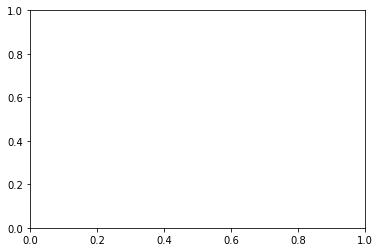

In [7]:
state = cost_std.get_wavefunction(res_std.x)
probs = state.probabilities()
labels = [r'$\left|{0:04b}\right>$'.format(i) for i in range(16)]
plt.bar(range(16),probs)
plt.xticks(range(16), labels, rotation=70);